In [1]:
fig_save_path = '/data/peer/wallet/Jupyter/2023_Particle_SASP/figures/'

In [2]:
DATA_DIR = '/data/peer/wallet/Jupyter/2023_Particle_SASP/data/'

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from scanpy.external.pp import magic





In [4]:
from scrnaseq_preprocessing_utils import *

In [5]:
color_map_clusters_nogrey = ["#FFFF00", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF",
 "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]
blue_red = ['#DE2A1B','#1B2ADE',"#1CE6FF", ]
#scanpy layout
sc.set_figure_params(scanpy=True, dpi=150, dpi_save=150, frameon=False, vector_friendly=True, fontsize=7, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=True, ipython_format='png2x')
sns.set_style('white')
sc.settings.verbosity = 3

In [6]:
color_map_clusters_nogrey[12]

'#809693'

In [7]:

batlow_20 = ['#1d2356','#1d2b59',
'#14375e',
'#134460',
'#1c5261',
'#235f5f',
'#396a58',
'#4c714e',
'#607843',
'#757e36',
'#8d8532',
'#a78b30',
'#c49138',
'#dc954d',
'#f09c6a',
'#f8a487',
'#f8aca2',
'#f8b5be',
'#f8c2d9',
'#eecbe1'] 
import random
random.seed(1)
random.shuffle(batlow_20)



# explore data

In [8]:
#adata_path = DATA_DIR + 'TIL-X-PAAD-X-snRNAseq-X-2022-X-Hwang-X-10.1038_s41588-022-01134-8-X-all_cells_Milo.h5ad'
adata_path = DATA_DIR + 'TIL-X-PAAD-X-snRNAseq-X-2022-X-Hwang-X-10.1038_s41588-022-01134-8-X-all_cells_Milo_annotated.h5ad'
adata_save_path = DATA_DIR + 'TIL-X-PAAD-X-snRNAseq-X-2022-X-Hwang-X-10.1038_s41588-022-01134-8-X-all_cells_Milo_annotated_RTX.h5ad'

metadata_path = DATA_DIR + 'TIL-X-PAAD-X-snRNAseq-X-2022-X-Hwang-X-10.1038_s41588-022-01134-8-X-sample_metadata.csv'


In [9]:
adata_pretreated = sc.read(adata_save_path)

In [10]:
adata_pretreated

AnnData object with n_obs × n_vars = 97987 × 22164
    obs: 'sampleid', 'n_genes', 'n_counts', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 'IMMUNE', 'PanCAF', 'iCAF', 'myCAF', 'apCAF

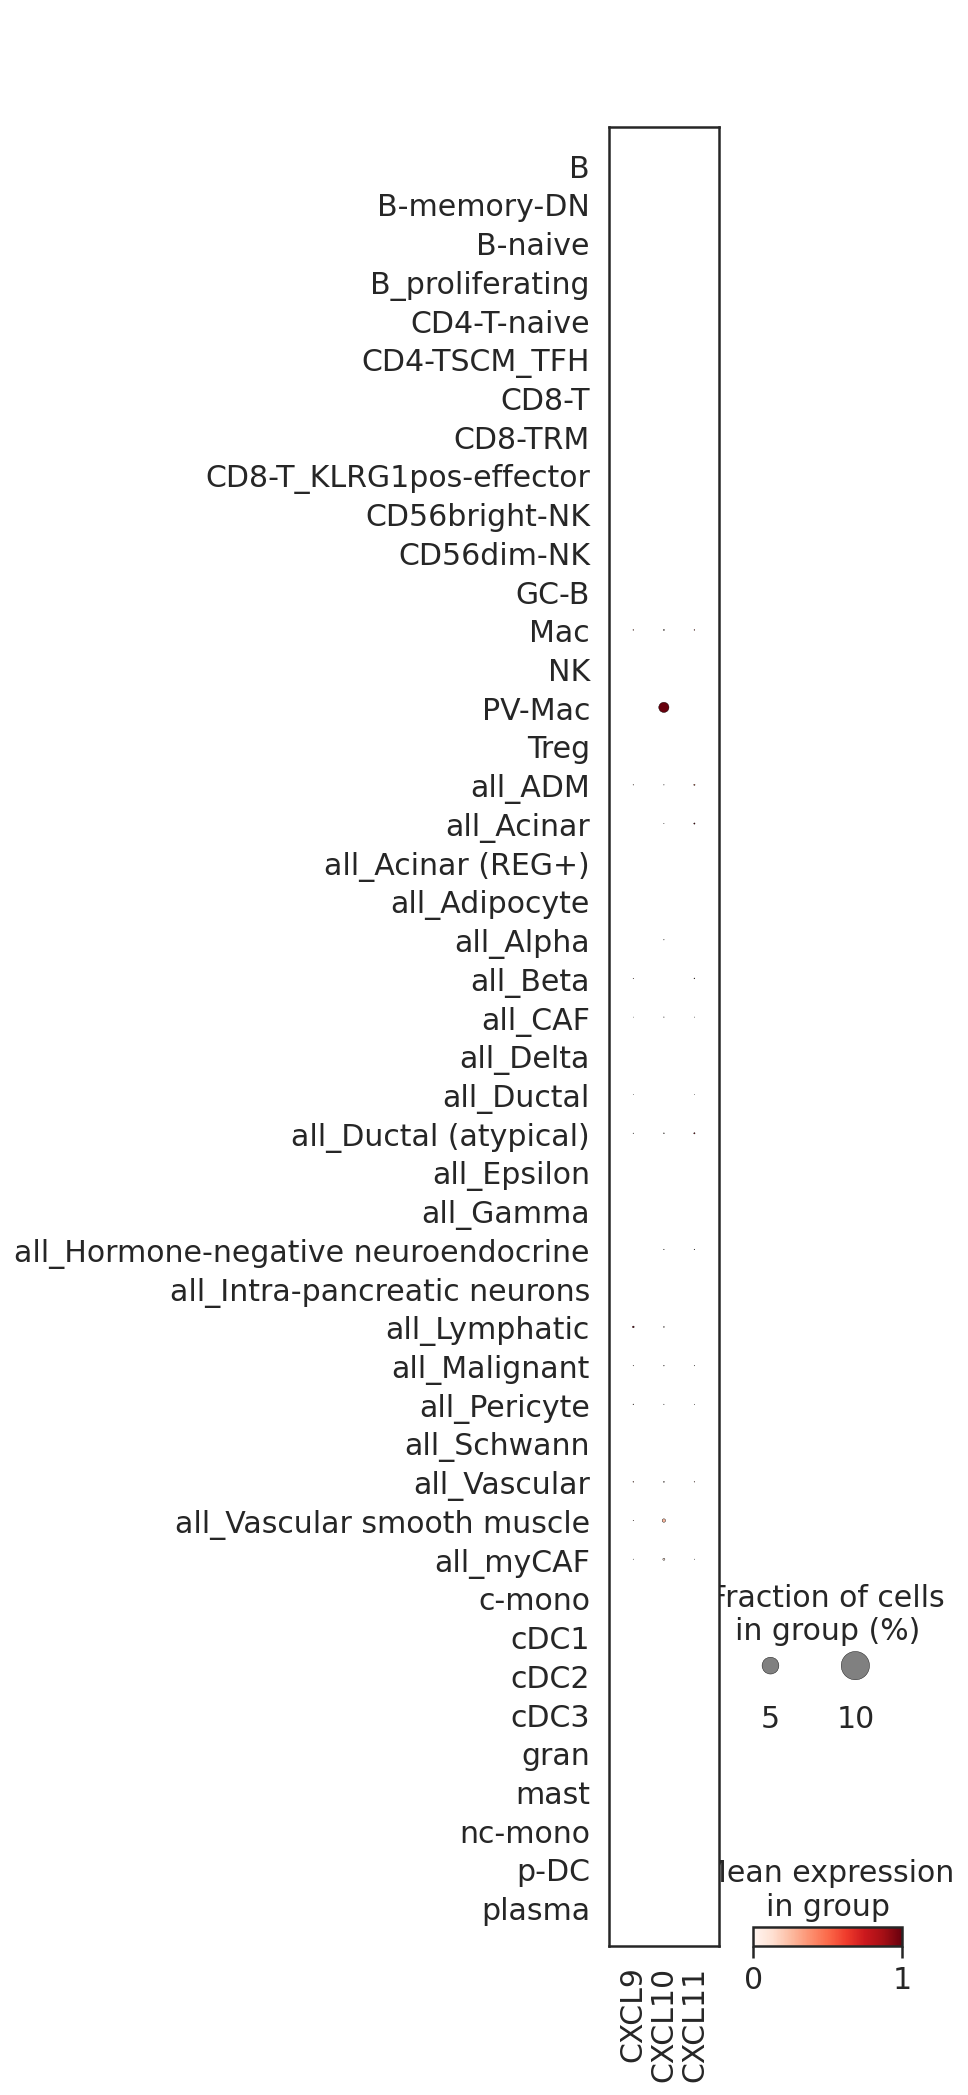

In [13]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')
genes_plot_clean = ['CXCL9','CXCL10','CXCL11']
genes_plot_clean = [x for x in genes_plot_clean if x in adata_pretreated.var_names]
sc.pl.dotplot(adata_pretreated, genes_plot_clean, groupby='annotation',  standard_scale='var')

In [15]:
metadata_df = pd.read_csv(metadata_path,index_col='patient_ID')
metadata_df

tissue_type    tissue  pretreated  \
patient_ID                                     
U1             primary  pancreas       False   
U2             primary  pancreas       False   
U3             primary  pancreas       False   
U4             primary  pancreas       False   
U5             primary  pancreas       False   
U6             primary  pancreas       False   
U7             primary  pancreas       False   
U8             primary  pancreas       False   
U9             primary  pancreas       False   
U10            primary  pancreas       False   
U11            primary  pancreas       False   
U12            primary  pancreas       False   
U13            primary  pancreas       False   
U14            primary  pancreas       False   
U15            primary  pancreas       False   
U16            primary  pancreas       False   
U17            primary  pancreas       False   
U18            primary  pancreas       False   
T1             primary  pancreas        True   
T2             primary  pancreas        True   
T3             primary  pancreas        True   
T4             primary  pancreas        True   
T5             primary  pancreas        True   
T6             primary  pancreas        True   
T7             primary  pancreas        True   
T8             primary  pancreas        True   
T9             primary  pancreas        True   
T10            primary  pancreas        True   
T11            primary  pancreas        True   
T12            primary  pancreas        True   
T13            primary  pancreas        True   
T14            primary  pancreas        True   
T15            primary  pancreas        True   
T16            primary  pancreas        True   
T17            primary  pancreas        True   
T18            primary  pancreas        True   
T19            primary  pancreas        True   
T20            primary  pancreas        True   
T21            primary  pancreas        True   
T22            primary  pancreas        True   
T23            primary  pancreas        True   
T24            primary  pancreas        True   
T25            primary  pancreas        True   

                                                 pretreatment  \
patient_ID                                                      
U1                                                        NaN   
U2                                                        NaN   
U3                                                        NaN   
U4                                                        NaN   
U5                                                        NaN   
U6                                                        NaN   
U7                                                        NaN   
U8                                                        NaN   
U9                                                        NaN   
U10                                                       NaN   
U11                                                       NaN   
U12                                                       NaN   
U13                                                       NaN   
U14                                                       NaN   
U15                                                       NaN   
U16                                                       NaN   
U17                                                       NaN   
U18                                                       NaN   
T1          FOLFIRINOX + radiotherapy with concurrent cape...   
T2          FOLFIRINOX + radiotherapy with concurrent cape...   
T3          FOLFIRINOX + radiotherapy with concurrent cape...   
T4          FOLFIRINOX + radiotherapy with concurrent cape...   
T5          FOLFIRINOX + radiotherapy with concurrent cape...   
T6          FOLFIRINOX + radiotherapy with concurrent cape...   
T7          FOLFIRINOX + radiotherapy with concurrent cape...   
T8          FOLFIRINOX + radiotherapy with concurrent cape...   
T9          FOLFIRINOX + radio

In [16]:
adata = sc.read(adata_path)
adata

AnnData object with n_obs × n_vars = 207661 × 22164
    obs: 'sampleid', 'n_genes', 'n_counts', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 'IMMUNE', 'PanCAF', 'iCAF', 'myCAF', 'apCA

In [18]:
set(adata.obs['annotation'])

{'B',
 'B-T_doublet',
 'B-memory-DN',
 'B-naive',
 'B_proliferating',
 'CD4-T-naive',
 'CD4-TSCM_TFH',
 'CD56bright-NK',
 'CD56dim-NK',
 'CD8-T',
 'CD8-TRM',
 'CD8-T_KLRG1pos-effector',
 'GC-B',
 'Mac',
 'NK',
 'PV-Mac',
 'T',
 'T_proliferating',
 'Treg',
 'all_ADM',
 'all_Acinar',
 'all_Acinar (REG+)',
 'all_Adipocyte',
 'all_Alpha',
 'all_Beta',
 'all_CAF',
 'all_Delta',
 'all_Ductal',
 'all_Ductal (atypical)',
 'all_Epsilon',
 'all_Gamma',
 'all_Hormone-negative neuroendocrine',
 'all_Intra-pancreatic neurons',
 'all_Lymphatic',
 'all_Malignant',
 'all_Pericyte',
 'all_Schwann',
 'all_Vascular',
 'all_Vascular smooth muscle',
 'all_myCAF',
 'c-mono',
 'cDC1',
 'cDC2',
 'cDC3',
 'gran',
 'mast',
 'nc-mono',
 'p-DC',
 'plasma'}

In [19]:
adata = adata[~adata.obs['annotation'].isin(['B-T_doublet'])]
adata

View of AnnData object with n_obs × n_vars = 207195 × 22164
    obs: 'sampleid', 'n_genes', 'n_counts', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 'IMMUNE', 'PanCAF', 'iCAF', 'myCAF

In [20]:
import cytopus as cp
G = cp.kb.KnowledgeBase()
G.identities.keys()

KnowledgeBase object containing 75 cell types and 201 cellular processes



dict_keys(['TCM', 'TSCM', 'CD8-T_KLRG1pos-effector', 'TEM', 'FDC', 'Langerhans', 'B-memory-DN', 'Treg', 'B-memory-non-switched', 'CD56bright-NK', 'mono', 'B-pb-t1', 'NK-adaptive', 'mast', 'TRM', 'CD4-T', 'cDC2', 'p-DC', 'GC-B', 'B-memory-IgM-MZ', 'CD8-T', 'NK', 'T', 'ILC2', 'mo-DC', 'capillary', 'endo-systemic-venous', 'cDC3', 'B', 'gran', 'CD56dim-NK', 'cDC1', 'B-pb-t2', 'Lti', 'plasma', 'B-pb-mature', 'gdT', 'plasma-blast', 'CD8-T-progenitor-exhausted', 'Mac', 'B-memory-switched', 'ILC1', 'ILC3-NCRpos', 'CD8-T_KLRG1neg-effector', 'lung-endo-venous', 'ILC3-NCRneg', 'B-memory', 'endo-aerocyte', 'T-naive', 'B-naive'])

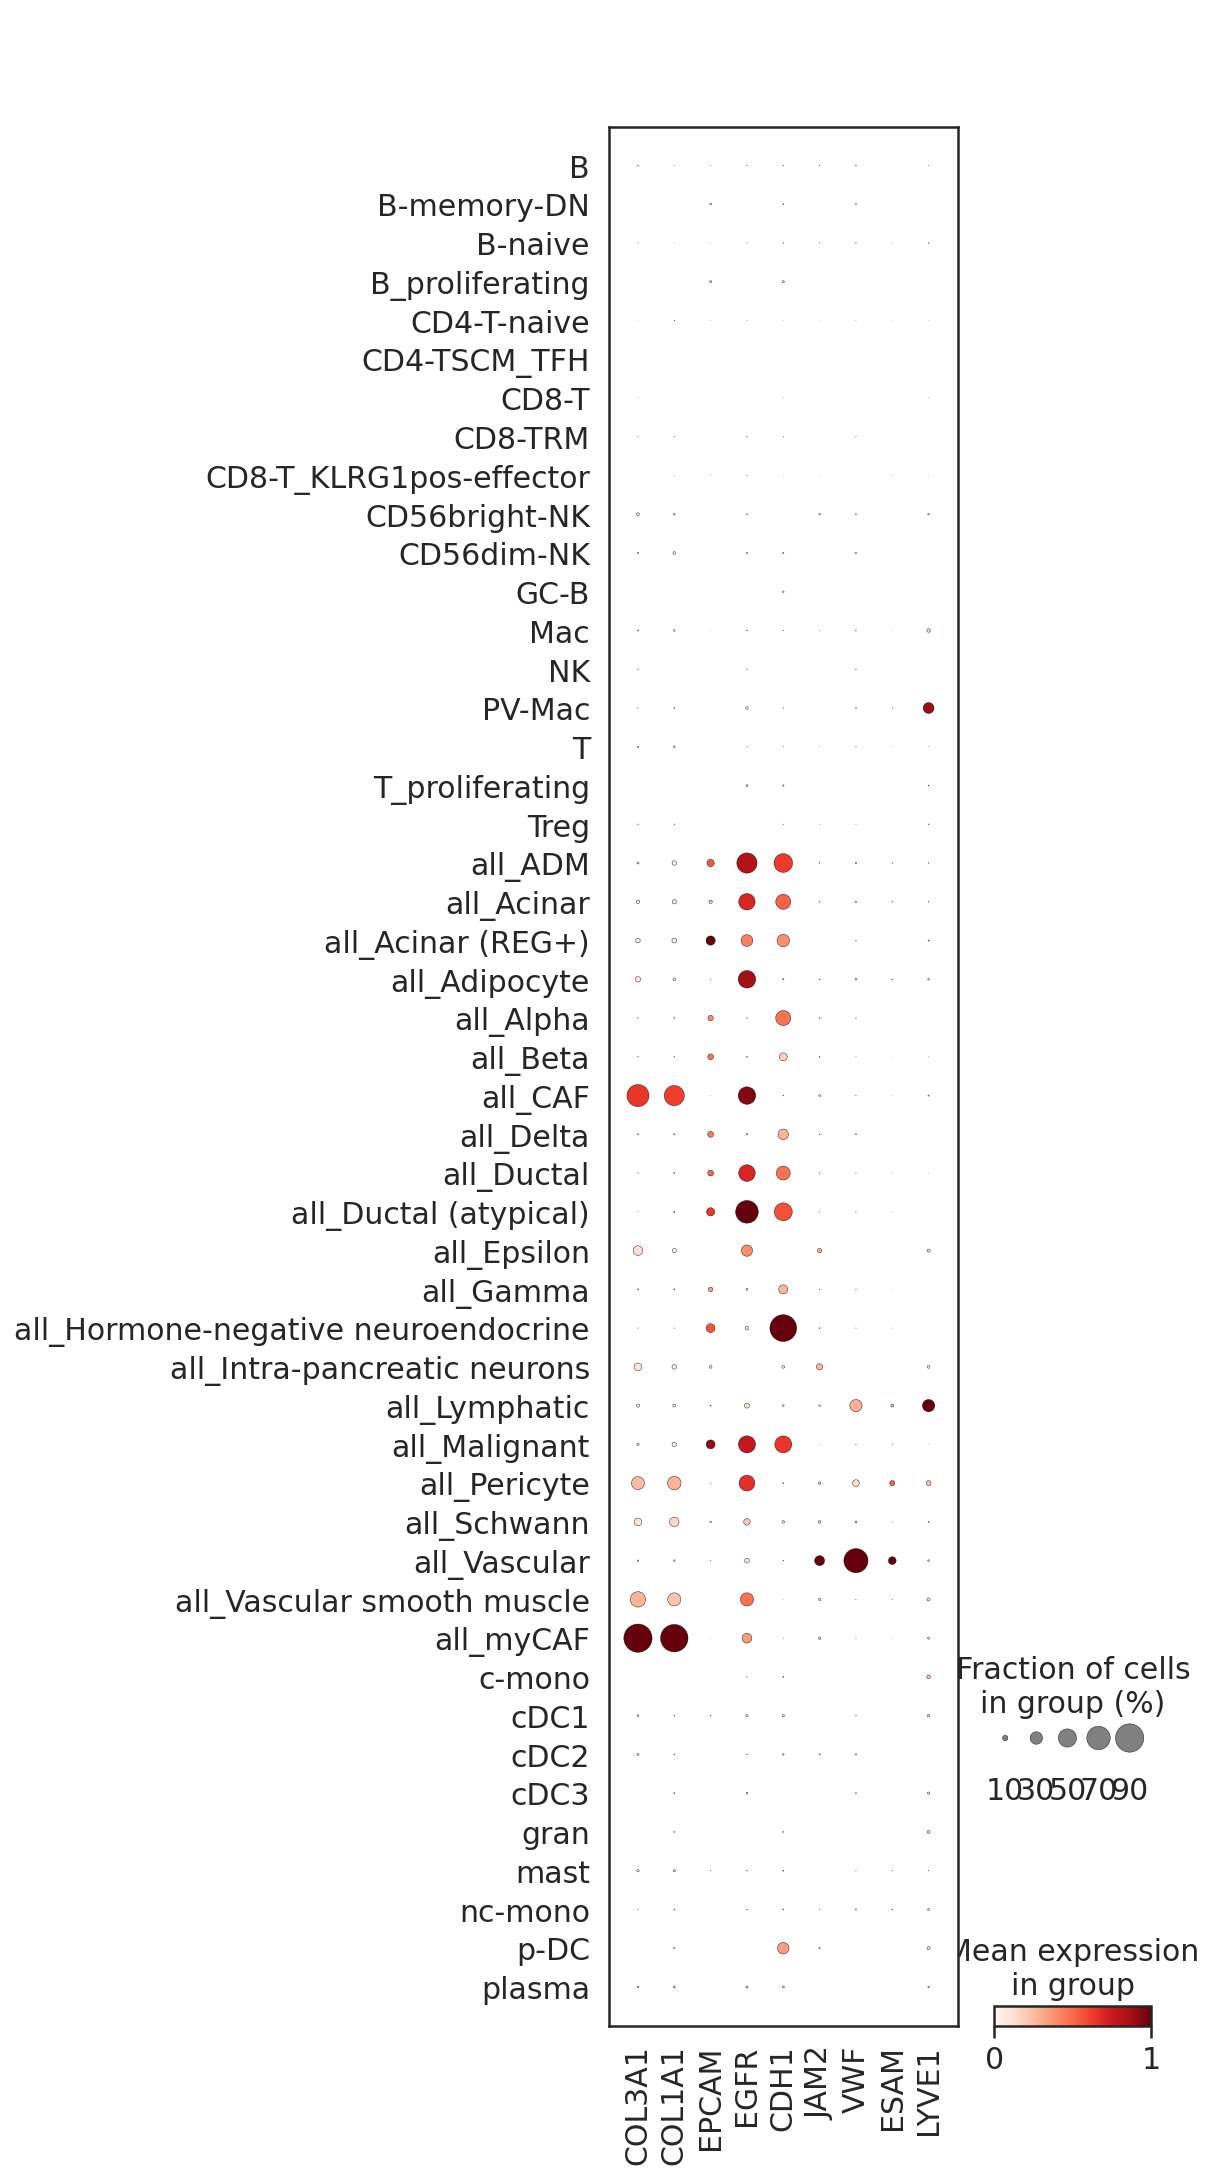

In [17]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')
genes_plot_clean = ['COL3A1','COL1A1','EPCAM','EGFR','CDH1','JAM2','VWF','ESAM','LYVE1']
genes_plot_clean = [x for x in genes_plot_clean if x in adata.var_names]
sc.pl.dotplot(adata, genes_plot_clean, groupby='annotation',  standard_scale='var')

In [21]:
#less granular annotations

mapping_dict = {'B':'B',
 'B-memory-DN':'B',
 'B-naive':'B',
 'B_proliferating':'B',
 'CD4-T-naive':'CD4-T',
 'CD4-TSCM_TFH':'CD4-T',
 'CD56bright-NK':'CD56bright-NK',
 'CD56dim-NK':'CD56dim-NK',
 'CD8-T':'CD8-T',
 'CD8-TRM':'CD8-T',
 'CD8-T_KLRG1pos-effector':'CD8-T',
 'GC-B':'B',
 'Mac':'Mac',
 'NK':'NK',
 'PV-Mac':'Mac',
 'T':'T',
 'T_proliferating':'T',
 'Treg':'Treg',
 'all_ADM':'epithelial',
 'all_Acinar':'epithelial',
 'all_Acinar (REG+)':'epithelial',
 'all_Adipocyte':'adipocyte',
 'all_Alpha':'endocrine',
 'all_Beta':'endocrine',
 'all_CAF':'(myo)fibroblast',
 'all_Delta':'endocrine',
 'all_Ductal':'epithelial',
 'all_Ductal (atypical)': 'epithelial',
 'all_Epsilon':'endocrine',
 'all_Gamma':'endocrine',
 'all_Hormone-negative neuroendocrine':'neuroendocrine',
 'all_Intra-pancreatic neurons':'neuron',
 'all_Lymphatic':'endo',
 'all_Malignant':'crc-carcinoma-cell',
 'all_Pericyte':'fibroblast',
 'all_Schwann':'schwann',
 'all_Vascular':'endo',
 'all_Vascular smooth muscle':'(myo)fibroblast',
 'all_myCAF':'(myo)fibroblast',
 'c-mono':'mono',
 'cDC1':'DC',
 'cDC2':'DC',
 'cDC3':'DC',
 'gran':'gran',
 'mast':'mast',
 'nc-mono':'mono',
 'p-DC':'DC',
 'plasma':'plasma'}

In [22]:
adata.obs['annotation_merged']= adata.obs['annotation'].map(mapping_dict)
adata.obs['annotation_merged'].value_counts()

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/667598449.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['annotation_merged']= adata.obs['annotation'].map(mapping_dict)


annotation_merged
crc-carcinoma-cell    63861
(myo)fibroblast       55622
epithelial            29388
endo                  16201
fibroblast            11474
Mac                    9648
endocrine              7139
CD8-T                  3405
CD4-T                  1831
schwann                1714
neuroendocrine         1599
T                      1246
B                      1241
Treg                    533
adipocyte               530
DC                      464
mono                    459
mast                    263
NK                      164
plasma                  112
CD56bright-NK           104
gran                     98
CD56dim-NK               74
neuron                   25
Name: count, dtype: int64

In [23]:
#remove uncompletely characterized cell types
adata = adata[~adata.obs['annotation_merged'].isin(['T'])]
adata

View of AnnData object with n_obs × n_vars = 205949 × 22164
    obs: 'sampleid', 'n_genes', 'n_counts', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 'IMMUNE', 'PanCAF', 'iCAF', 'myCAF

In [25]:
adata_pretreated = adata[adata.obs['pretreated']=='True']
adata_pretreated

View of AnnData object with n_obs × n_vars = 97987 × 22164
    obs: 'sampleid', 'n_genes', 'n_counts', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 'IMMUNE', 'PanCAF', 'iCAF', 'myCAF'

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:50)


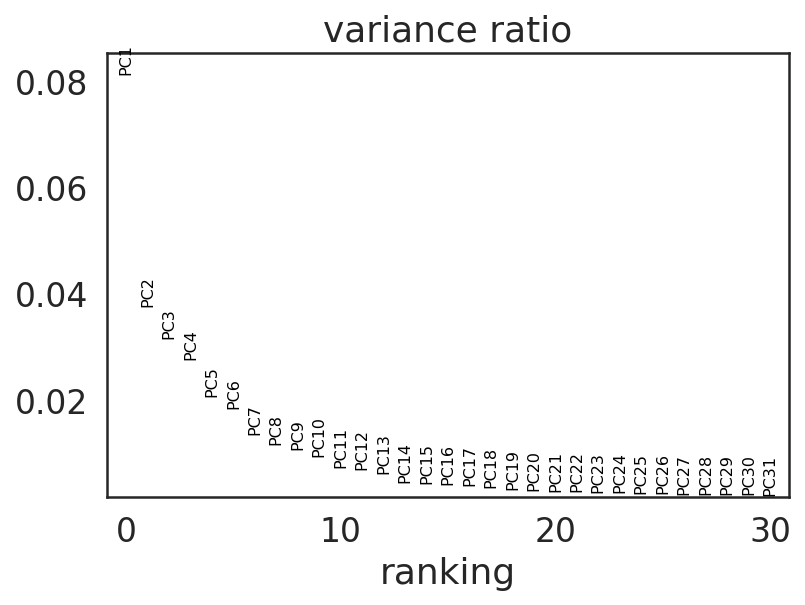

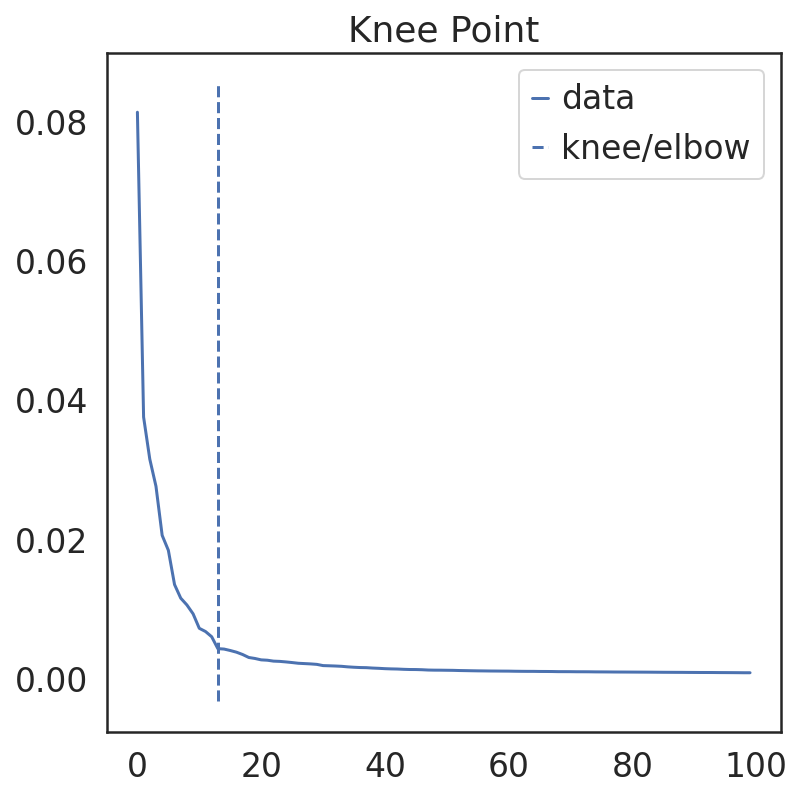

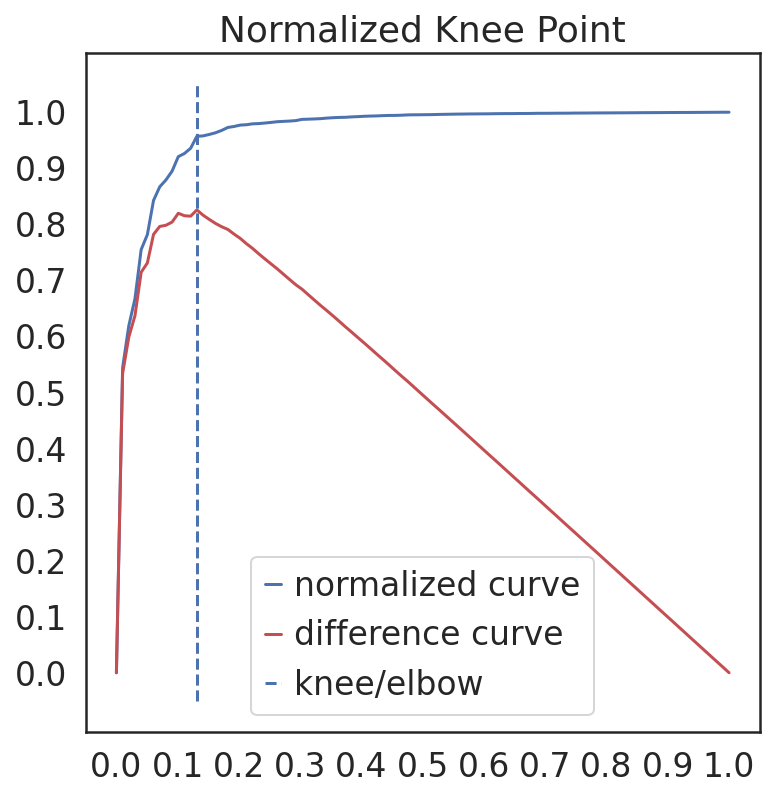

Kneepoint happens at PC: 13
13 PC explain 28.25829420100867 % of variance
setting PCs to 50
variance of 50 is 36.38768616827298 %
number of PCs for clusterings/embeddings is: 50
these explain 36.38768616827298 of variance
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:17)


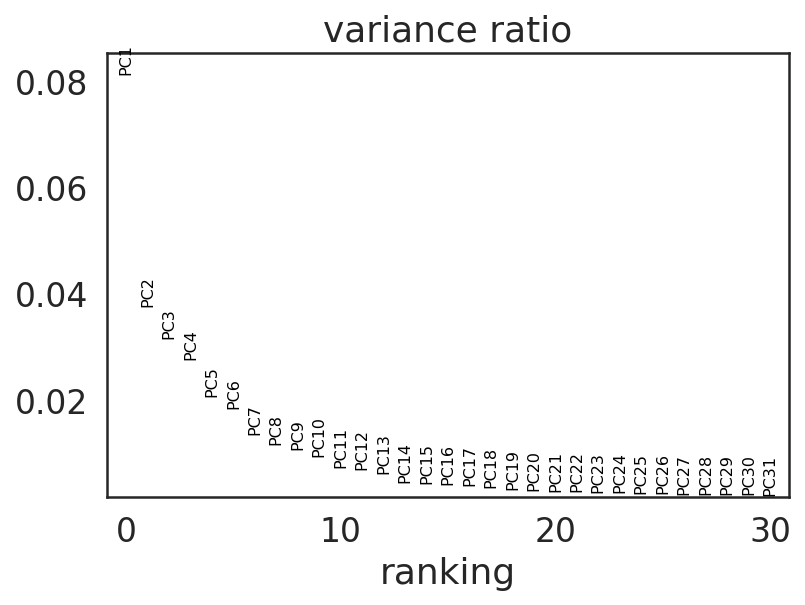

In [26]:
number_of_PC_used = calculate_optimal_PC(adata_pretreated, min_PC = 50, min_var=25, n_comps=100, use_hv=None)


In [27]:
sc.pp.neighbors(adata_pretreated, n_neighbors=15, n_pcs=number_of_PC_used)
sc.tl.umap(adata_pretreated)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:34)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:38)


/home/wallet/miniconda3/envs/2022_Peer_SPADE_cellrank2/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


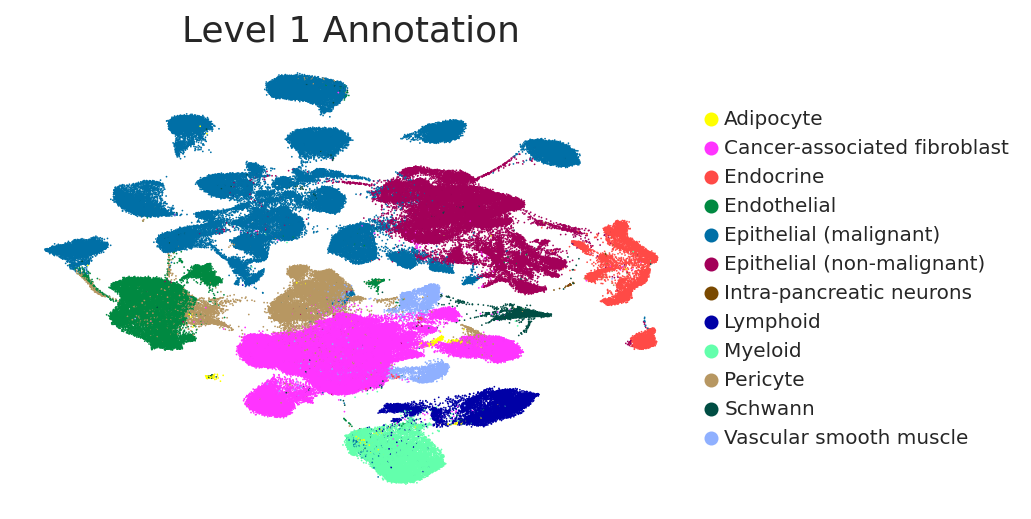

In [28]:
adata = randomize_cells(adata)
sc.pl.umap(adata, color = ['Level 1 Annotation'], s = 3, palette=color_map_clusters_nogrey, legend_fontsize = 10,
           layer='imputed',vmin=0,vmax=1)


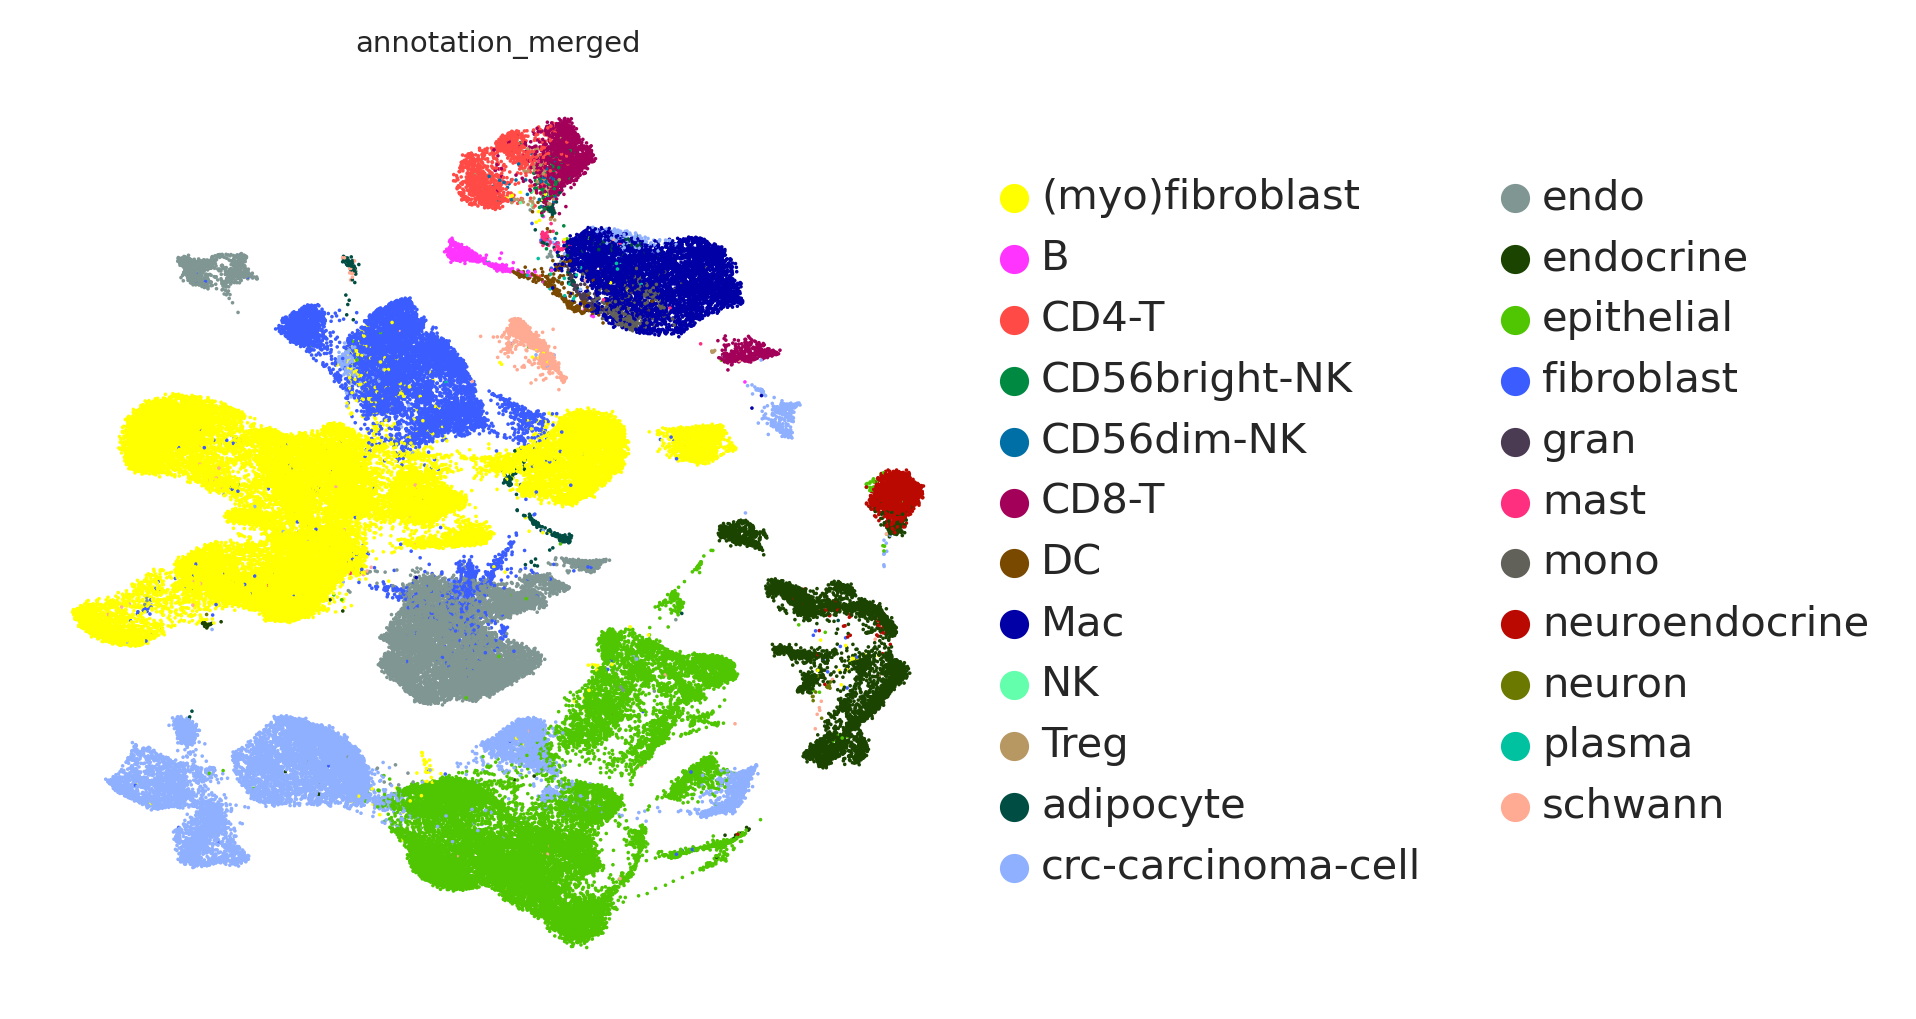

In [24]:
adata = randomize_cells(adata_pretreated)
sc.pl.umap(adata_pretreated, color = ['annotation_merged'], s = 3, palette=color_map_clusters_nogrey, legend_fontsize = 10,
           layer='imputed',vmin=0,vmax=1, save='2022_Hwang_irradiated_annotation_merged_umap.svg')


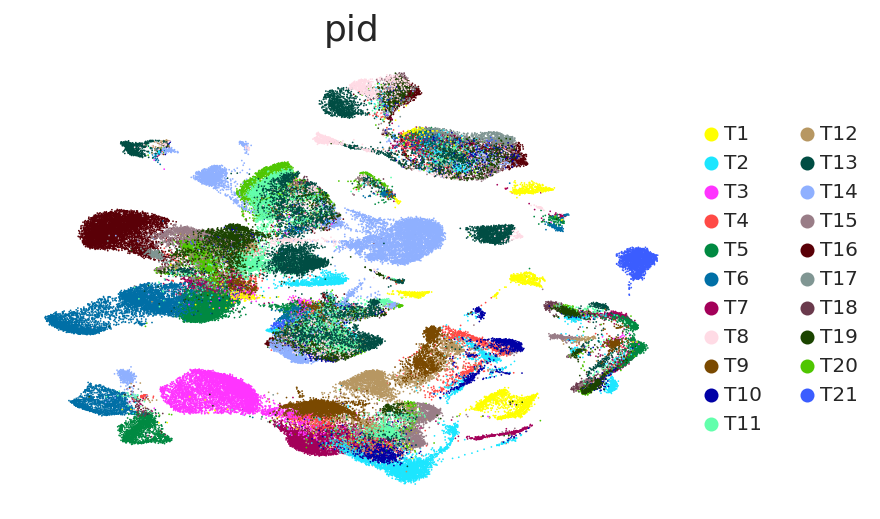

In [30]:
sc.pl.umap(adata_pretreated, color = ['pid'], s = 3, cmap='viridis', legend_fontsize = 10,layer='imputed',vmin=0,vmax=1)


In [25]:
all_chemokines = ['CCL1',
'CCL11',
'CCL13',
'CCL14',
'CCL15',
'CCL16',
'CCL17',
'CCL18',
'CCL19',
'CCL2',
'CCL20',
'CCL21',
'CCL22',
'CCL23',
'CCL24',
'CCL25',
'CCL26',
'CCL27',
'CCL28',
'CCL3',
'CCL4',
'CCL5',
'CCL7',
'CCL8',
'CX3CL1',
'CXCL1',
'CXCL10',
'CXCL11',
'CXCL12',
'CXCL13',
'CXCL16',
'CXCL2',
'CXCL3',
'CXCL5',
'CXCL6',
'CXCL8',
'CXCL9']

In [26]:
celltypes = ['endo',
 'neuroendocrine',
 'schwann',
 'precursor',
             'neuron',
 'endocrine',
 'fibroblast',
 'adipocyte',
 '(myo)fibroblast',
 'epithelial',
 'crc-carcinoma-cell']

In [27]:
import scipy
adata_pretreated.layers['zscored'] = scipy.stats.zscore(np.array(adata_pretreated.X.todense()),axis=0)

In [28]:
pheno_heat = 'annotation_merged'
genes_plot_clean = [x for x in all_chemokines if x in adata_pretreated.var_names]

plt_df = plt_gene_heatmap_df(adata_pretreated,pheno_heat,genes_plot_clean,cluster_minus_one_present=False, 
                             zscore=True, layer_heat = 'zscored')

Cluster:  crc-carcinoma-cell
Cluster:  CD8-T
Cluster:  B
Cluster:  endo
Cluster:  adipocyte
Cluster:  CD56bright-NK
Cluster:  Treg
Cluster:  (myo)fibroblast
Cluster:  mono
Cluster:  CD4-T
Cluster:  NK
Cluster:  mast
Cluster:  fibroblast
Cluster:  DC
Cluster:  epithelial
Cluster:  Mac
Cluster:  endocrine
Cluster:  plasma
Cluster:  CD56dim-NK
Cluster:  neuroendocrine
Cluster:  schwann
Cluster:  gran
Cluster:  neuron


In [29]:
adata

View of AnnData object with n_obs × n_vars = 97987 × 22164
    obs: 'sampleid', 'n_genes', 'n_counts', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 'IMMUNE', 'PanCAF', 'iCAF', 'myCAF'

In [30]:
plt_df = plt_df.T[~plt_df.isna().all()].T
plt_df = plt_df[plt_df.index.isin(celltypes)]
plt_df

CXCL10     CCL11     CXCL5    CXCL13     CXCL3  \
crc-carcinoma-cell  0.007050 -0.012969  0.228220 -0.013961  0.561637   
endo                0.004730 -0.012969 -0.028704 -0.000623 -0.085794   
adipocyte          -0.026284 -0.012969  0.090474  0.001369 -0.113942   
(myo)fibroblast     0.012781  0.013774 -0.042891  0.019500 -0.114848   
fibroblast         -0.016941  0.020551 -0.040176 -0.017526 -0.116567   
epithelial         -0.021858 -0.010282 -0.001761 -0.004069  0.035571   
endocrine          -0.021730 -0.012969 -0.039639 -0.027007 -0.117510   
neuroendocrine     -0.015458 -0.012969 -0.044081 -0.010542 -0.120066   
schwann            -0.026284  0.022035 -0.044081 -0.033921 -0.092957   
neuron             -0.026284 -0.012969 -0.044081  0.483332 -0.120066   

                        CCL5     CCL19      CCL7     CCL27     CCL24  ...  \
crc-carcinoma-cell -0.035033 -0.049334 -0.003196 -0.014796  0.010173  ...   
endo               -0.032179 -0.044953  0.029640 -0.021402 -0.000145  ...   
adipocyte          -0.060516 -0.059774 -0.003196 -0.021402 -0.020834  ...   
(myo)fibroblast    -0.047656  0.083286 -0.003196  0.012393 -0.016054  ...   
fibroblast         -0.041989  0.038190 -0.003196  0.010785 -0.012907  ...   
epithelial         -0.052811 -0.058760 -0.003196  0.005826  0.015532  ...   
endocrine          -0.059333 -0.059774 -0.003196 -0.002708 -0.013785  ...   
neuroendocrine     -0.060516 -0.056257 -0.003196 -0.021402 -0.020834  ...   
schwann            -0.027482 -0.026413 -0.003196 -0.021402 -0.020834  ...   
neuron             -0.060516 -0.059774 -0.003196 -0.021402 -0.020834  ...   

                      CXCL11     CCL17     CXCL2     CXCL1     CCL16  \
crc-carcinoma-cell -0.004090 -0.021204  0.216985  0.176185 -0.042051   
endo                0.010634 -0.016283  0.225886 -0.061296  0.347041   
adipocyte          -0.018292  0.022084 -0.134890 -0.085332 -0.043468   
(myo)fibroblast    -0.007300 -0.029155 -0.156248 -0.077962 -0.040975   
fibroblast         -0.004395 -0.026950 -0.141291 -0.074037 -0.015853   
epithelial          0.011262 -0.025634  0.216126  0.172194 -0.036602   
endocrine          -0.008036 -0.032657 -0.174373 -0.085332 -0.043468   
neuroendocrine     -0.006067 -0.015561 -0.166751 -0.085332 -0.043468   
schwann            -0.018292  0.003712 -0.145839 -0.075383 -0.043468   
neuron             -0.018292 -0.041107 -0.175890 -0.085332 -0.043468   

                       CXCL6     CXCL9     CCL14     CCL22    CXCL16  
crc-carcinoma-cell  0.016911  0.009331 -0.013911  0.008039  0.150808  
endo               -0.026858  0.025459  0.118105 -0.007135 -0.062570  
adipocyte          -0.033260 -0.017991 -0.013911 -0.023900  0.081722  
(myo)fibroblast    -0.026812 -0.007702 -0.013911 -0.016367 -0.065375  
fibroblast         -0.029567  0.008177 -0.001500 -0.014073 -0.064987  
epithelial          0.085125 -0.008430 -0.013911 -0.019366 -0.040942  
endocrine          -0.033260  0.002045 -0.013911 -0.001623 -0.069714  
neuroendocrine     -0.019910 -0.017991 -0.013911 -0.002104 -0.069714  
schwann            -0.003823 -0.017991 -0.013911 -0.023900 -0.063897  
neuron             -0.033260 -0.017991 -0.013911 -0.023900 -0.069714  

[10 rows x 36 columns]

saved to: 2022_Hwang_celltypes_chemokines_heatmap.svg


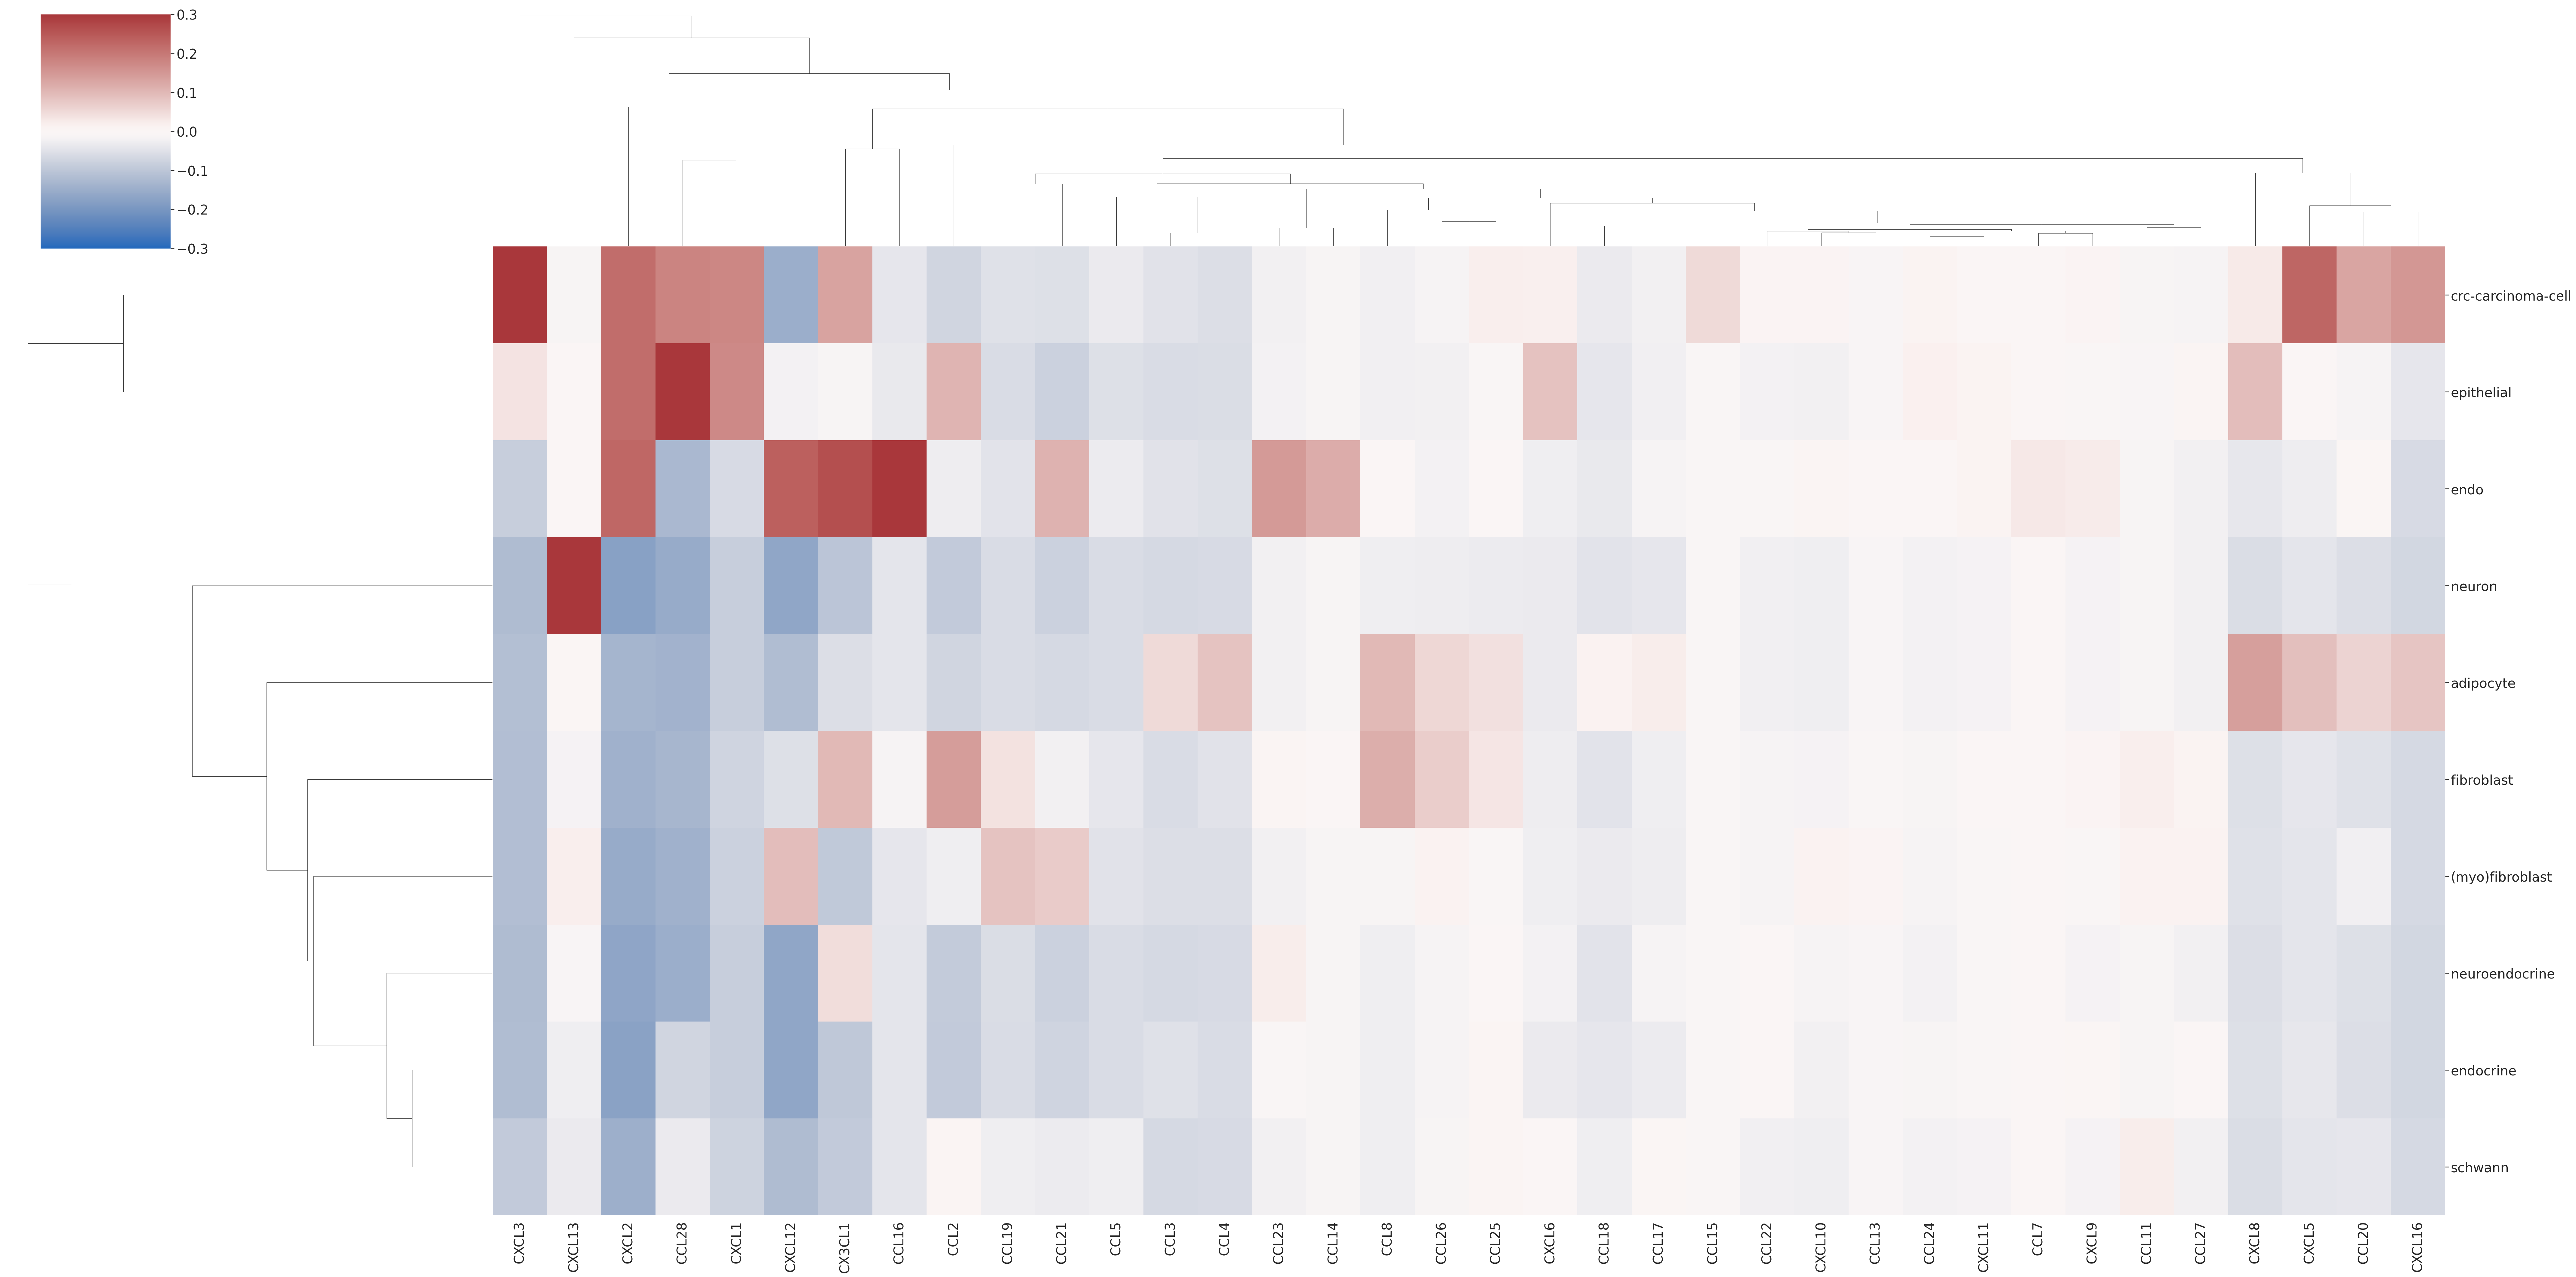

In [31]:
#non imputed
import scipy
%matplotlib inline
save_name = '2022_Hwang_celltypes_chemokines_heatmap.svg'
sns.set(font_scale=2)
clustergrid = sns.clustermap(plt_df, cmap='vlag', col_cluster=True,row_cluster=True, figsize=(60,30), 
                             #row_linkage=plot_df_corr[1],col_linkage=plot_df_corr[2],
                             vmin=-.3,vmax=.3,center=0, z_score=None) 
plt.savefig(fig_save_path+save_name)
print('saved to:',save_name)

In [32]:
fig_save_path+save_name

'/data/peer/wallet/Jupyter/2023_Particle_SASP/figures/2022_Hwang_celltypes_chemokines_heatmap.svg'

In [33]:
plt_df_means = pd.DataFrame(np.mean(plt_df,axis=1))
plt_df_means['celltype'] = plt_df_means.index
plt_df_means

0            celltype
crc-carcinoma-cell  0.034284  crc-carcinoma-cell
endo                0.021025                endo
adipocyte          -0.012299           adipocyte
(myo)fibroblast    -0.024213     (myo)fibroblast
fibroblast         -0.015352          fibroblast
epithelial          0.011498          epithelial
endocrine          -0.045401           endocrine
neuroendocrine     -0.043201      neuroendocrine
schwann            -0.035454             schwann
neuron             -0.039328              neuron

In [34]:
col_dendro_indices = clustergrid.dendrogram_row.reordered_ind

# Get the original column labels in clustered order
col_labels = plt_df_means.index[col_dendro_indices]
col_labels = list(col_labels)
#col_labels.reverse()


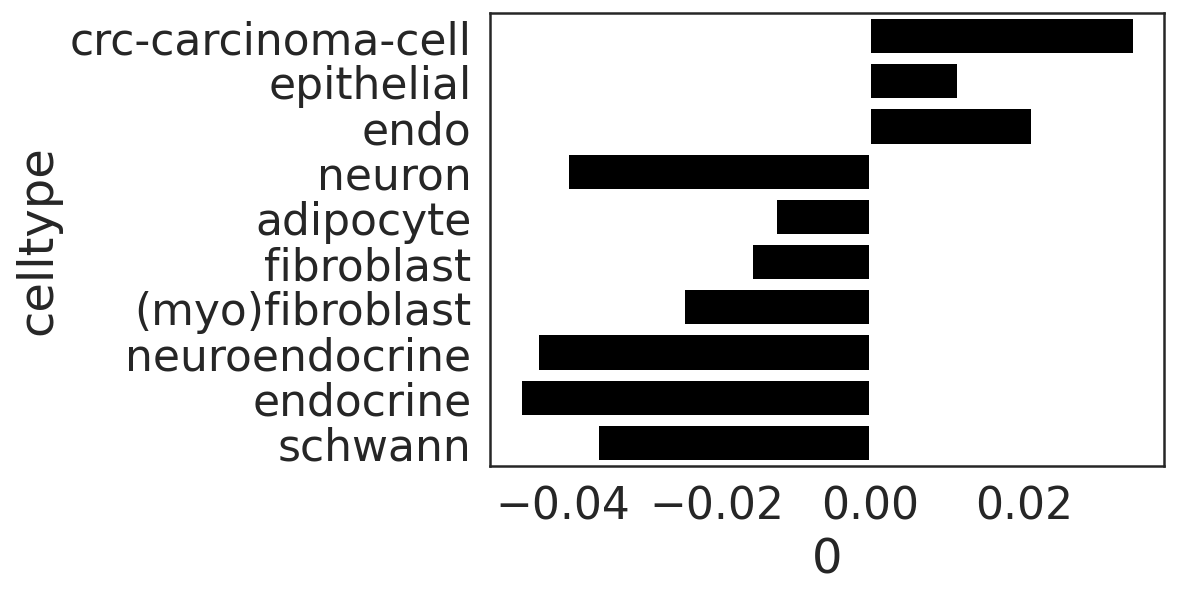

In [35]:
sns.set_style('white')
save_name= 'Carbon_meanzscore_barplot.svg'
sns.barplot(data=plt_df_means, x=0, y='celltype',color='000000',order = col_labels)
plt.savefig(fig_save_path+save_name)

In [36]:
adata.obs[pheno_heat] = pd.Categorical(adata.obs[pheno_heat])

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/2415612423.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[pheno_heat] = pd.Categorical(adata.obs[pheno_heat])


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_annotation_merged']`


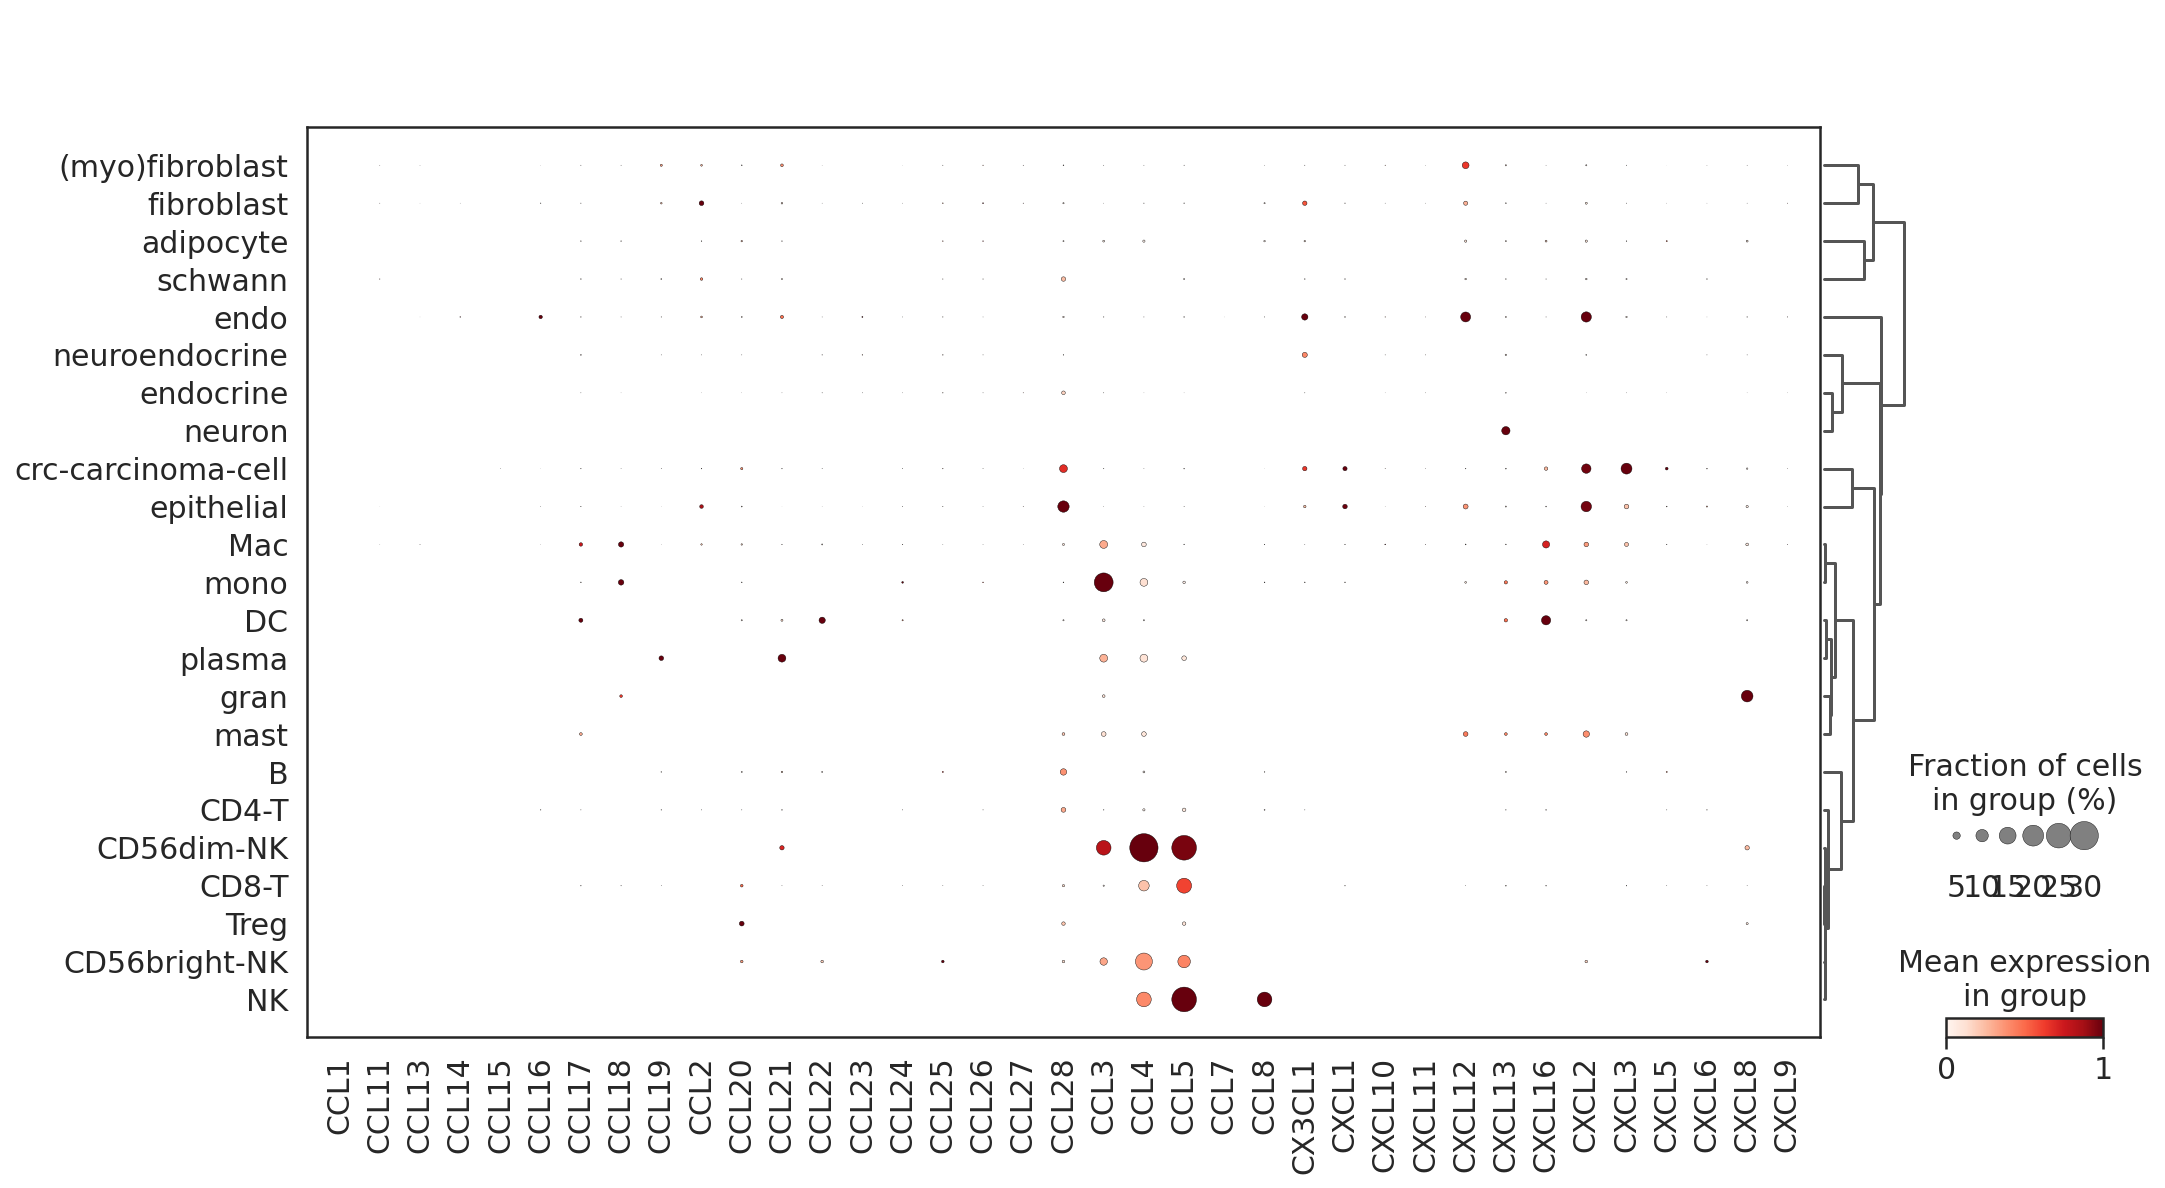

In [37]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')




sc.tl.dendrogram(adata, groupby=pheno_heat)
sc.pl.dotplot(adata, genes_plot_clean, groupby=pheno_heat, dendrogram=True, standard_scale='var')

In [159]:
adata_subset = adata_pretreated[adata_pretreated.obs['Level 1 Annotation']=='Epithelial (malignant)']
plot_df_corr = pd.DataFrame(adata_subset[:,all_chemokines].layers['imputed'],index=adata_subset.obs_names,
                                              columns=all_chemokines)
#plot_df_corr =scipy.stats.zscore(plot_df_corr)
plot_df_corr =  corr_cov_matrix_cluster(plot_df_corr,markers=['all_markers'], metric='spearman',
                                        clustering_method = 'average', linkage_distance=1.65)
plot_df_corr

output list order: dataframe, hierarchical flat clusters, row linkage, column linkage


[           CCL11     CCL13     CCL14     CCL15     CCL16     CCL17     CCL18  \
 CCL11   1.000000 -0.003440 -0.001377 -0.007972 -0.004491  0.139905  0.139236   
 CCL13  -0.003440  1.000000 -0.001593 -0.011166 -0.003753  0.198828  0.313411   
 CCL14  -0.001377 -0.001593  1.000000 -0.003377  0.117256 -0.005805 -0.003270   
 CCL15  -0.007972 -0.011166 -0.003377  1.000000 -0.016913  0.147179  0.009099   
 CCL16  -0.004491 -0.003753  0.117256 -0.016913  1.000000 -0.020797 -0.007365   
 CCL17   0.139905  0.198828 -0.005805  0.147179 -0.020797  1.000000  0.168811   
 CCL18   0.139236  0.313411 -0.003270  0.009099 -0.007365  0.168811  1.000000   
 CCL19   0.407456 -0.000345  0.000595 -0.005806 -0.002494  0.055685  0.162789   
 CCL2    0.341155  0.009933  0.127720  0.031747  0.040230  0.079147  0.179486   
 CCL20   0.027390 -0.031299 -0.009079 -0.091730 -0.006311  0.127651 -0.036165   
 CCL21   0.110252  0.000158  0.002667 -0.012496  0.003169  0.013730  0.078932   
 CCL22   0.055684  0.004962 

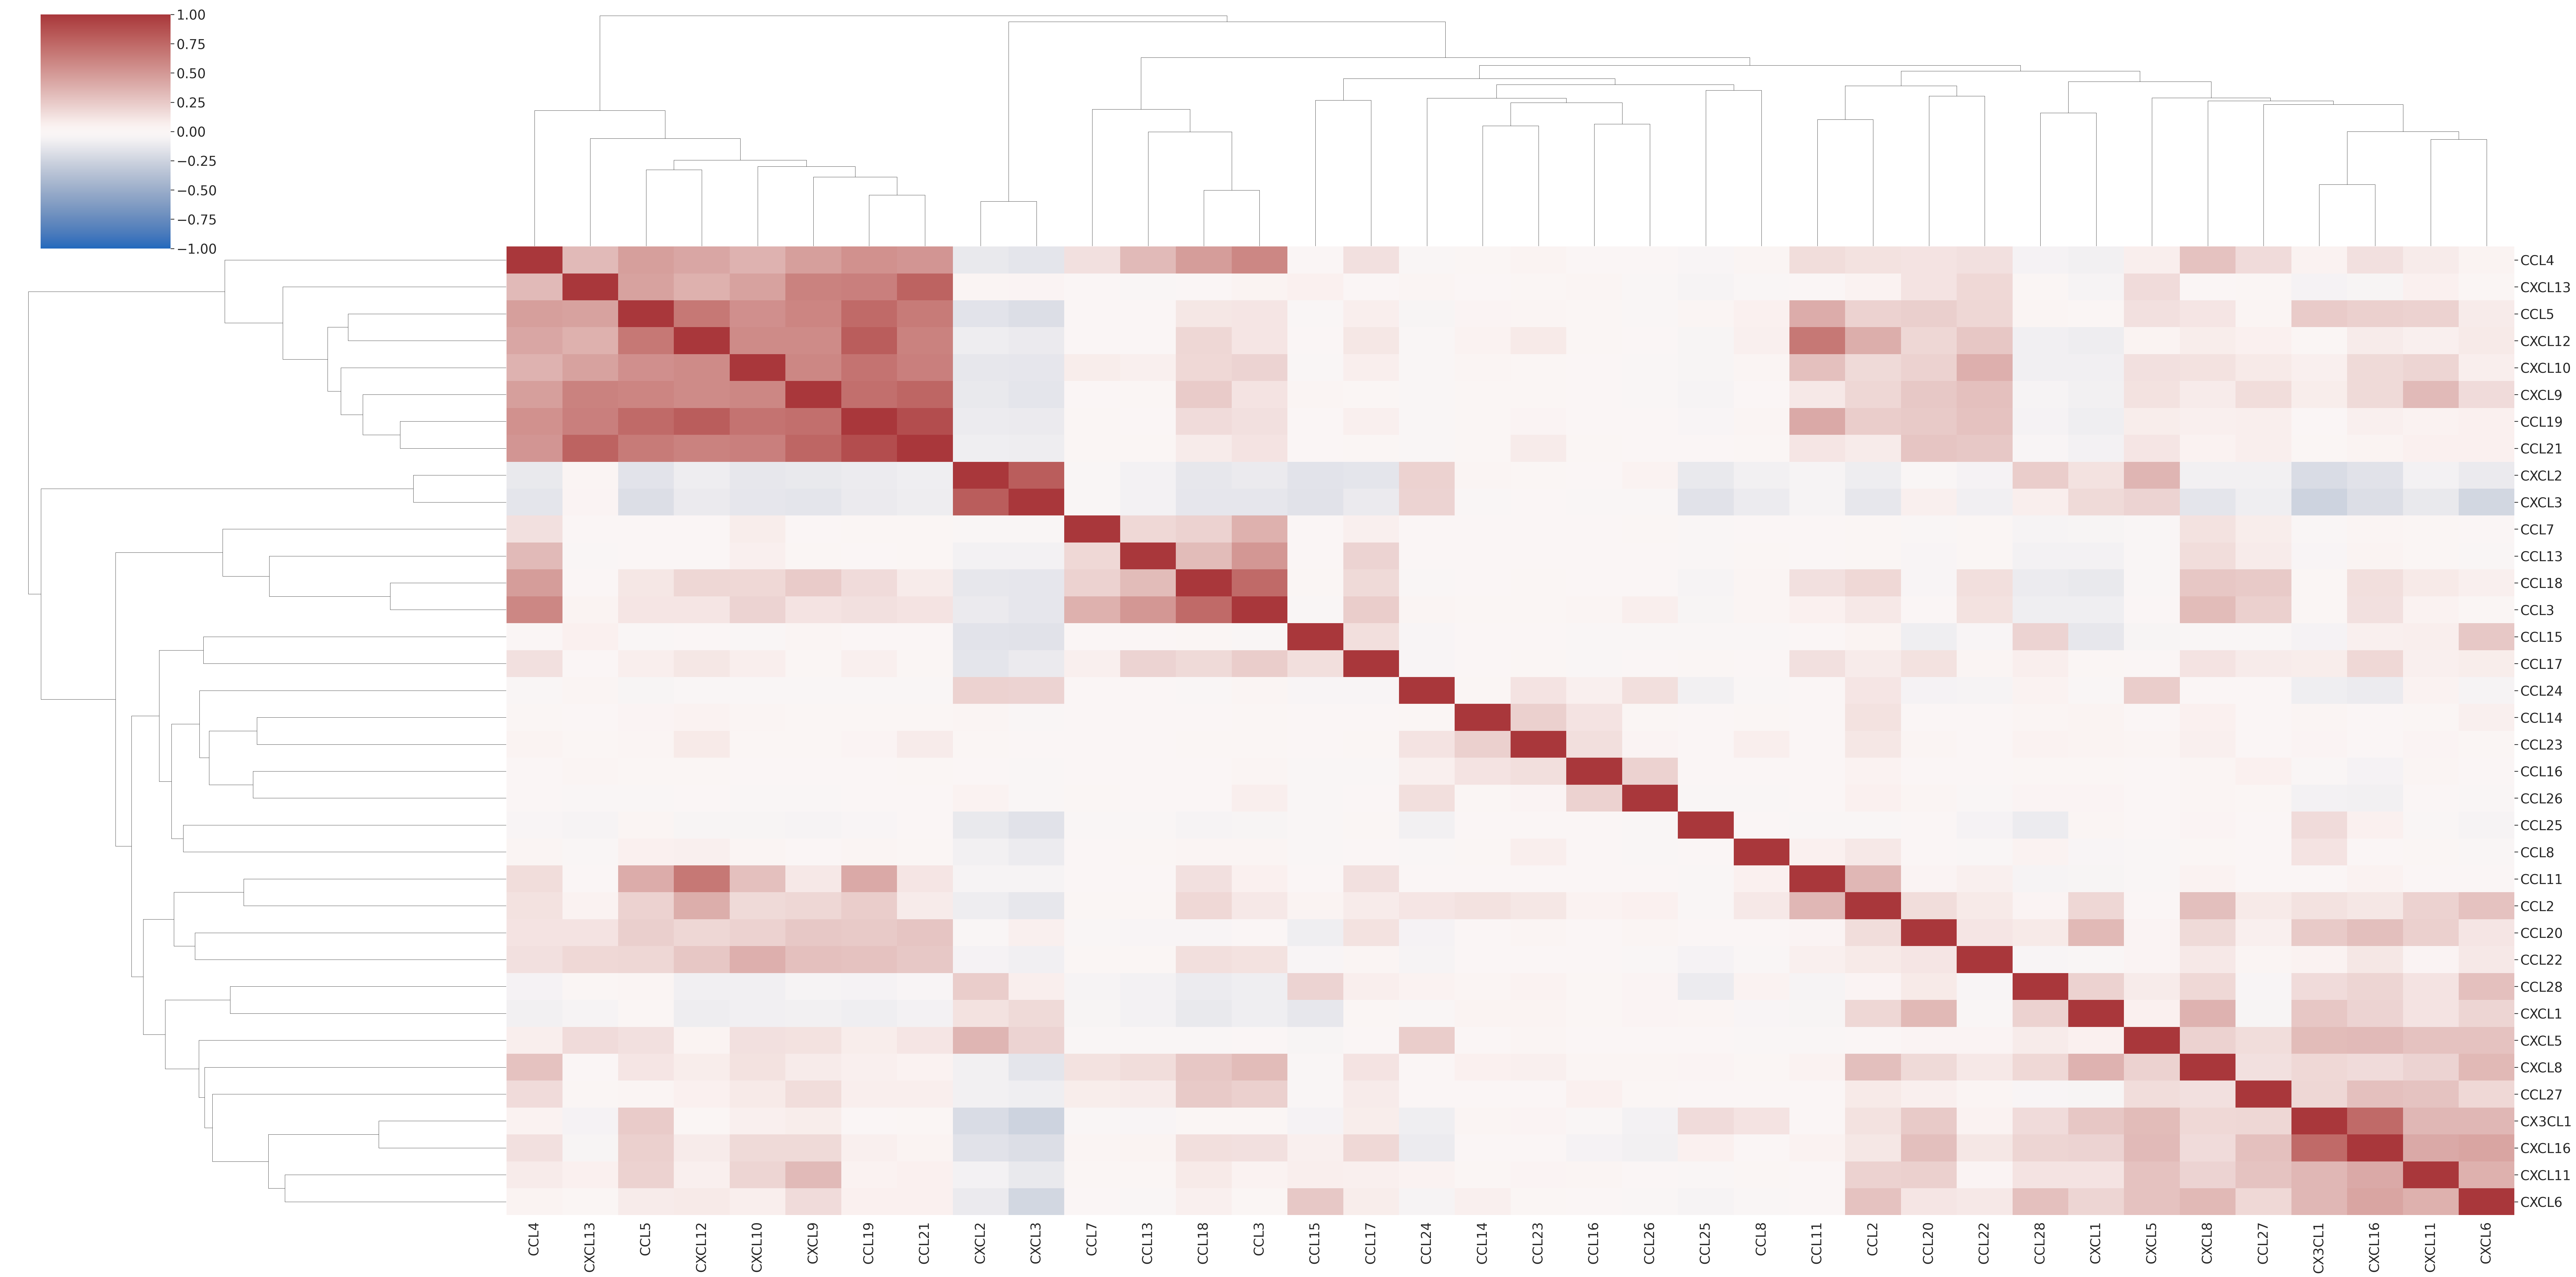

In [39]:
#correlation imputed cell level
import scipy
%matplotlib inline
sns.set(font_scale=2)
clustergrid = sns.clustermap(plot_df_corr[0], cmap='vlag', col_cluster=True,row_cluster=True, figsize=(60,30), 
                             #row_linkage=plot_df_corr[1],col_linkage=plot_df_corr[2],
                             vmin=-1,vmax=1,center=0,
               z_score=None) 

In [40]:
#correlation imputed cell level
save_name = '2022_Hwang_irradiated_cancercell_chemokine_correlation_imputed.svg'
row_colors = [color_map_clusters_nogrey[x] for x in plot_df_corr[1]]
col_colors = [color_map_clusters_nogrey[x] for x in plot_df_corr[1]]
sns.set(font_scale=2)
clustergrid = sns.clustermap(plot_df_corr[0], cmap='vlag',# col_cluster=True,row_cluster=True, 
                             figsize=(60,60), 
                             row_linkage=plot_df_corr[2],col_linkage=plot_df_corr[2],
                             row_colors = row_colors, col_colors=col_colors,
                             vmin=-.6,vmax=.6,center=0,
               z_score=None) 
plt.savefig(fig_save_path+save_name)
print('saved to:',save_name)

saved to: 2022_Hwang_irradiated_cancercell_chemokine_correlation_imputed.svg


In [160]:
cluster_labels =plot_df_corr[1]
variable_names =plot_df_corr[0].index
# Get the indices of samples in each cluster
clusters = np.unique(cluster_labels)
cluster_indices = [np.where(cluster_labels == c)[0] for c in clusters]

# Get the variable names for each cluster
cluster_variable_names_crc = [[variable_names[i] for i in ci] for ci in cluster_indices]

print(cluster_variable_names_crc)

[['CCL19', 'CCL21', 'CCL4', 'CCL5', 'CXCL10', 'CXCL12', 'CXCL13', 'CXCL9'], ['CXCL2', 'CXCL3'], ['CCL13', 'CCL18', 'CCL3', 'CCL7'], ['CCL14', 'CCL15', 'CCL16', 'CCL17', 'CCL23', 'CCL24', 'CCL25', 'CCL26', 'CCL8'], ['CCL11', 'CCL2', 'CCL20', 'CCL22', 'CCL27', 'CCL28', 'CX3CL1', 'CXCL1', 'CXCL11', 'CXCL16', 'CXCL5', 'CXCL6', 'CXCL8']]


In [44]:
#correlation per module

# get the lower diagonal of the correlation matrix
lower_diag = np.tril(plot_df_corr[0])
np.fill_diagonal(lower_diag, 0)
lower_diag[lower_diag == 0] = np.nan
lower_diagonal_df = pd.DataFrame(lower_diag, index=plot_df_corr[0].index, columns=plot_df_corr[0].columns)

for i,v in enumerate(cluster_variable_names_crc):
    melted_df = pd.melt(lower_diagonal_df.loc[v,v])
    melted_df = melted_df[~melted_df['value'].isna()]
    print('mean for module',i,'is:',np.mean(melted_df['value']))

mean for module 0 is: 0.5855130172573396
mean for module 1 is: 0.8060619803967534
mean for module 2 is: 0.3858353621151121
mean for module 3 is: 0.0243611178906537
mean for module 4 is: 0.1592929613594393


In [161]:
for i,v in enumerate(cluster_variable_names_crc):
    adata_subset.obs['score_crc_'+str(i)] =  list(np.mean(adata_subset[:,v].layers['zscored'],axis=1))
    sc.tl.score_genes(adata_subset, v, ctrl_size=50, gene_pool=None, n_bins=25, score_name='score_crc_nonzscored_'+str(i),
                                      random_state=0, copy=False, use_raw=None)

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/4151043302.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_subset.obs['score_crc_'+str(i)] =  list(np.mean(adata_subset[:,v].layers['zscored'],axis=1))


computing score 'score_crc_nonzscored_0'
    finished: added
    'score_crc_nonzscored_0', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)
computing score 'score_crc_nonzscored_1'
    finished: added
    'score_crc_nonzscored_1', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)
computing score 'score_crc_nonzscored_2'
    finished: added
    'score_crc_nonzscored_2', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)
computing score 'score_crc_nonzscored_3'
    finished: added
    'score_crc_nonzscored_3', score of gene set (adata.obs).
    249 total control genes are used. (0:00:00)
computing score 'score_crc_nonzscored_4'
    finished: added
    'score_crc_nonzscored_4', score of gene set (adata.obs).
    548 total control genes are used. (0:00:00)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_pid']`


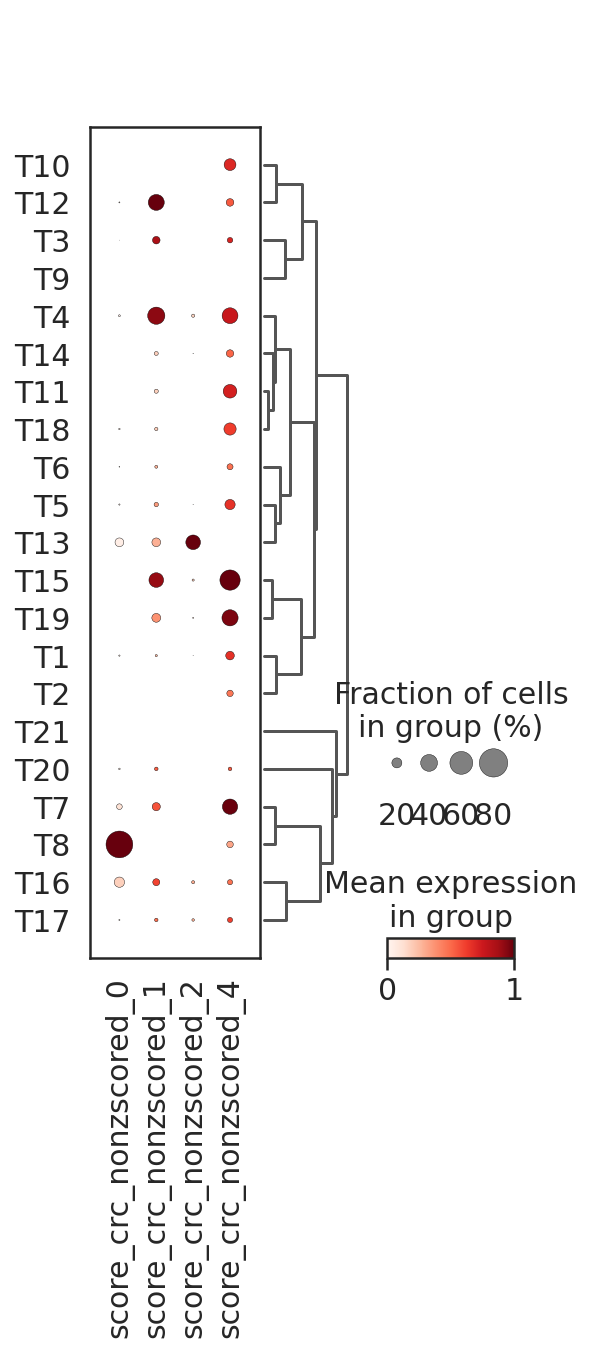

In [214]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')
plot_list = ['score_crc_nonzscored_0','score_crc_nonzscored_1','score_crc_nonzscored_2','score_crc_nonzscored_4']
sc.tl.dendrogram(adata_subset, groupby='pid')
sc.pl.dotplot(adata_subset, plot_list, groupby='pid', dendrogram=True, standard_scale='var',
             save='Hwang_PDAC_chemokine_modules_dotplot.svg')

In [212]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')
plot_list = ['score_crc_nonzscored_0','score_crc_nonzscored_1','score_crc_nonzscored_2','score_crc_nonzscored_4']
sc.tl.dendrogram(adata_subset, groupby='pid')
dp=sc.pl.dotplot(adata_subset, plot_list, groupby='pid', dendrogram=True, standard_scale='var',
             save='Hwang_PDAC_chemokine_modules_dotplot.svg',return_fig=True)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_pid']`


In [216]:
dp.dot_size_df ==0

score_crc_nonzscored_0  score_crc_nonzscored_1  score_crc_nonzscored_2  \
pid                                                                           
T1                    False                   False                   False   
T2                     True                    True                    True   
T3                    False                   False                    True   
T4                    False                   False                   False   
T5                    False                   False                   False   
T6                    False                   False                    True   
T7                    False                   False                    True   
T8                    False                    True                    True   
T9                     True                    True                    True   
T10                    True                    True                    True   
T11                    True                   False                    True   
T12                   False                   False                    True   
T13                   False                   False                   False   
T14                    True                   False                   False   
T15                    True                   False                   False   
T16                   False                   False                   False   
T17                   False                   False                   False   
T18                   False                   False                    True   
T19                    True                   False                   False   
T20                   False                   False                    True   
T21                    True                    True                    True   

     score_crc_nonzscored_4  
pid                          
T1                    False  
T2                    False  
T3                    False  
T4                    False  
T5                    False  
T6                    False  
T7                    False  
T8                    False  
T9                     True  
T10                   False  
T11                   False  
T12                   False  
T13                    True  
T14                   False  
T15                   False  
T16                   False  
T17                   False  
T18                   False  
T19                   False  
T20                   False  
T21                    True

In [217]:
np.sum((dp.dot_size_df ==0))

score_crc_nonzscored_0     8
score_crc_nonzscored_1     5
score_crc_nonzscored_2    12
score_crc_nonzscored_4     3
dtype: int64

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_pid']`


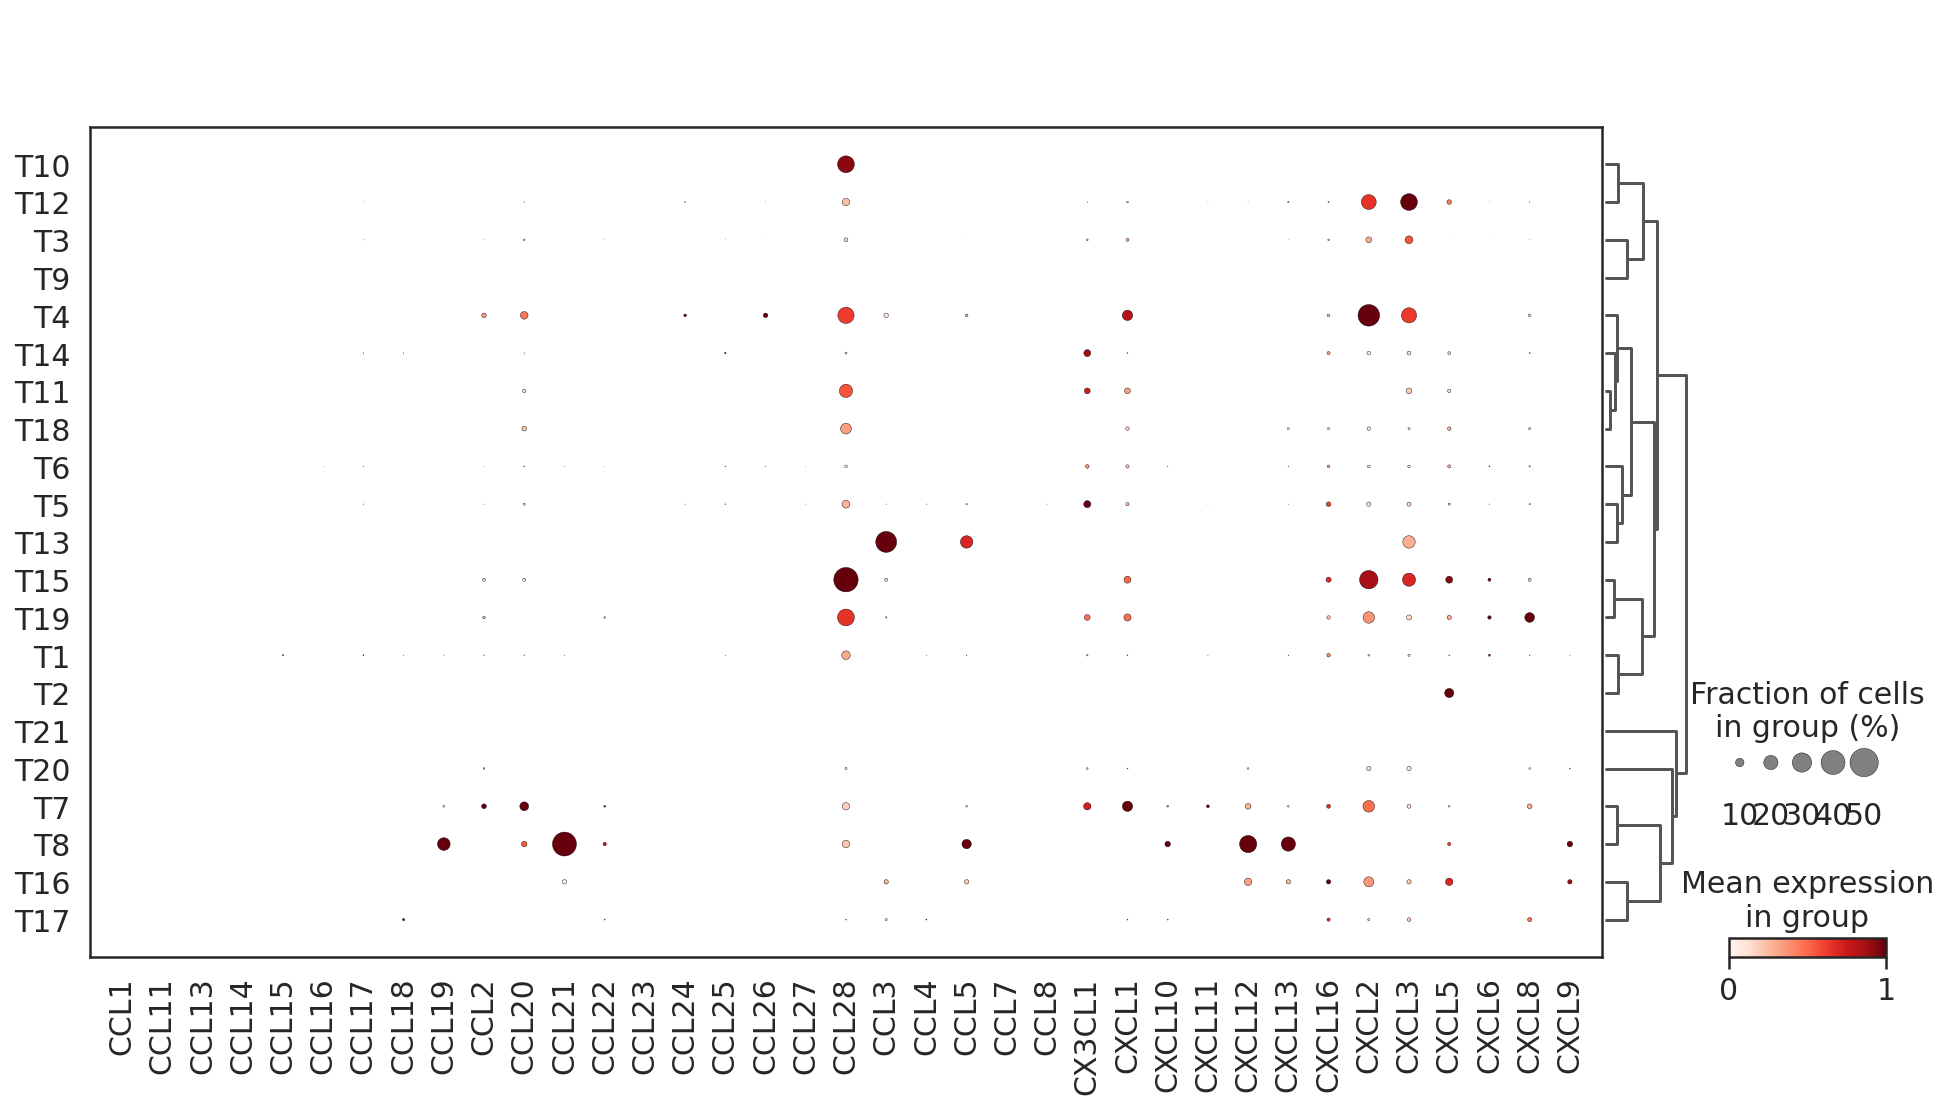

In [215]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')
sc.tl.dendrogram(adata_subset, groupby='pid')
sc.pl.dotplot(adata_subset, [x for x in all_chemokines if x in adata_subset.var_names], groupby='pid', dendrogram=True, standard_scale='var',
             save='Hwang_PDAC_chemokine_individual_dotplot.svg')

score_crc_nonzscored_0     8
score_crc_nonzscored_1     5
score_crc_nonzscored_2    12
score_crc_nonzscored_4     3
dtype: int64

In [46]:
score_list = ['score_crc_0','score_crc_1','score_crc_2','score_crc_3','score_crc_4']
crc_mean_df, crc_frac_df = aggregate_scores(adata_subset,score_list,'pid',
                            zero_cutoff =None,aggregate_function='mean')

In [47]:
score_list = ['score_crc_nonzscored_0','score_crc_nonzscored_1','score_crc_nonzscored_2','score_crc_nonzscored_3','score_crc_nonzscored_4']
crc_mean_df_non_zscored, crc_frac_df_non_zscored = aggregate_scores(adata_subset,score_list,'pid',
                            zero_cutoff =None,aggregate_function='mean')

In [48]:
np.mean(crc_mean_df_non_zscored)

-0.016101854266329978

In [49]:
crc_mean_df['pretreated'] = crc_mean_df.index.map(metadata_df['pretreated'].to_dict())
crc_mean_df['pretreated']= crc_mean_df['pretreated'].astype(str)
crc_mean_df

score_crc_0  score_crc_1  score_crc_2  score_crc_3  score_crc_4  \
T12    -0.051034     1.144470    -0.030658    -0.004614     0.066713   
T9     -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T16     0.621439     0.290996     0.139347    -0.026205     0.105583   
T1     -0.041297    -0.078481    -0.025523     0.099476     0.063243   
T19    -0.065955     0.253983     0.017900    -0.026205     0.362211   
T20    -0.010418     0.052951    -0.030658    -0.026205    -0.020892   
T15    -0.065955     1.058311     0.047752    -0.026205     0.389732   
T17    -0.017995     0.059389     0.164083    -0.026205     0.070944   
T6     -0.046100    -0.018656    -0.030658    -0.005726     0.076225   
T11    -0.065955     0.020860    -0.030658    -0.026205     0.135065   
T21    -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T13     0.050444     0.081823     0.586802    -0.026205    -0.059603   
T8      2.650700    -0.148070    -0.030658    -0.026205     0.200373   
T4     -0.020780     1.101245     0.035501     0.116900     0.229657   
T7      0.176437     0.321273    -0.030658    -0.026205     0.519029   
T3     -0.063316     0.521993    -0.030658    -0.020627     0.037663   
T14    -0.065955    -0.002199    -0.018169    -0.001174     0.049316   
T18    -0.049961    -0.059712    -0.030658    -0.026205     0.106853   
T10    -0.065955    -0.148070    -0.030658    -0.026205     0.074151   
T2     -0.065955    -0.148070    -0.030658    -0.026205     0.091602   
T5     -0.048483     0.081122    -0.023599    -0.000585     0.151970   

    pretreated  
T12       True  
T9        True  
T16       True  
T1        True  
T19       True  
T20       True  
T15       True  
T17       True  
T6        True  
T11       True  
T21       True  
T13       True  
T8        True  
T4        True  
T7        True  
T3        True  
T14       True  
T18       True  
T10       True  
T2        True  
T5        True

In [177]:
np.mean(crc_mean_df.drop(columns=['pretreated']),axis=0)

score_crc_0    0.124857
score_crc_1    0.194715
score_crc_2    0.026486
score_crc_3   -0.008725
score_crc_4    0.120506
dtype: float64

saved to: Hwang_PDAC_chemokine_modules_score_crc_0.svg


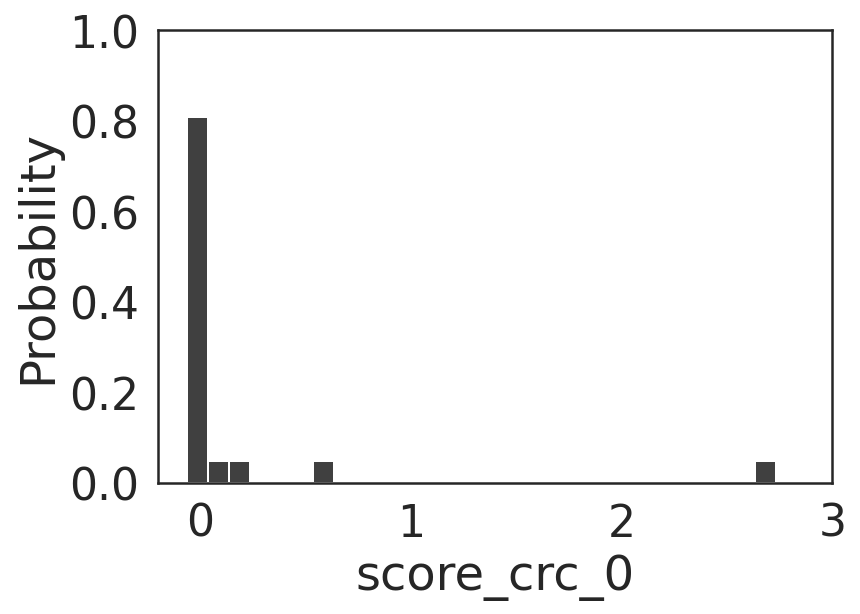

saved to: Hwang_PDAC_chemokine_modules_score_crc_1.svg


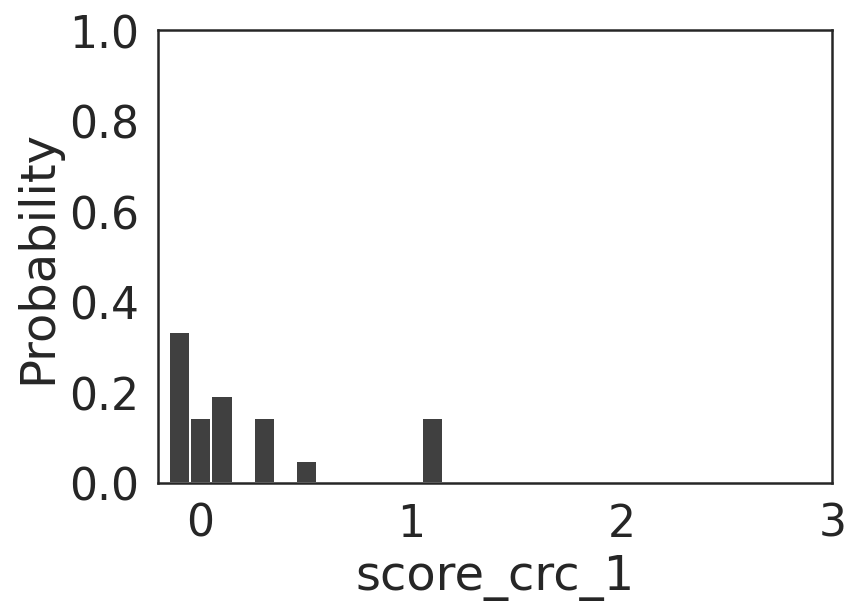

saved to: Hwang_PDAC_chemokine_modules_score_crc_2.svg


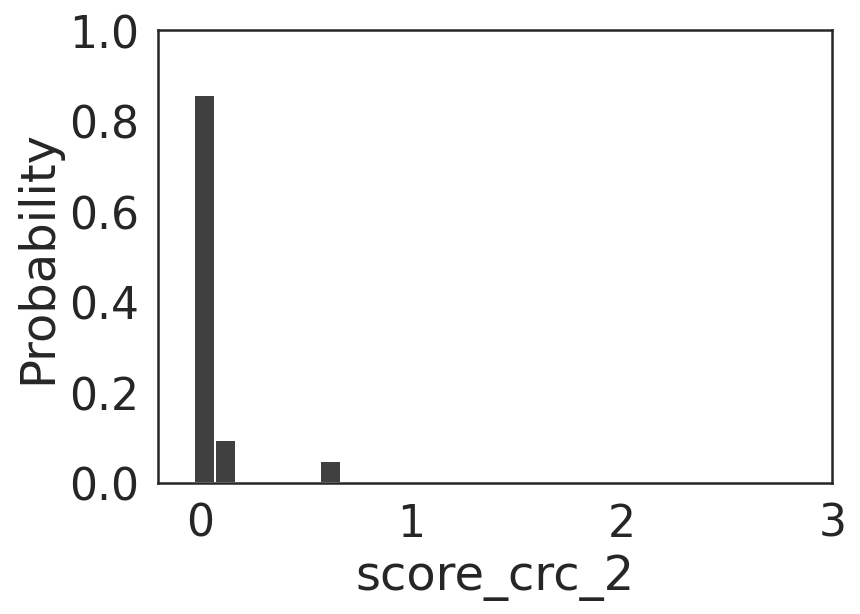

saved to: Hwang_PDAC_chemokine_modules_score_crc_3.svg


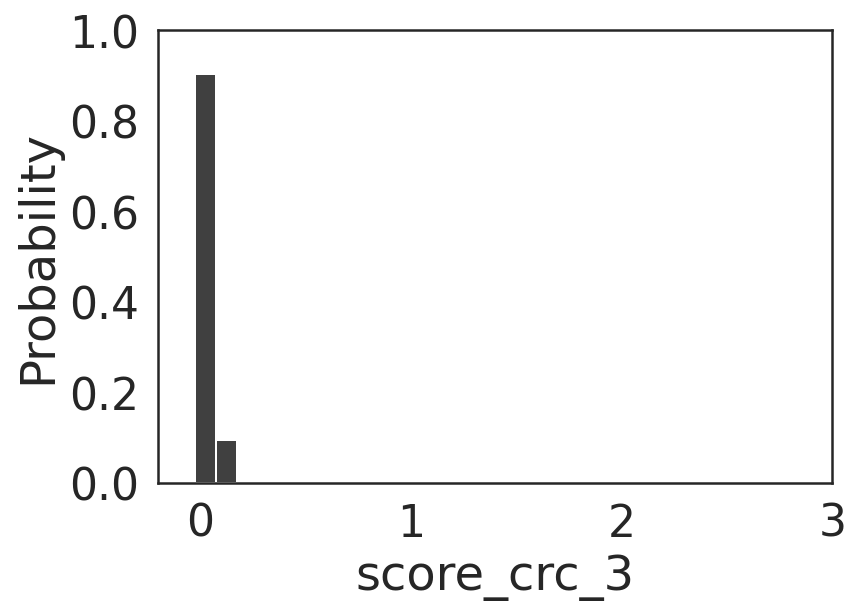

saved to: Hwang_PDAC_chemokine_modules_score_crc_4.svg


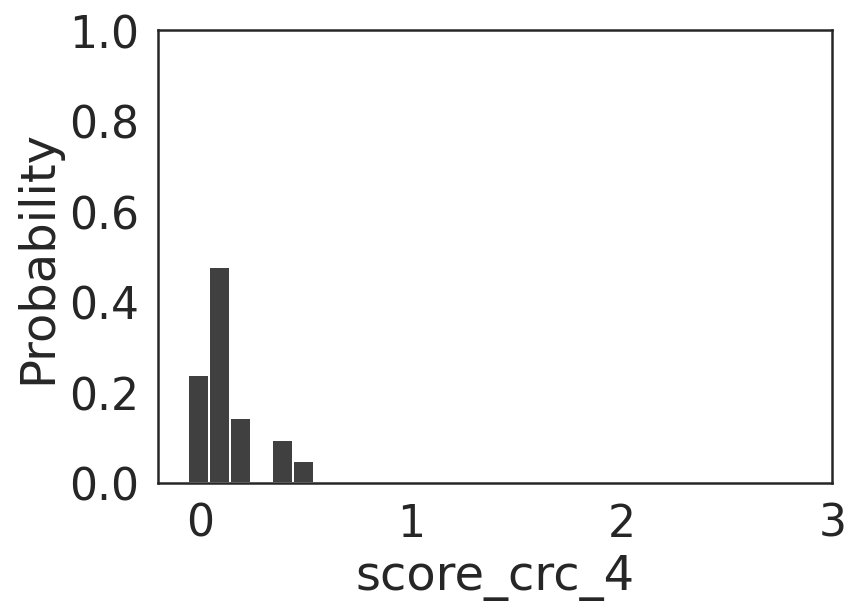

In [51]:
sns.set_style('white')

score_list = ['score_crc_0','score_crc_1','score_crc_2','score_crc_3','score_crc_4']
save_name = 'Hwang_PDAC_chemokine_modules_'

for column in score_list:
    sns.histplot(crc_mean_df[column],binwidth=0.1,
                 color='#000000',stat='probability')
    plt.gca().set(xlim=(-0.2,3))
    plt.gca().set(ylim=(0, 1))
    save_name_full = save_name+column+'.svg'
    plt.savefig(fig_save_path+save_name_full)
    print('saved to:',save_name_full)
    plt.show()
    

In [52]:
crc_mean_df.sort_values('score_crc_0',ascending=False)

score_crc_0  score_crc_1  score_crc_2  score_crc_3  score_crc_4  \
T8      2.650700    -0.148070    -0.030658    -0.026205     0.200373   
T16     0.621439     0.290996     0.139347    -0.026205     0.105583   
T7      0.176437     0.321273    -0.030658    -0.026205     0.519029   
T13     0.050444     0.081823     0.586802    -0.026205    -0.059603   
T20    -0.010418     0.052951    -0.030658    -0.026205    -0.020892   
T17    -0.017995     0.059389     0.164083    -0.026205     0.070944   
T4     -0.020780     1.101245     0.035501     0.116900     0.229657   
T1     -0.041297    -0.078481    -0.025523     0.099476     0.063243   
T6     -0.046100    -0.018656    -0.030658    -0.005726     0.076225   
T5     -0.048483     0.081122    -0.023599    -0.000585     0.151970   
T18    -0.049961    -0.059712    -0.030658    -0.026205     0.106853   
T12    -0.051034     1.144470    -0.030658    -0.004614     0.066713   
T3     -0.063316     0.521993    -0.030658    -0.020627     0.037663   
T14    -0.065955    -0.002199    -0.018169    -0.001174     0.049316   
T19    -0.065955     0.253983     0.017900    -0.026205     0.362211   
T9     -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T11    -0.065955     0.020860    -0.030658    -0.026205     0.135065   
T10    -0.065955    -0.148070    -0.030658    -0.026205     0.074151   
T2     -0.065955    -0.148070    -0.030658    -0.026205     0.091602   
T21    -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T15    -0.065955     1.058311     0.047752    -0.026205     0.389732   

    pretreated  
T8        True  
T16       True  
T7        True  
T13       True  
T20       True  
T17       True  
T4        True  
T1        True  
T6        True  
T5        True  
T18       True  
T12       True  
T3        True  
T14       True  
T19       True  
T9        True  
T11       True  
T10       True  
T2        True  
T21       True  
T15       True

In [53]:
#module expression per patient
save_name = '2022_Hwang_irradiated_cancercell_chemokine_modules_per_patient_heatmap.svg'

sns.set(font_scale=2)
clustergrid = sns.clustermap(crc_mean_df.drop(columns=['pretreated']), cmap='vlag',# col_cluster=True,row_cluster=True, 
                             figsize=(60,60), 
                             vmin=-.5,vmax=.5,center=0,
               z_score=None) 
plt.savefig(fig_save_path+save_name)
print('saved to:',save_name)

saved to: 2022_Hwang_irradiated_cancercell_chemokine_modules_per_patient_heatmap.svg


In [54]:
crc_mean_df.sort_values('score_crc_1',ascending=False)

score_crc_0  score_crc_1  score_crc_2  score_crc_3  score_crc_4  \
T12    -0.051034     1.144470    -0.030658    -0.004614     0.066713   
T4     -0.020780     1.101245     0.035501     0.116900     0.229657   
T15    -0.065955     1.058311     0.047752    -0.026205     0.389732   
T3     -0.063316     0.521993    -0.030658    -0.020627     0.037663   
T7      0.176437     0.321273    -0.030658    -0.026205     0.519029   
T16     0.621439     0.290996     0.139347    -0.026205     0.105583   
T19    -0.065955     0.253983     0.017900    -0.026205     0.362211   
T13     0.050444     0.081823     0.586802    -0.026205    -0.059603   
T5     -0.048483     0.081122    -0.023599    -0.000585     0.151970   
T17    -0.017995     0.059389     0.164083    -0.026205     0.070944   
T20    -0.010418     0.052951    -0.030658    -0.026205    -0.020892   
T11    -0.065955     0.020860    -0.030658    -0.026205     0.135065   
T14    -0.065955    -0.002199    -0.018169    -0.001174     0.049316   
T6     -0.046100    -0.018656    -0.030658    -0.005726     0.076225   
T18    -0.049961    -0.059712    -0.030658    -0.026205     0.106853   
T1     -0.041297    -0.078481    -0.025523     0.099476     0.063243   
T8      2.650700    -0.148070    -0.030658    -0.026205     0.200373   
T9     -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T10    -0.065955    -0.148070    -0.030658    -0.026205     0.074151   
T2     -0.065955    -0.148070    -0.030658    -0.026205     0.091602   
T21    -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   

    pretreated  
T12       True  
T4        True  
T15       True  
T3        True  
T7        True  
T16       True  
T19       True  
T13       True  
T5        True  
T17       True  
T20       True  
T11       True  
T14       True  
T6        True  
T18       True  
T1        True  
T8        True  
T9        True  
T10       True  
T2        True  
T21       True

In [55]:
crc_mean_df.sort_values('score_crc_1',ascending=False)

score_crc_0  score_crc_1  score_crc_2  score_crc_3  score_crc_4  \
T12    -0.051034     1.144470    -0.030658    -0.004614     0.066713   
T4     -0.020780     1.101245     0.035501     0.116900     0.229657   
T15    -0.065955     1.058311     0.047752    -0.026205     0.389732   
T3     -0.063316     0.521993    -0.030658    -0.020627     0.037663   
T7      0.176437     0.321273    -0.030658    -0.026205     0.519029   
T16     0.621439     0.290996     0.139347    -0.026205     0.105583   
T19    -0.065955     0.253983     0.017900    -0.026205     0.362211   
T13     0.050444     0.081823     0.586802    -0.026205    -0.059603   
T5     -0.048483     0.081122    -0.023599    -0.000585     0.151970   
T17    -0.017995     0.059389     0.164083    -0.026205     0.070944   
T20    -0.010418     0.052951    -0.030658    -0.026205    -0.020892   
T11    -0.065955     0.020860    -0.030658    -0.026205     0.135065   
T14    -0.065955    -0.002199    -0.018169    -0.001174     0.049316   
T6     -0.046100    -0.018656    -0.030658    -0.005726     0.076225   
T18    -0.049961    -0.059712    -0.030658    -0.026205     0.106853   
T1     -0.041297    -0.078481    -0.025523     0.099476     0.063243   
T8      2.650700    -0.148070    -0.030658    -0.026205     0.200373   
T9     -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T10    -0.065955    -0.148070    -0.030658    -0.026205     0.074151   
T2     -0.065955    -0.148070    -0.030658    -0.026205     0.091602   
T21    -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   

    pretreated  
T12       True  
T4        True  
T15       True  
T3        True  
T7        True  
T16       True  
T19       True  
T13       True  
T5        True  
T17       True  
T20       True  
T11       True  
T14       True  
T6        True  
T18       True  
T1        True  
T8        True  
T9        True  
T10       True  
T2        True  
T21       True

In [56]:
#T14 T1  T6 T20 T9 T10 T2

In [57]:
crc_mean_df.sort_values('score_crc_2',ascending=False)

score_crc_0  score_crc_1  score_crc_2  score_crc_3  score_crc_4  \
T13     0.050444     0.081823     0.586802    -0.026205    -0.059603   
T17    -0.017995     0.059389     0.164083    -0.026205     0.070944   
T16     0.621439     0.290996     0.139347    -0.026205     0.105583   
T15    -0.065955     1.058311     0.047752    -0.026205     0.389732   
T4     -0.020780     1.101245     0.035501     0.116900     0.229657   
T19    -0.065955     0.253983     0.017900    -0.026205     0.362211   
T14    -0.065955    -0.002199    -0.018169    -0.001174     0.049316   
T5     -0.048483     0.081122    -0.023599    -0.000585     0.151970   
T1     -0.041297    -0.078481    -0.025523     0.099476     0.063243   
T6     -0.046100    -0.018656    -0.030658    -0.005726     0.076225   
T20    -0.010418     0.052951    -0.030658    -0.026205    -0.020892   
T3     -0.063316     0.521993    -0.030658    -0.020627     0.037663   
T7      0.176437     0.321273    -0.030658    -0.026205     0.519029   
T18    -0.049961    -0.059712    -0.030658    -0.026205     0.106853   
T12    -0.051034     1.144470    -0.030658    -0.004614     0.066713   
T9     -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T10    -0.065955    -0.148070    -0.030658    -0.026205     0.074151   
T8      2.650700    -0.148070    -0.030658    -0.026205     0.200373   
T11    -0.065955     0.020860    -0.030658    -0.026205     0.135065   
T2     -0.065955    -0.148070    -0.030658    -0.026205     0.091602   
T21    -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   

    pretreated  
T13       True  
T17       True  
T16       True  
T15       True  
T4        True  
T19       True  
T14       True  
T5        True  
T1        True  
T6        True  
T20       True  
T3        True  
T7        True  
T18       True  
T12       True  
T9        True  
T10       True  
T8        True  
T11       True  
T2        True  
T21       True

In [58]:
crc_mean_df.sort_values('score_crc_3',ascending=False)

score_crc_0  score_crc_1  score_crc_2  score_crc_3  score_crc_4  \
T4     -0.020780     1.101245     0.035501     0.116900     0.229657   
T1     -0.041297    -0.078481    -0.025523     0.099476     0.063243   
T5     -0.048483     0.081122    -0.023599    -0.000585     0.151970   
T14    -0.065955    -0.002199    -0.018169    -0.001174     0.049316   
T12    -0.051034     1.144470    -0.030658    -0.004614     0.066713   
T6     -0.046100    -0.018656    -0.030658    -0.005726     0.076225   
T3     -0.063316     0.521993    -0.030658    -0.020627     0.037663   
T20    -0.010418     0.052951    -0.030658    -0.026205    -0.020892   
T19    -0.065955     0.253983     0.017900    -0.026205     0.362211   
T17    -0.017995     0.059389     0.164083    -0.026205     0.070944   
T9     -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T7      0.176437     0.321273    -0.030658    -0.026205     0.519029   
T16     0.621439     0.290996     0.139347    -0.026205     0.105583   
T11    -0.065955     0.020860    -0.030658    -0.026205     0.135065   
T10    -0.065955    -0.148070    -0.030658    -0.026205     0.074151   
T2     -0.065955    -0.148070    -0.030658    -0.026205     0.091602   
T21    -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T15    -0.065955     1.058311     0.047752    -0.026205     0.389732   
T13     0.050444     0.081823     0.586802    -0.026205    -0.059603   
T8      2.650700    -0.148070    -0.030658    -0.026205     0.200373   
T18    -0.049961    -0.059712    -0.030658    -0.026205     0.106853   

    pretreated  
T4        True  
T1        True  
T5        True  
T14       True  
T12       True  
T6        True  
T3        True  
T20       True  
T19       True  
T17       True  
T9        True  
T7        True  
T16       True  
T11       True  
T10       True  
T2        True  
T21       True  
T15       True  
T13       True  
T8        True  
T18       True

In [59]:
crc_mean_df.sort_values('score_crc_4',ascending=False)

score_crc_0  score_crc_1  score_crc_2  score_crc_3  score_crc_4  \
T7      0.176437     0.321273    -0.030658    -0.026205     0.519029   
T15    -0.065955     1.058311     0.047752    -0.026205     0.389732   
T19    -0.065955     0.253983     0.017900    -0.026205     0.362211   
T4     -0.020780     1.101245     0.035501     0.116900     0.229657   
T8      2.650700    -0.148070    -0.030658    -0.026205     0.200373   
T5     -0.048483     0.081122    -0.023599    -0.000585     0.151970   
T11    -0.065955     0.020860    -0.030658    -0.026205     0.135065   
T18    -0.049961    -0.059712    -0.030658    -0.026205     0.106853   
T16     0.621439     0.290996     0.139347    -0.026205     0.105583   
T2     -0.065955    -0.148070    -0.030658    -0.026205     0.091602   
T6     -0.046100    -0.018656    -0.030658    -0.005726     0.076225   
T10    -0.065955    -0.148070    -0.030658    -0.026205     0.074151   
T17    -0.017995     0.059389     0.164083    -0.026205     0.070944   
T12    -0.051034     1.144470    -0.030658    -0.004614     0.066713   
T1     -0.041297    -0.078481    -0.025523     0.099476     0.063243   
T14    -0.065955    -0.002199    -0.018169    -0.001174     0.049316   
T3     -0.063316     0.521993    -0.030658    -0.020627     0.037663   
T20    -0.010418     0.052951    -0.030658    -0.026205    -0.020892   
T13     0.050444     0.081823     0.586802    -0.026205    -0.059603   
T21    -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T9     -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   

    pretreated  
T7        True  
T15       True  
T19       True  
T4        True  
T8        True  
T5        True  
T11       True  
T18       True  
T16       True  
T2        True  
T6        True  
T10       True  
T17       True  
T12       True  
T1        True  
T14       True  
T3        True  
T20       True  
T13       True  
T21       True  
T9        True

In [60]:
def get_proportions(adata, sample_obs, celltype_obs):
    '''
    get cell type proportions from an adata
    adata: adata element containing cell type labels
    sample_obs: key in adata.obs containing sample ids
    patient_obs: key in adata.obs containing patient ids
    comparison_obs: key in adata.obs for additional variable to add to the dataframe
    '''
    try:
        cell_type_df = adata.obs[[sample_obs, celltype_obs]]
    except:
        raise ValueError('obs keys not contained in adata')
    
    #calculate celltype prop. per sample
    proportions_df = pd.DataFrame()
    for i in set(cell_type_df[sample_obs]):
        cell_type_df_sub = cell_type_df[cell_type_df[sample_obs]==i]
        proportions_df[i] = cell_type_df_sub.value_counts(celltype_obs,normalize=True)
    return proportions_df


In [61]:
cell_type_proportions = get_proportions(adata,'pid','annotation_merged').T
cell_type_proportions

annotation_merged  epithelial  crc-carcinoma-cell  (myo)fibroblast      endo  \
T12                  0.391710            0.319843         0.121168  0.093206   
T9                   0.852824            0.000916         0.055878  0.021374   
T16                  0.000829            0.003317         0.757153  0.027643   
T1                   0.252521            0.236230         0.040341  0.086113   
T19                  0.016802            0.028969         0.389919  0.123986   
T20                  0.090069            0.031089         0.291526  0.164150   
T15                  0.370506            0.010234         0.345316  0.054054   
T17                  0.002479            0.150413         0.219008  0.078512   
T6                   0.000000            0.201693         0.633163  0.064096   
T11                  0.103149            0.006975         0.254069  0.214331   
T21                  0.013492            0.004857         0.007555  0.049649   
T13                  0.011052            0.000644         0.346674  0.264592   
T8                   0.000636            0.022265         0.155216  0.106234   
T4                   0.645549            0.009222         0.097033  0.048917   
T7                   0.454343            0.012641         0.252677  0.047293   
T3                   0.062886            0.884224         0.026536  0.018357   
T14                  0.001088            0.041354         0.569407  0.126965   
T18                  0.001118            0.024218         0.303279  0.083830   
T10                  0.592298            0.001674         0.100042  0.116785   
T2                   0.593082            0.001749         0.159153  0.050913   
T5                   0.000328            0.233809         0.528775  0.051320   

annotation_merged  fibroblast  endocrine       Mac     CD8-T        DC  \
T12                  0.023301   0.020113  0.018886  0.005396  0.002208   
T9                   0.004885   0.053435  0.003969  0.000000  0.000305   
T16                  0.019627   0.000138  0.107118  0.051279  0.000968   
T1                   0.005818   0.188130  0.025213  0.152832  0.000000   
T19                  0.057358   0.158749  0.092410  0.075898  0.004635   
T20                  0.290282   0.051519  0.021673  0.005862  0.000178   
T15                  0.013645   0.080819  0.054054  0.030963  0.003936   
T17                  0.023140   0.000826  0.435537  0.069421  0.004132   
T6                   0.032653   0.002822  0.042193  0.000941  0.000537   
T11                  0.368210   0.016698  0.017755  0.002325  0.000634   
T21                  0.010254   0.073394  0.010254  0.004317  0.000000   
T13                  0.172318   0.027253  0.021996  0.001180  0.009013   
T8                   0.069338   0.000000  0.029262  0.088422  0.022265   
T4                   0.017642   0.033079  0.123095  0.004411  0.000601   
T7                   0.018739   0.122249  0.079268  0.000000  0.002231   
T3                   0.003090   0.003453  0.000364  0.000182  0.000000   
T14                  0.208827   0.000000  0.024547  0.001209  0.000121   
T18                  0.132638   0.210879  0.124069  0.088301  0.002981   
T10                  0.017999   0.047719  0.072834  0.012139  0.002512   
T2                   0.013408   0.095803  0.066459  0.007190  0.001555   
T5                   0.017380   0.123791  0.033940  0.000000  0.000164   

annotation_merged   schwann  ...    plasma  CD56bright-NK         B      Treg  \
T12                0.001962  ...  0.000245       0.000245  0.000000  0.000000   
T9                 0.004580  ...  0.000000       0.000000  0.000305  0.000000   
T16                0.002350  ...  0.000000       0.000691  0.000138  0.002626   
T1                 0.011249  ...  0.000000       0.000776  0.000000  0.000388   
T19                0.007532  ...  0.000579       0.000869  0.000869  0.004345   
T20                0.044946  ...  0.000355       0.000711  0.000711  0.001066   
T15                0.012858  ...  0.000000 

In [62]:
merged_df = pd.merge(crc_mean_df, cell_type_proportions, left_index=True, right_index=True)
merged_df = merged_df[merged_df['pretreated']=='True']
merged_df

score_crc_0  score_crc_1  score_crc_2  score_crc_3  score_crc_4  \
T12    -0.051034     1.144470    -0.030658    -0.004614     0.066713   
T9     -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T16     0.621439     0.290996     0.139347    -0.026205     0.105583   
T1     -0.041297    -0.078481    -0.025523     0.099476     0.063243   
T19    -0.065955     0.253983     0.017900    -0.026205     0.362211   
T20    -0.010418     0.052951    -0.030658    -0.026205    -0.020892   
T15    -0.065955     1.058311     0.047752    -0.026205     0.389732   
T17    -0.017995     0.059389     0.164083    -0.026205     0.070944   
T6     -0.046100    -0.018656    -0.030658    -0.005726     0.076225   
T11    -0.065955     0.020860    -0.030658    -0.026205     0.135065   
T21    -0.065955    -0.148070    -0.030658    -0.026205    -0.059603   
T13     0.050444     0.081823     0.586802    -0.026205    -0.059603   
T8      2.650700    -0.148070    -0.030658    -0.026205     0.200373   
T4     -0.020780     1.101245     0.035501     0.116900     0.229657   
T7      0.176437     0.321273    -0.030658    -0.026205     0.519029   
T3     -0.063316     0.521993    -0.030658    -0.020627     0.037663   
T14    -0.065955    -0.002199    -0.018169    -0.001174     0.049316   
T18    -0.049961    -0.059712    -0.030658    -0.026205     0.106853   
T10    -0.065955    -0.148070    -0.030658    -0.026205     0.074151   
T2     -0.065955    -0.148070    -0.030658    -0.026205     0.091602   
T5     -0.048483     0.081122    -0.023599    -0.000585     0.151970   

    pretreated  epithelial  crc-carcinoma-cell  (myo)fibroblast      endo  \
T12       True    0.391710            0.319843         0.121168  0.093206   
T9        True    0.852824            0.000916         0.055878  0.021374   
T16       True    0.000829            0.003317         0.757153  0.027643   
T1        True    0.252521            0.236230         0.040341  0.086113   
T19       True    0.016802            0.028969         0.389919  0.123986   
T20       True    0.090069            0.031089         0.291526  0.164150   
T15       True    0.370506            0.010234         0.345316  0.054054   
T17       True    0.002479            0.150413         0.219008  0.078512   
T6        True    0.000000            0.201693         0.633163  0.064096   
T11       True    0.103149            0.006975         0.254069  0.214331   
T21       True    0.013492            0.004857         0.007555  0.049649   
T13       True    0.011052            0.000644         0.346674  0.264592   
T8        True    0.000636            0.022265         0.155216  0.106234   
T4        True    0.645549            0.009222         0.097033  0.048917   
T7        True    0.454343            0.012641         0.252677  0.047293   
T3        True    0.062886            0.884224         0.026536  0.018357   
T14       True    0.001088            0.041354         0.569407  0.126965   
T18       True    0.001118            0.024218         0.303279  0.083830   
T10       True    0.592298            0.001674         0.100042  0.116785   
T2        True    0.593082            0.001749         0.159153  0.050913   
T5        True    0.000328            0.233809         0.528775  0.051320   

     ...    plasma  CD56bright-NK         B      Treg  CD56dim-NK        NK  \
T12  ...  0.000245       0.000245  0.000000  0.000000    0.000000  0.000000   
T9   ...  0.000000       0.000000  0.000305  0.000000    0.000000  0.000000   
T16  ...  0.000000       0.000691  0.000138  0.002626    0.000276  0.000000   
T1   ...  0.000000       0.000776  0.000000  0.000388    0.000000  0.000000   
T19  ...  0.000579       0.000869  0.000869  0.004345    0.001738  0.000000   
T20  ...  0.000355       0.000711  0.000711  0.001066    0.000355  0.000000   
T15  ...  0.000000       0.003936  0.002099  0.002624    0.000262  0.000000   
T17  ...  0.000000       0.000000  0.000000  0.000000    0.001653  0.000000   
T6   ...  0.00

In [63]:
cell_type_proportions.columns

CategoricalIndex(['epithelial', 'crc-carcinoma-cell', '(myo)fibroblast',
                  'endo', 'fibroblast', 'endocrine', 'Mac', 'CD8-T', 'DC',
                  'schwann', 'mono', 'adipocyte', 'CD4-T', 'plasma',
                  'CD56bright-NK', 'B', 'Treg', 'CD56dim-NK', 'NK', 'gran',
                  'mast', 'neuroendocrine', 'neuron'],
                 categories=['(myo)fibroblast', 'B', 'CD4-T', 'CD56bright-NK', ..., 'neuroendocrine', 'neuron', 'plasma', 'schwann'], ordered=False, dtype='category', name='annotation_merged')

In [64]:
celltypes_oi = ['Mac', 'CD8-T', 'DC',
                  'mono',  'CD56dim-NK','CD56bright-NK', 'CD4-T',
                  'plasma', 'Treg', 'B',  'gran', 'mast', ]
programs_oi = ['score_crc_0','score_crc_1','score_crc_2','score_crc_4',]

In [65]:
corr_df = pd.DataFrame()
p_df = pd.DataFrame()

for i in programs_oi:
    for j in celltypes_oi:
        corr, pval = scipy.stats.spearmanr(merged_df[i], merged_df[j])
        corr_df.loc[i,j] = corr
        p_df.loc[i,j] = pval

In [66]:
cluster_variable_names_crc

[['CCL19', 'CCL21', 'CCL4', 'CCL5', 'CXCL10', 'CXCL12', 'CXCL13', 'CXCL9'],
 ['CXCL2', 'CXCL3'],
 ['CCL13', 'CCL18', 'CCL3', 'CCL7'],
 ['CCL14',
  'CCL15',
  'CCL16',
  'CCL17',
  'CCL23',
  'CCL24',
  'CCL25',
  'CCL26',
  'CCL8'],
 ['CCL11',
  'CCL2',
  'CCL20',
  'CCL22',
  'CCL27',
  'CCL28',
  'CX3CL1',
  'CXCL1',
  'CXCL11',
  'CXCL16',
  'CXCL5',
  'CXCL6',
  'CXCL8']]

In [67]:
corr_df

Mac     CD8-T        DC      mono  CD56dim-NK  \
score_crc_0  0.297490  0.125043  0.210151  0.015137    0.246482   
score_crc_1  0.156353 -0.143510  0.151338 -0.049836    0.158754   
score_crc_2  0.397525  0.078432  0.162746 -0.007227    0.367757   
score_crc_4  0.633766  0.228869  0.469441  0.214384    0.317829   

             CD56bright-NK     CD4-T    plasma      Treg         B      gran  \
score_crc_0      -0.321432  0.180888  0.352862  0.251149  0.323515  0.273520   
score_crc_1      -0.352895  0.095226  0.082271  0.128975  0.249433  0.104321   
score_crc_2      -0.307698  0.203371  0.147756  0.168165  0.260050  0.278135   
score_crc_4       0.202969  0.329743 -0.119910  0.454785  0.233870  0.354763   

                 mast  
score_crc_0  0.152303  
score_crc_1  0.020100  
score_crc_2 -0.019804  
score_crc_4  0.547612

In [68]:
corr_df_score = corr_df
corr_df_score['score'] = corr_df_score.index
corr_df_melt = pd.melt(corr_df_score,id_vars=['score'])
corr_df_melt.index = corr_df_melt['variable'].str.cat(corr_df_melt['score'],sep='-X-')
corr_df_melt

score       variable     value
variable                                                         
Mac-X-score_crc_0            score_crc_0            Mac  0.297490
Mac-X-score_crc_1            score_crc_1            Mac  0.156353
Mac-X-score_crc_2            score_crc_2            Mac  0.397525
Mac-X-score_crc_4            score_crc_4            Mac  0.633766
CD8-T-X-score_crc_0          score_crc_0          CD8-T  0.125043
CD8-T-X-score_crc_1          score_crc_1          CD8-T -0.143510
CD8-T-X-score_crc_2          score_crc_2          CD8-T  0.078432
CD8-T-X-score_crc_4          score_crc_4          CD8-T  0.228869
DC-X-score_crc_0             score_crc_0             DC  0.210151
DC-X-score_crc_1             score_crc_1             DC  0.151338
DC-X-score_crc_2             score_crc_2             DC  0.162746
DC-X-score_crc_4             score_crc_4             DC  0.469441
mono-X-score_crc_0           score_crc_0           mono  0.015137
mono-X-score_crc_1           score_crc_1           mono -0.049836
mono-X-score_crc_2           score_crc_2           mono -0.007227
mono-X-score_crc_4           score_crc_4           mono  0.214384
CD56dim-NK-X-score_crc_0     score_crc_0     CD56dim-NK  0.246482
CD56dim-NK-X-score_crc_1     score_crc_1     CD56dim-NK  0.158754
CD56dim-NK-X-score_crc_2     score_crc_2     CD56dim-NK  0.367757
CD56dim-NK-X-score_crc_4     score_crc_4     CD56dim-NK  0.317829
CD56bright-NK-X-score_crc_0  score_crc_0  CD56bright-NK -0.321432
CD56bright-NK-X-score_crc_1  score_crc_1  CD56bright-NK -0.352895
CD56bright-NK-X-score_crc_2  score_crc_2  CD56bright-NK -0.307698
CD56bright-NK-X-score_crc_4  score_crc_4  CD56bright-NK  0.202969
CD4-T-X-score_crc_0          score_crc_0          CD4-T  0.180888
CD4-T-X-score_crc_1          score_crc_1          CD4-T  0.095226
CD4-T-X-score_crc_2          score_crc_2          CD4-T  0.203371
CD4-T-X-score_crc_4          score_crc_4          CD4-T  0.329743
plasma-X-score_crc_0         score_crc_0         plasma  0.352862
plasma-X-score_crc_1         score_crc_1         plasma  0.082271
plasma-X-score_crc_2         score_crc_2         plasma  0.147756
plasma-X-score_crc_4         score_crc_4         plasma -0.119910
Treg-X-score_crc_0           score_crc_0           Treg  0.251149
Treg-X-score_crc_1           score_crc_1           Treg  0.128975
Treg-X-score_crc_2           score_crc_2           Treg  0.168165
Treg-X-score_crc_4           score_crc_4           Treg  0.454785
B-X-score_crc_0              score_crc_0              B  0.323515
B-X-score_crc_1              score_crc_1              B  0.249433
B-X-score_crc_2              score_crc_2              B  0.260050
B-X-score_crc_4              score_crc_4              B  0.233870
gran-X-score_crc_0           score_crc_0           gran  0.273520
gran-X-score_crc_1           score_crc_1           gran  0.104321
gran-X-score_crc_2           score_crc_2           gran  0.278135
gran-X-score_crc_4           score_crc_4           gran  0.354763
mast-X-score_crc_0           score_crc_0           mast  0.152303
mast-X-score_crc_1           score_crc_1           mast  0.020100
mast-X-score_crc_2           score_crc_2           mast -0.019804
mast-X-score_crc_4           score_crc_4           mast  0.547612

In [69]:
p_df_score = p_df
p_df_score['score'] = p_df_score.index
p_df_score_melt = pd.melt(p_df_score,id_vars=['score'])

In [70]:
p_df_score_melt.index = p_df_score_melt['variable'].str.cat(p_df_score_melt['score'],sep='-X-')
p_df_score_melt['value'].sort_values()

variable
Mac-X-score_crc_4              0.002037
mast-X-score_crc_4             0.010181
DC-X-score_crc_4               0.031792
Treg-X-score_crc_4             0.038325
Mac-X-score_crc_2              0.074339
CD56dim-NK-X-score_crc_2       0.100975
gran-X-score_crc_4             0.114564
CD56bright-NK-X-score_crc_1    0.116620
plasma-X-score_crc_0           0.116657
CD4-T-X-score_crc_4            0.144363
B-X-score_crc_0                0.152557
CD56bright-NK-X-score_crc_0    0.155368
CD56dim-NK-X-score_crc_4       0.160316
CD56bright-NK-X-score_crc_2    0.174812
Mac-X-score_crc_0              0.190304
gran-X-score_crc_2             0.222164
gran-X-score_crc_0             0.230248
B-X-score_crc_2                0.254932
Treg-X-score_crc_0             0.272137
B-X-score_crc_1                0.275536
CD56dim-NK-X-score_crc_0       0.281442
B-X-score_crc_4                0.307567
CD8-T-X-score_crc_4            0.318321
mono-X-score_crc_4             0.350724
DC-X-score_crc_0               

In [71]:
p_df_score_melt

score       variable     value
variable                                                         
Mac-X-score_crc_0            score_crc_0            Mac  0.190304
Mac-X-score_crc_1            score_crc_1            Mac  0.498529
Mac-X-score_crc_2            score_crc_2            Mac  0.074339
Mac-X-score_crc_4            score_crc_4            Mac  0.002037
CD8-T-X-score_crc_0          score_crc_0          CD8-T  0.589157
CD8-T-X-score_crc_1          score_crc_1          CD8-T  0.534863
CD8-T-X-score_crc_2          score_crc_2          CD8-T  0.735414
CD8-T-X-score_crc_4          score_crc_4          CD8-T  0.318321
DC-X-score_crc_0             score_crc_0             DC  0.360543
DC-X-score_crc_1             score_crc_1             DC  0.512572
DC-X-score_crc_2             score_crc_2             DC  0.480903
DC-X-score_crc_4             score_crc_4             DC  0.031792
mono-X-score_crc_0           score_crc_0           mono  0.948078
mono-X-score_crc_1           score_crc_1           mono  0.830136
mono-X-score_crc_2           score_crc_2           mono  0.975196
mono-X-score_crc_4           score_crc_4           mono  0.350724
CD56dim-NK-X-score_crc_0     score_crc_0     CD56dim-NK  0.281442
CD56dim-NK-X-score_crc_1     score_crc_1     CD56dim-NK  0.491871
CD56dim-NK-X-score_crc_2     score_crc_2     CD56dim-NK  0.100975
CD56dim-NK-X-score_crc_4     score_crc_4     CD56dim-NK  0.160316
CD56bright-NK-X-score_crc_0  score_crc_0  CD56bright-NK  0.155368
CD56bright-NK-X-score_crc_1  score_crc_1  CD56bright-NK  0.116620
CD56bright-NK-X-score_crc_2  score_crc_2  CD56bright-NK  0.174812
CD56bright-NK-X-score_crc_4  score_crc_4  CD56bright-NK  0.377559
CD4-T-X-score_crc_0          score_crc_0          CD4-T  0.432640
CD4-T-X-score_crc_1          score_crc_1          CD4-T  0.681371
CD4-T-X-score_crc_2          score_crc_2          CD4-T  0.376594
CD4-T-X-score_crc_4          score_crc_4          CD4-T  0.144363
plasma-X-score_crc_0         score_crc_0         plasma  0.116657
plasma-X-score_crc_1         score_crc_1         plasma  0.722943
plasma-X-score_crc_2         score_crc_2         plasma  0.522714
plasma-X-score_crc_4         score_crc_4         plasma  0.604650
Treg-X-score_crc_0           score_crc_0           Treg  0.272137
Treg-X-score_crc_1           score_crc_1           Treg  0.577404
Treg-X-score_crc_2           score_crc_2           Treg  0.466214
Treg-X-score_crc_4           score_crc_4           Treg  0.038325
B-X-score_crc_0              score_crc_0              B  0.152557
B-X-score_crc_1              score_crc_1              B  0.275536
B-X-score_crc_2              score_crc_2              B  0.254932
B-X-score_crc_4              score_crc_4              B  0.307567
gran-X-score_crc_0           score_crc_0           gran  0.230248
gran-X-score_crc_1           score_crc_1           gran  0.652697
gran-X-score_crc_2           score_crc_2           gran  0.222164
gran-X-score_crc_4           score_crc_4           gran  0.114564
mast-X-score_crc_0           score_crc_0           mast  0.509854
mast-X-score_crc_1           score_crc_1           mast  0.931087
mast-X-score_crc_2           score_crc_2           mast  0.932100
mast-X-score_crc_4           score_crc_4           mast  0.010181

In [72]:
corr_df_melt

score       variable     value
variable                                                         
Mac-X-score_crc_0            score_crc_0            Mac  0.297490
Mac-X-score_crc_1            score_crc_1            Mac  0.156353
Mac-X-score_crc_2            score_crc_2            Mac  0.397525
Mac-X-score_crc_4            score_crc_4            Mac  0.633766
CD8-T-X-score_crc_0          score_crc_0          CD8-T  0.125043
CD8-T-X-score_crc_1          score_crc_1          CD8-T -0.143510
CD8-T-X-score_crc_2          score_crc_2          CD8-T  0.078432
CD8-T-X-score_crc_4          score_crc_4          CD8-T  0.228869
DC-X-score_crc_0             score_crc_0             DC  0.210151
DC-X-score_crc_1             score_crc_1             DC  0.151338
DC-X-score_crc_2             score_crc_2             DC  0.162746
DC-X-score_crc_4             score_crc_4             DC  0.469441
mono-X-score_crc_0           score_crc_0           mono  0.015137
mono-X-score_crc_1           score_crc_1           mono -0.049836
mono-X-score_crc_2           score_crc_2           mono -0.007227
mono-X-score_crc_4           score_crc_4           mono  0.214384
CD56dim-NK-X-score_crc_0     score_crc_0     CD56dim-NK  0.246482
CD56dim-NK-X-score_crc_1     score_crc_1     CD56dim-NK  0.158754
CD56dim-NK-X-score_crc_2     score_crc_2     CD56dim-NK  0.367757
CD56dim-NK-X-score_crc_4     score_crc_4     CD56dim-NK  0.317829
CD56bright-NK-X-score_crc_0  score_crc_0  CD56bright-NK -0.321432
CD56bright-NK-X-score_crc_1  score_crc_1  CD56bright-NK -0.352895
CD56bright-NK-X-score_crc_2  score_crc_2  CD56bright-NK -0.307698
CD56bright-NK-X-score_crc_4  score_crc_4  CD56bright-NK  0.202969
CD4-T-X-score_crc_0          score_crc_0          CD4-T  0.180888
CD4-T-X-score_crc_1          score_crc_1          CD4-T  0.095226
CD4-T-X-score_crc_2          score_crc_2          CD4-T  0.203371
CD4-T-X-score_crc_4          score_crc_4          CD4-T  0.329743
plasma-X-score_crc_0         score_crc_0         plasma  0.352862
plasma-X-score_crc_1         score_crc_1         plasma  0.082271
plasma-X-score_crc_2         score_crc_2         plasma  0.147756
plasma-X-score_crc_4         score_crc_4         plasma -0.119910
Treg-X-score_crc_0           score_crc_0           Treg  0.251149
Treg-X-score_crc_1           score_crc_1           Treg  0.128975
Treg-X-score_crc_2           score_crc_2           Treg  0.168165
Treg-X-score_crc_4           score_crc_4           Treg  0.454785
B-X-score_crc_0              score_crc_0              B  0.323515
B-X-score_crc_1              score_crc_1              B  0.249433
B-X-score_crc_2              score_crc_2              B  0.260050
B-X-score_crc_4              score_crc_4              B  0.233870
gran-X-score_crc_0           score_crc_0           gran  0.273520
gran-X-score_crc_1           score_crc_1           gran  0.104321
gran-X-score_crc_2           score_crc_2           gran  0.278135
gran-X-score_crc_4           score_crc_4           gran  0.354763
mast-X-score_crc_0           score_crc_0           mast  0.152303
mast-X-score_crc_1           score_crc_1           mast  0.020100
mast-X-score_crc_2           score_crc_2           mast -0.019804
mast-X-score_crc_4           score_crc_4           mast  0.547612

In [74]:
import math
corr_df_melt_merged = corr_df_melt
corr_df_melt_merged['pval']= p_df_score_melt['value']
corr_df_melt_merged['1/pval'] =1/corr_df_melt_merged['pval']
corr_df_melt_merged['log(1/pval+1)'] =(1/corr_df_melt_merged['pval']).map(lambda x: math.log(x,10))
new_row = pd.DataFrame({'score':'dummy','variable':'dummy','value':0,'pval':0,'1/pval':0,'log(1/pval+1)':0},index=[0])
corr_df_melt_merged = pd.concat([corr_df_melt_merged,new_row])
new_row = pd.DataFrame({'score':'dummy2','variable':'dummy2','value':0,'pval':0,'1/pval':0,'log(1/pval+1)':0},index=[0])
corr_df_melt_merged = pd.concat([new_row,corr_df_melt_merged])

corr_df_melt_merged

score       variable     value      pval  \
0                                 dummy2         dummy2  0.000000  0.000000   
Mac-X-score_crc_0            score_crc_0            Mac  0.297490  0.190304   
Mac-X-score_crc_1            score_crc_1            Mac  0.156353  0.498529   
Mac-X-score_crc_2            score_crc_2            Mac  0.397525  0.074339   
Mac-X-score_crc_4            score_crc_4            Mac  0.633766  0.002037   
CD8-T-X-score_crc_0          score_crc_0          CD8-T  0.125043  0.589157   
CD8-T-X-score_crc_1          score_crc_1          CD8-T -0.143510  0.534863   
CD8-T-X-score_crc_2          score_crc_2          CD8-T  0.078432  0.735414   
CD8-T-X-score_crc_4          score_crc_4          CD8-T  0.228869  0.318321   
DC-X-score_crc_0             score_crc_0             DC  0.210151  0.360543   
DC-X-score_crc_1             score_crc_1             DC  0.151338  0.512572   
DC-X-score_crc_2             score_crc_2             DC  0.162746  0.480903   
DC-X-score_crc_4             score_crc_4             DC  0.469441  0.031792   
mono-X-score_crc_0           score_crc_0           mono  0.015137  0.948078   
mono-X-score_crc_1           score_crc_1           mono -0.049836  0.830136   
mono-X-score_crc_2           score_crc_2           mono -0.007227  0.975196   
mono-X-score_crc_4           score_crc_4           mono  0.214384  0.350724   
CD56dim-NK-X-score_crc_0     score_crc_0     CD56dim-NK  0.246482  0.281442   
CD56dim-NK-X-score_crc_1     score_crc_1     CD56dim-NK  0.158754  0.491871   
CD56dim-NK-X-score_crc_2     score_crc_2     CD56dim-NK  0.367757  0.100975   
CD56dim-NK-X-score_crc_4     score_crc_4     CD56dim-NK  0.317829  0.160316   
CD56bright-NK-X-score_crc_0  score_crc_0  CD56bright-NK -0.321432  0.155368   
CD56bright-NK-X-score_crc_1  score_crc_1  CD56bright-NK -0.352895  0.116620   
CD56bright-NK-X-score_crc_2  score_crc_2  CD56bright-NK -0.307698  0.174812   
CD56bright-NK-X-score_crc_4  score_crc_4  CD56bright-NK  0.202969  0.377559   
CD4-T-X-score_crc_0          score_crc_0          CD4-T  0.180888  0.432640   
CD4-T-X-score_crc_1          score_crc_1          CD4-T  0.095226  0.681371   
CD4-T-X-score_crc_2          score_crc_2          CD4-T  0.203371  0.376594   
CD4-T-X-score_crc_4          score_crc_4          CD4-T  0.329743  0.144363   
plasma-X-score_crc_0         score_crc_0         plasma  0.352862  0.116657   
plasma-X-score_crc_1         score_crc_1         plasma  0.082271  0.722943   
plasma-X-score_crc_2         score_crc_2         plasma  0.147756  0.522714   
plasma-X-score_crc_4         score_crc_4         plasma -0.119910  0.604650   
Treg-X-score_crc_0           score_crc_0           Treg  0.251149  0.272137   
Treg-X-score_crc_1           score_crc_1           Treg  0.128975  0.577404   
Treg-X-score_crc_2           score_crc_2           Treg  0.168165  0.466214   
Treg-X-score_crc_4           score_crc_4           Treg  0.454785  0.038325   
B-X-score_crc_0              score_crc_0              B  0.323515  0.152557   
B-X-score_crc_1              score_crc_1              B  0.249433  0.275536   
B-X-score_crc_2              score_crc_2              B  0.260050  0.254932   
B-X-score_crc_4              score_crc_4              B  0.233870  0.307567   
gran-X-score_crc_0           score_crc_0           gran  0.273520  0.230248   
gran-X-score_crc_1           score_crc_1           gran  0.104321  0.652697   
gran-X-score_crc_2           score_crc_2           gran  0.278135  0.222164   
gran-X-score_crc_4           score_crc_4           gran  0.354763  0.114564   
mast-X-score_crc_0           score_crc_0           mast  0.152303  0.509854   
mast-X-score_crc_1           score_crc_1           mast  0.020100  0.931087   
mast-X-score_crc_2           score_crc_2           mast -0.019804  0.932100   
mast-X-score_crc_4           score_crc_4           mast  0.547612  0.010181   
0                                  dummy          dummy  0.000000  0.000000   

     

In [248]:
corr_df_melt_merged.sort_values('pval')

score       variable     value      pval  \
0                                 dummy2         dummy2  0.000000  0.000000   
0                                  dummy          dummy  0.000000  0.000000   
Mac-X-score_crc_4            score_crc_4            Mac  0.633766  0.002037   
mast-X-score_crc_4           score_crc_4           mast  0.547612  0.010181   
DC-X-score_crc_4             score_crc_4             DC  0.469441  0.031792   
Treg-X-score_crc_4           score_crc_4           Treg  0.454785  0.038325   
Mac-X-score_crc_2            score_crc_2            Mac  0.397525  0.074339   
CD56dim-NK-X-score_crc_2     score_crc_2     CD56dim-NK  0.367757  0.100975   
gran-X-score_crc_4           score_crc_4           gran  0.354763  0.114564   
CD56bright-NK-X-score_crc_1  score_crc_1  CD56bright-NK -0.352895  0.116620   
plasma-X-score_crc_0         score_crc_0         plasma  0.352862  0.116657   
CD4-T-X-score_crc_4          score_crc_4          CD4-T  0.329743  0.144363   
B-X-score_crc_0              score_crc_0              B  0.323515  0.152557   
CD56bright-NK-X-score_crc_0  score_crc_0  CD56bright-NK -0.321432  0.155368   
CD56dim-NK-X-score_crc_4     score_crc_4     CD56dim-NK  0.317829  0.160316   
CD56bright-NK-X-score_crc_2  score_crc_2  CD56bright-NK -0.307698  0.174812   
Mac-X-score_crc_0            score_crc_0            Mac  0.297490  0.190304   
gran-X-score_crc_2           score_crc_2           gran  0.278135  0.222164   
gran-X-score_crc_0           score_crc_0           gran  0.273520  0.230248   
B-X-score_crc_2              score_crc_2              B  0.260050  0.254932   
Treg-X-score_crc_0           score_crc_0           Treg  0.251149  0.272137   
B-X-score_crc_1              score_crc_1              B  0.249433  0.275536   
CD56dim-NK-X-score_crc_0     score_crc_0     CD56dim-NK  0.246482  0.281442   
B-X-score_crc_4              score_crc_4              B  0.233870  0.307567   
CD8-T-X-score_crc_4          score_crc_4          CD8-T  0.228869  0.318321   
mono-X-score_crc_4           score_crc_4           mono  0.214384  0.350724   
DC-X-score_crc_0             score_crc_0             DC  0.210151  0.360543   
CD4-T-X-score_crc_2          score_crc_2          CD4-T  0.203371  0.376594   
CD56bright-NK-X-score_crc_4  score_crc_4  CD56bright-NK  0.202969  0.377559   
CD4-T-X-score_crc_0          score_crc_0          CD4-T  0.180888  0.432640   
Treg-X-score_crc_2           score_crc_2           Treg  0.168165  0.466214   
DC-X-score_crc_2             score_crc_2             DC  0.162746  0.480903   
CD56dim-NK-X-score_crc_1     score_crc_1     CD56dim-NK  0.158754  0.491871   
Mac-X-score_crc_1            score_crc_1            Mac  0.156353  0.498529   
mast-X-score_crc_0           score_crc_0           mast  0.152303  0.509854   
DC-X-score_crc_1             score_crc_1             DC  0.151338  0.512572   
plasma-X-score_crc_2         score_crc_2         plasma  0.147756  0.522714   
CD8-T-X-score_crc_1          score_crc_1          CD8-T -0.143510  0.534863   
Treg-X-score_crc_1           score_crc_1           Treg  0.128975  0.577404   
CD8-T-X-score_crc_0          score_crc_0          CD8-T  0.125043  0.589157   
plasma-X-score_crc_4         score_crc_4         plasma -0.119910  0.604650   
gran-X-score_crc_1           score_crc_1           gran  0.104321  0.652697   
CD4-T-X-score_crc_1          score_crc_1          CD4-T  0.095226  0.681371   
plasma-X-score_crc_1         score_crc_1         plasma  0.082271  0.722943   
CD8-T-X-score_crc_2          score_crc_2          CD8-T  0.078432  0.735414   
mono-X-score_crc_1           score_crc_1           mono -0.049836  0.830136   
mast-X-score_crc_1           score_crc_1           mast  0.020100  0.931087   
mast-X-score_crc_2           score_crc_2           mast -0.019804  0.932100   
mono-X-score_crc_0           score_crc_0           mono  0.015137  0.948078   
mono-X-score_crc_2           score_crc_2           mono -0.007227  0.975196   

     

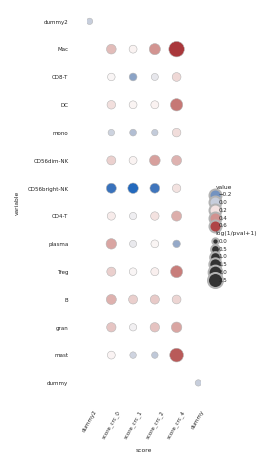

In [75]:
# Create a dotplot with mean of pos frac as dot hue and pos frac as dot size
sns.set(font_scale=0.25)
sns.set_style('white')
g = sns.relplot(
    data=corr_df_melt_merged,
    x="score", y="variable", hue="value", size='log(1/pval+1)',
    palette="vlag", edgecolor=".7",#hue_norm = (0,1),
    height=3, aspect=.5,sizes=(10, 60),
)
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(60)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

fig_save_path_spec = fig_save_path+'Particle_dotplot_immune_corr.svg'
plt.savefig(fig_save_path_spec,dpi=300)

In [171]:
1/(10**2.5)

0.003162277660168379

In [76]:
fig_save_path_spec

'/data/peer/wallet/Jupyter/2023_Particle_SASP/figures/Particle_dotplot_immune_corr.svg'

## Receptor ligand interaction

In [219]:
interaction_dict_path = '/data/peer/wallet/Jupyter/2023_Particle_SASP/2023_Particle_SASP/notebooks/Ligand_Receptor_Pairs_TW_220804.csv'
ligand_modules = [['CCL19', 'CCL21', 'CCL4', 'CCL5', 'CXCL10', 'CXCL12', 'CXCL13', 'CXCL9'], ['CXCL2', 'CXCL3'], ['CCL13', 'CCL18', 'CCL3', 'CCL7'], ['CCL14', 'CCL15', 'CCL16', 'CCL17', 'CCL23', 'CCL24', 'CCL25', 'CCL26', 'CCL8'], ['CCL11', 'CCL2', 'CCL20', 'CCL22', 'CCL27', 'CCL28', 'CX3CL1', 'CXCL1', 'CXCL11', 'CXCL16', 'CXCL5', 'CXCL6', 'CXCL8']]

#adata_path = '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/output_data/2021_PDAC_RT_Huber_Walle_raw_data_annotated_emptydrops_noribo_nomito_clustered_nodrops_doublets_nodoubs_libsize_log1p_clustered_10000hv_genes_curated_marker_genes_210216_reanalysis_forcytopus.h5ad'
#adata_path = '/data/peer/wallet/Jupyter/2023_Particle_SASP/data/PBMC-X-BTC-X-CITEseq-X-2022-X-Keenan-X-10.1016_j.celrep.2022.111384.h5ad'

adata = sc.read(adata_path)
adata

set(adata.obs['sample'])

adata = adata[~adata.obs['best_annotation'].isna()]
adata

adata = adata[adata.obs['best_annotation']!='Blood']
adata

adata = adata[adata.obs['best_annotation']!='T']
adata

#impute data
adata_indf = magic(adata, copy=True, verbose=True, solver='exact', n_pca=adata.obsm['X_pca'].shape[1], knn=5, t=3)
adata.layers['imputed'] = adata_indf.X

adata.write(adata_path)

set(adata.obs['best_annotation'])

mapping_dict = {'AS-DC':'DC',
 'B-memory-switched':'B',
 'B-naive':'B',
 'CD4-T':'CD4-T',
 'CD4-T-naive':'CD4-T',
 'CD4-TCM':'CD4-T',
 'CD56bright-NK':'CD56bright-NK',
 'CD56dim-NK':'CD56dim-NK',
 'CD8-T-KLRG1pos-effector':'CD8-T',
 'DC':'DC',
 'DN-B':'B',
 'MAIT':'MAIT',
 'NK':'NK',
 'NKT':'NKT',
 'Treg':'Treg',
 'c-mono':'mono',
 'cDC':'DC',
 'mo-DC':'DC',
 'nc-mono':'mono',
 'p-DC':'DC',
 'plasma-blast':'plasma'}

adata.obs['annotation_merged'] = adata.obs['best_annotation'].map(mapping_dict)
set(adata.obs['annotation_merged'])

adata = adata[adata.obs['primary_tumor']]
adata

set(adata.obs['annotations_cytopus_final'])

adata = adata[~adata.obs['annotations_cytopus_final'].isin(['B-T_doublet','T','Gr-MDC','T_proliferating',
                                                          'endothelial cell','epithelial cell', 'fibroblast and myocytes',
                                                           'neuroendocrine'])]
adata = adata[~adata.obs['annotations_cytopus_final'].isna()]

mapping_dict = {
 'B-memory-non-switched':'B',
 'B-memory-switched':'B',
 'B-naive':'B',
 'CD4-T-naive':'CD4-T',
 'CD4-TCM':'CD4-T',
 'CD4-TRM-TH17':'CD4-T',
 'CD4-TRM_terminally_exhausted':'CD4-T',
 'CD56bright-NK':'CD56bright-NK',
 'CD56dim-NK':'CD56dim-NK',
 'CD8-T':'CD8-T',
 'CD8-T-KLRG1neg-effector_nonexhausted':'CD8-T',
 'CD8-T-KLRG1pos-effector_nonexhausted':'CD8-T',
 'CD8-T-KLRG1pos-effector_preexhausted':'CD8-T',
 'CD8-TRM_nonexhausted':'CD8-T',
 'CD8-TRM_terminally_exhausted':'CD8-T',
 'GC-B':'B',
 'GC-B_proliferating':'B',
 'ILC3-NCR2pos':'ILC3-NCR2pos',
 'Mac':'Mac',
 'PV-Mac':'Mac',
 'Treg':'Treg',
 'c-mono':'mono',
 'cDC1':'DC',
 'cDC2':'DC',
 'cDC3':'DC',
 'nc-mono':'mono',
 'p-DC':'DC'}

In [220]:
set(adata_pretreated.obs['annotation_merged'])

{'(myo)fibroblast',
 'B',
 'CD4-T',
 'CD56bright-NK',
 'CD56dim-NK',
 'CD8-T',
 'DC',
 'Mac',
 'NK',
 'Treg',
 'adipocyte',
 'crc-carcinoma-cell',
 'endo',
 'endocrine',
 'epithelial',
 'fibroblast',
 'gran',
 'mast',
 'mono',
 'neuroendocrine',
 'neuron',
 'plasma',
 'schwann'}

adata.obs['annotation_merged'] = adata.obs['annotations_cytopus_final'].map(mapping_dict)
set(adata.obs['annotation_merged'])

In [221]:
interaction_df = pd.read_csv(interaction_dict_path)
interaction_df

Ligand       Ligand_ENSEMBL Receptor     Receptor_ENSEMBL       species  \
0     ADIPOQ                  NaN  ADIPOR1                  NaN  homo_sapiens   
1     ADIPOQ                  NaN  ADIPOR2                  NaN  homo_sapiens   
2     ADORA1                  NaN  ADORA2A                  NaN  homo_sapiens   
3       APOB                  NaN     LDLR                  NaN  homo_sapiens   
4       APOE                  NaN     LDLR                  NaN  homo_sapiens   
...      ...                  ...      ...                  ...           ...   
1076  TNFSF8     MGP_LPJ_G0028287  TNFRSF8   ENSMUSG00000028602           NaN   
1077     NaN                  NaN     VSIR  ENSMUSG00000020101            NaN   
1078     NaN                  NaN     VSIR      ENSG00000107738           NaN   
1079    XCL1  ENSMUSG00000026573      XCR1  ENSMUSG00000060509            NaN   
1080    XCL1      ENSG00000143184     XCR1      ENSG00000173578           NaN   

                  SOURCE (Literature or DAC-curated)  DOI  
0                                        DAC-curated  NaN  
1                                        DAC-curated  NaN  
2     Steele et al. Nature Cancer 2020 (SUP TABLE 5)  NaN  
3     Steele et al. Nature Cancer 2020 (SUP TABLE 5)  NaN  
4     Steele et al. Nature Cancer 2020 (SUP TABLE 5)  NaN  
...                                              ...  ...  
1076                                          wallet  NaN  
1077                                          wallet  NaN  
1078                                          wallet  NaN  
1079                                          wallet  NaN  
1080                                          wallet  NaN  

[1081 rows x 7 columns]

In [222]:
interaction_df = interaction_df[interaction_df['species']=='homo_sapiens']
interaction_df = interaction_df.set_index('Ligand')
interaction_df

Ligand_ENSEMBL Receptor  Receptor_ENSEMBL       species  \
Ligand                                                                
ADIPOQ                 NaN  ADIPOR1               NaN  homo_sapiens   
ADIPOQ                 NaN  ADIPOR2               NaN  homo_sapiens   
ADORA1                 NaN  ADORA2A               NaN  homo_sapiens   
APOB                   NaN     LDLR               NaN  homo_sapiens   
APOE                   NaN     LDLR               NaN  homo_sapiens   
...                    ...      ...               ...           ...   
IFNA2      ENSG00000188379   IFNAR2   ENSG00000159110  homo_sapiens   
IFNA7      ENSG00000214042   IFNAR2   ENSG00000159110  homo_sapiens   
IFNA8      ENSG00000120242   IFNAR2   ENSG00000159110  homo_sapiens   
IL17C   ENSMUSG00000043088   IL17RE  ENSG00000124391   homo_sapiens   
IL18       ENSG00000150782   IL18BP  ENSG00000137496   homo_sapiens   

                    SOURCE (Literature or DAC-curated)  DOI  
Ligand                                                       
ADIPOQ                                     DAC-curated  NaN  
ADIPOQ                                     DAC-curated  NaN  
ADORA1  Steele et al. Nature Cancer 2020 (SUP TABLE 5)  NaN  
APOB    Steele et al. Nature Cancer 2020 (SUP TABLE 5)  NaN  
APOE    Steele et al. Nature Cancer 2020 (SUP TABLE 5)  NaN  
...                                                ...  ...  
IFNA2                                           wallet  NaN  
IFNA7                                           wallet  NaN  
IFNA8                                           wallet  NaN  
IL17C                                           wallet  NaN  
IL18                                            wallet  NaN  

[504 rows x 6 columns]

In [223]:
interaction_dict = {}
for i in set(interaction_df.index):
    interaction_df_sub = interaction_df.loc[i]
    if isinstance(interaction_df.loc[i]['Receptor'],pd.core.series.Series):
        interaction_dict[i] = list(interaction_df.loc[i]['Receptor'])
    else:
        interaction_dict[i] = [interaction_df.loc[i]['Receptor']]

In [224]:
receptors= []
for i in ligand_modules:
    for x in i:
        receptors = receptors+ interaction_dict[x]      

receptors = list(set(receptors))
receptors = [x for x in receptors if x in adata_pretreated.var_names]

In [225]:
set(adata_pretreated.obs['annotation_merged'])

{'(myo)fibroblast',
 'B',
 'CD4-T',
 'CD56bright-NK',
 'CD56dim-NK',
 'CD8-T',
 'DC',
 'Mac',
 'NK',
 'Treg',
 'adipocyte',
 'crc-carcinoma-cell',
 'endo',
 'endocrine',
 'epithelial',
 'fibroblast',
 'gran',
 'mast',
 'mono',
 'neuroendocrine',
 'neuron',
 'plasma',
 'schwann'}

adata_crc = adata[adata.obs['annotation_merged'].isin([
 'B',
 'CD4-T',
 'CD56bright-NK',
 'CD56dim-NK',
 'CD8-T',
 'DC',
 'ILC3-NCR2pos',
 'Mac',
 'Treg',
 'mono'])]


In [226]:
np.random.seed(0)
adata_subset = adata_pretreated[adata_pretreated.obs['annotation_merged'].isin([
 'B',
 'CD4-T',
 'CD56bright-NK',
 'CD56dim-NK',
 'CD8-T',
 'DC',
 'Mac',
 'NK',
 'Treg',
 'gran',
 'mast',
 'mono',
 'plasma',])]
#adata_subset = adata_subset[adata_subset.obs['pretreated']=='True']
plot_df_corr = pd.DataFrame(adata_subset[:,receptors].layers['imputed'],index=adata_subset.obs_names,
                                              columns=receptors)
#plot_df_corr =scipy.stats.zscore(plot_df_corr)
plot_df_corr =  corr_cov_matrix_cluster(plot_df_corr,markers=['all_markers'], metric='spearman',
                                        clustering_method = 'average', linkage_distance=1.5)
plot_df_corr

output list order: dataframe, hierarchical flat clusters, row linkage, column linkage


[           CXCR1      CCR1     ACKR1    CX3CR1     CXCR6       CD4      CCR6  \
 CXCR1   1.000000  0.078311 -0.021047 -0.030358 -0.038224 -0.080533 -0.000741   
 CCR1    0.078311  1.000000 -0.056487  0.005200 -0.164851  0.113161 -0.241737   
 ACKR1  -0.021047 -0.056487  1.000000 -0.008471  0.056279  0.144919  0.115003   
 CX3CR1 -0.030358  0.005200 -0.008471  1.000000 -0.056172  0.174113 -0.016756   
 CXCR6  -0.038224 -0.164851  0.056279 -0.056172  1.000000 -0.163110  0.351280   
 CD4    -0.080533  0.113161  0.144919  0.174113 -0.163110  1.000000 -0.054743   
 CCR6   -0.000741 -0.241737  0.115003 -0.016756  0.351280 -0.054743  1.000000   
 CCRL2  -0.044681  0.237637 -0.080025 -0.075484 -0.197607 -0.119505 -0.300166   
 CCR5   -0.040737 -0.130332  0.053485 -0.007011  0.597092 -0.161131  0.221311   
 ITGB1  -0.055820  0.336983 -0.023311  0.168597 -0.061587  0.042497 -0.101191   
 CCR9   -0.022087 -0.153506  0.150512  0.031672  0.438304 -0.045340  0.286938   
 CCR10  -0.044138 -0.101419 

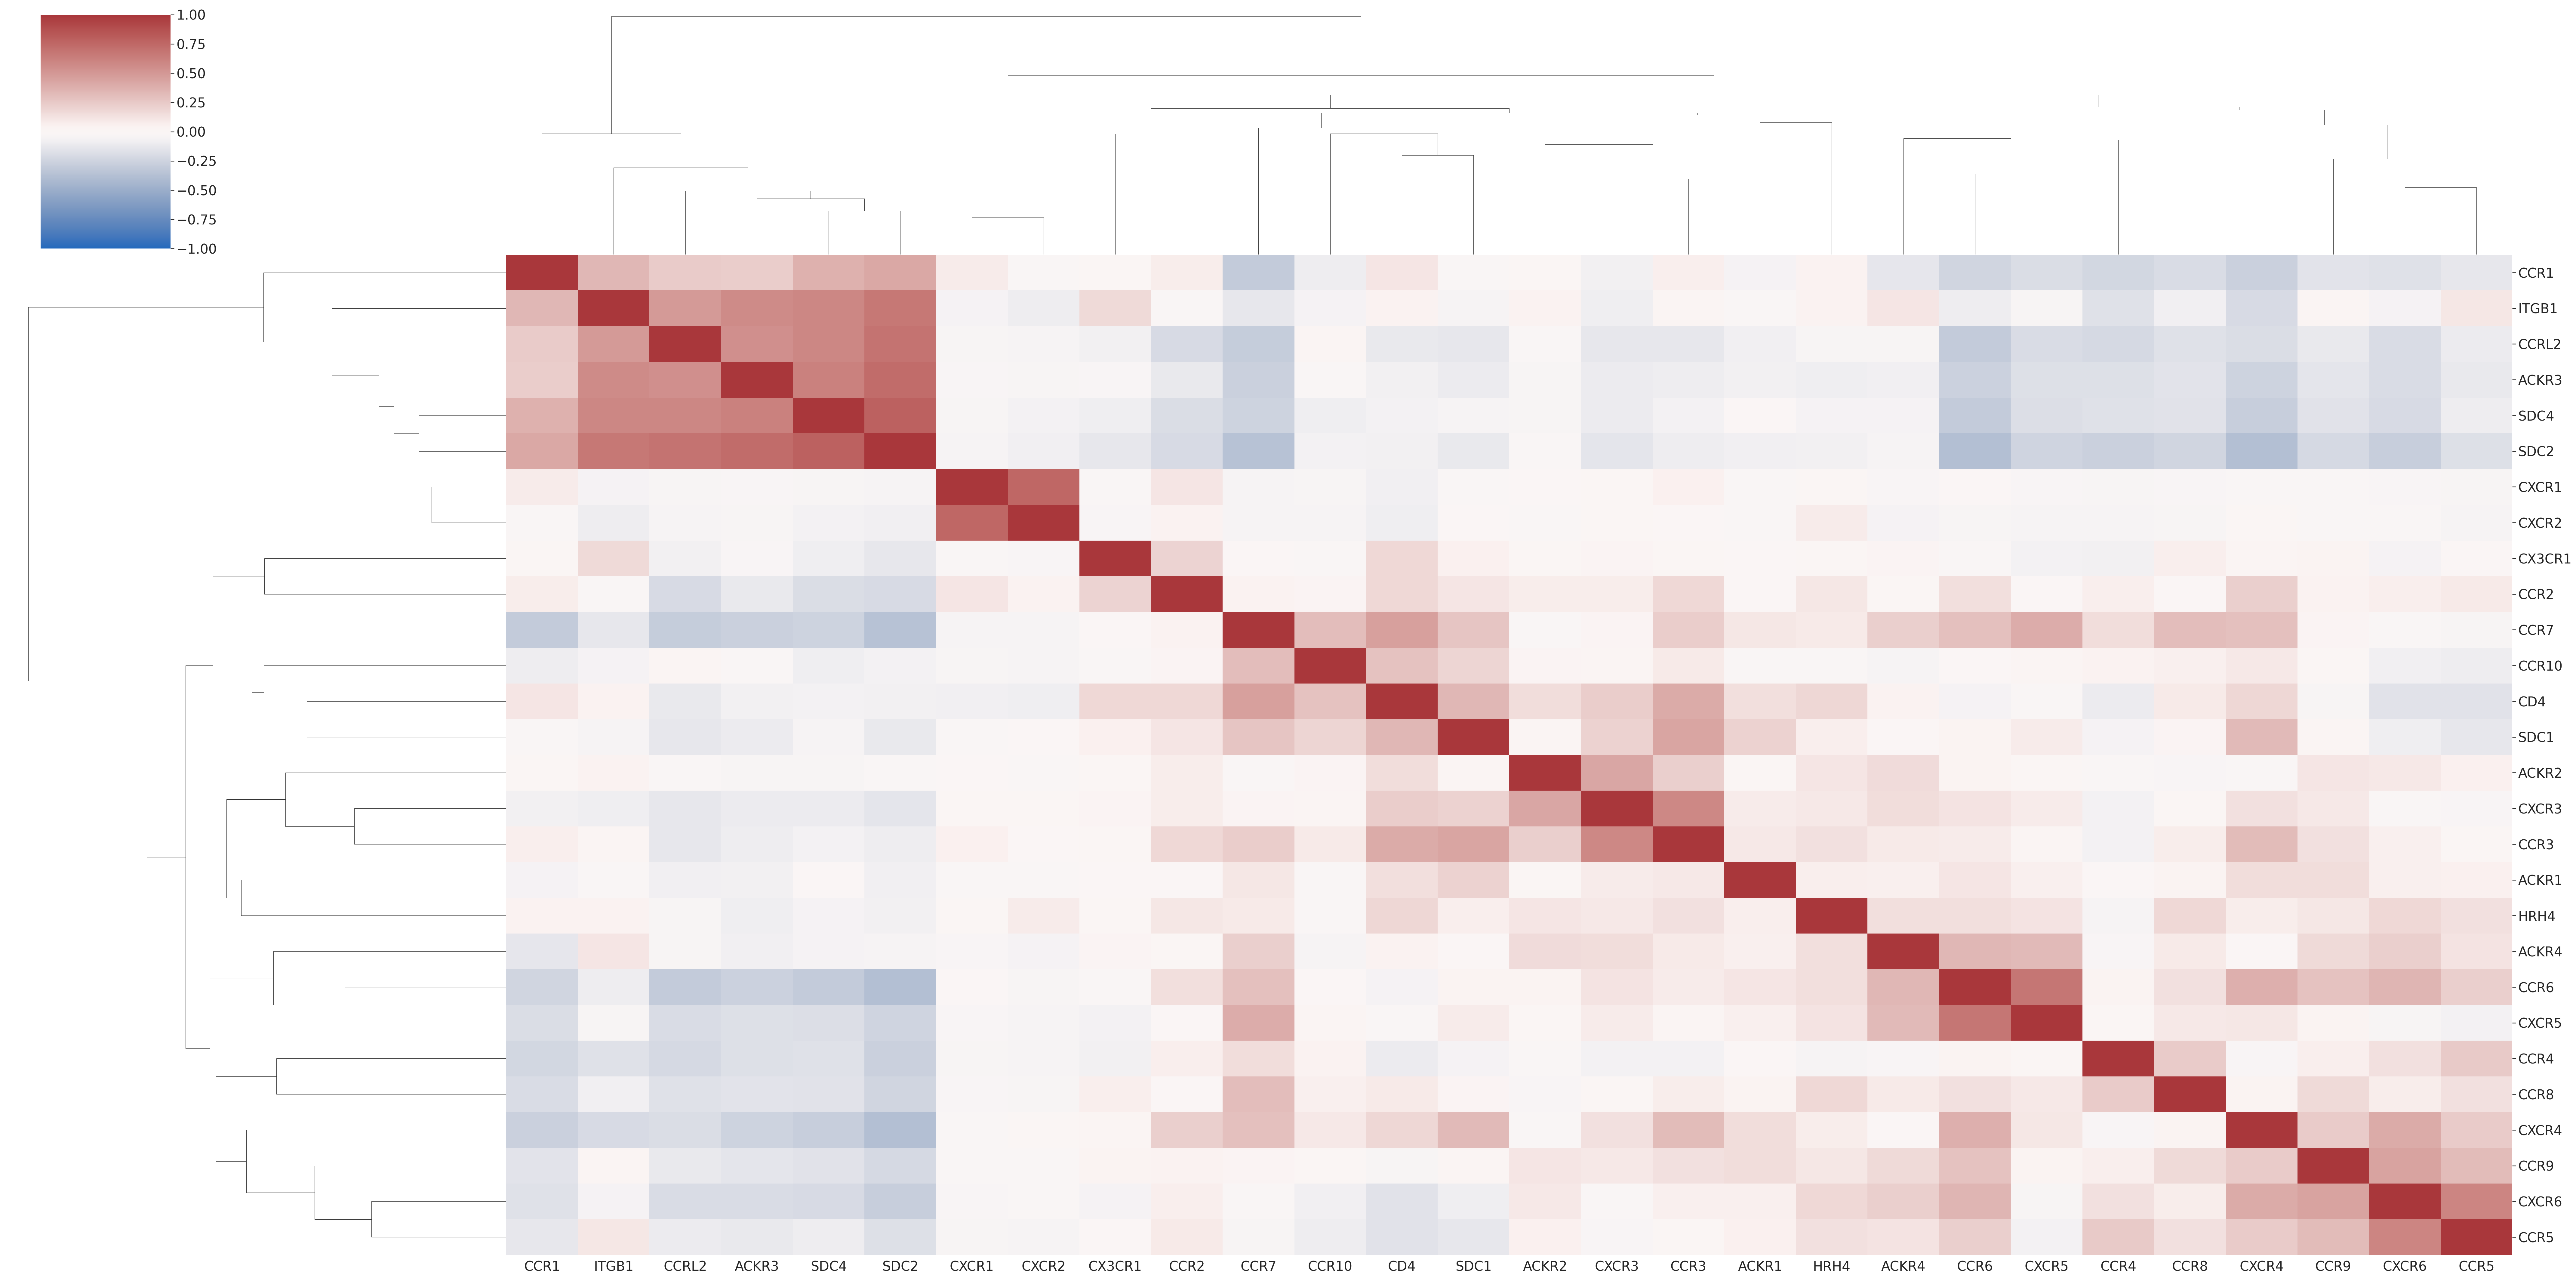

In [227]:
#cell level imputed
import scipy
%matplotlib inline
sns.set(font_scale=2)
clustergrid = sns.clustermap(plot_df_corr[0], cmap='vlag', col_cluster=True,row_cluster=True, figsize=(60,30), 
                             #row_linkage=plot_df_corr[1],col_linkage=plot_df_corr[2],
                             vmin=-1,vmax=1,center=0,
               z_score=None) 

In [228]:
#cell level imputed
save_name = '2022_Hwang_irradiated_chemokine_receptor_heatmap.svg'
row_colors = [color_map_clusters_nogrey[x] for x in plot_df_corr[1]]
col_colors = [color_map_clusters_nogrey[x] for x in plot_df_corr[1]]
sns.set(font_scale=2)
clustergrid = sns.clustermap(plot_df_corr[0], cmap='vlag',# col_cluster=True,row_cluster=True, 
                             figsize=(60,60), 
                             row_linkage=plot_df_corr[2],col_linkage=plot_df_corr[2],
                             row_colors = row_colors, col_colors=col_colors,
                             vmin=-.6,vmax=.6,center=0,
               z_score=None) 
plt.savefig(fig_save_path+save_name)
print('saved to:',save_name)

saved to: 2022_Hwang_irradiated_chemokine_receptor_heatmap.svg


In [229]:
cluster_labels =plot_df_corr[1]
variable_names =plot_df_corr[0].index
# Get the indices of samples in each cluster
clusters = np.unique(cluster_labels)
cluster_indices = [np.where(cluster_labels == c)[0] for c in clusters]

# Get the variable names for each cluster
cluster_variable_names = [[variable_names[i] for i in ci] for ci in cluster_indices]

print(cluster_variable_names)

[['CCR1', 'CCRL2', 'ITGB1', 'ACKR3', 'SDC4', 'SDC2'], ['CXCR1', 'CXCR2'], ['CX3CR1', 'CCR2'], ['ACKR1', 'CD4', 'CCR10', 'CXCR3', 'CCR3', 'CCR7', 'HRH4', 'ACKR2', 'SDC1'], ['CCR6', 'ACKR4', 'CXCR5'], ['CCR4', 'CCR8'], ['CXCR6', 'CCR5', 'CCR9', 'CXCR4']]


receptor_modules = [['SDC4', 'ITGB1', 'ACKR3', 'CCRL2', 'SDC2', 'CCR1'], ['CXCR2', 'CXCR1'], ['CXCR6', 'CCR6', 'CCR5', 'CCR9', 'CXCR4']]

receptor_modules = [['CXCR5', 'CCR7'], ['CCR9', 'CXCR1', 'CCR5', 'CCR8', 'CCR3', 'CCR4', 'CXCR4', 'CXCR3', 'CXCR6', 'CCR6'], ['HRH4', 'ACKR2'], ['ACKR1'], ['CD4', 'CCRL2', 'GPR75', 'CX3CR1', 'CCR2', 'ACKR3', 'SDC2', 'CCR1'], ['CCR10'], ['CXCR2'], ['ITGB1', 'SDC1', 'SDC4'], ['ACKR4']]

In [230]:
receptor_modules = [['CCR1', 'CCRL2', 'ITGB1', 'ACKR3', 'SDC4', 'SDC2'], ['CXCR1', 'CXCR2'], ['CX3CR1', 'CCR2'], ['ACKR1', 'CD4', 'CCR10', 'CXCR3', 'CCR3', 'CCR7', 'HRH4', 'ACKR2', 'SDC1'], ['CCR6', 'ACKR4', 'CXCR5'], ['CCR4', 'CCR8'], ['CXCR6', 'CCR5', 'CCR9', 'CXCR4']]

In [231]:
#correlation per module

# get the lower diagonal of the correlation matrix
lower_diag = np.tril(plot_df_corr[0])
np.fill_diagonal(lower_diag, 0)
lower_diag[lower_diag == 0] = np.nan
lower_diagonal_df = pd.DataFrame(lower_diag, index=plot_df_corr[0].index, columns=plot_df_corr[0].columns)

for i,v in enumerate(receptor_modules):
    melted_df = pd.melt(lower_diagonal_df.loc[v,v])
    melted_df = melted_df[~melted_df['value'].isna()]
    print('mean for module',i,'is:',np.mean(melted_df['value']))

mean for module 0 is: 0.5238172774671758
mean for module 1 is: 0.7565149055152801
mean for module 2 is: 0.19631676816576862
mean for module 3 is: 0.17375961731283449
mean for module 4 is: 0.44820024829461413
mean for module 5 is: 0.23590740232722981
mean for module 6 is: 0.37368025629849805


In [232]:
connection_df = pd.DataFrame()
for i,module in enumerate(ligand_modules):
    for j,receptor_module in enumerate(receptor_modules):
        connections_sum = 0
        for ligand in module:
            interaction_partners = interaction_dict[ligand]
            connections = [x for x in interaction_partners if x in receptor_module]
            connections_sum += len(connections)
        connection_df.loc['ligand_mod_'+str(i),'receptor_mod_'+str(j)] = connections_sum

In [233]:
ligand_modules

[['CCL19', 'CCL21', 'CCL4', 'CCL5', 'CXCL10', 'CXCL12', 'CXCL13', 'CXCL9'],
 ['CXCL2', 'CXCL3'],
 ['CCL13', 'CCL18', 'CCL3', 'CCL7'],
 ['CCL14',
  'CCL15',
  'CCL16',
  'CCL17',
  'CCL23',
  'CCL24',
  'CCL25',
  'CCL26',
  'CCL8'],
 ['CCL11',
  'CCL2',
  'CCL20',
  'CCL22',
  'CCL27',
  'CCL28',
  'CX3CL1',
  'CXCL1',
  'CXCL11',
  'CXCL16',
  'CXCL5',
  'CXCL6',
  'CXCL8']]

In [234]:
connection_df

receptor_mod_0  receptor_mod_1  receptor_mod_2  receptor_mod_3  \
ligand_mod_0             7.0             0.0             0.0            22.0   
ligand_mod_1             0.0             6.0             0.0             0.0   
ligand_mod_2             3.0             0.0             2.0            10.0   
ligand_mod_3             6.0             0.0             4.0            13.0   
ligand_mod_4             3.0             8.0             3.0            19.0   

              receptor_mod_4  receptor_mod_5  receptor_mod_6  
ligand_mod_0             5.0             2.0             3.0  
ligand_mod_1             0.0             0.0             0.0  
ligand_mod_2             2.0             1.0             3.0  
ligand_mod_3             2.0             3.0             4.0  
ligand_mod_4             3.0             2.0             3.0

In [235]:
import random
import copy

iter_count=0
df_comp_list = []
iter_num = 10000

ligand_modules_random = copy.deepcopy(ligand_modules)
elements = set()
for l in ligand_modules_random:
    elements.update(l)
        
while iter_count <iter_num:

    connection_df_random = pd.DataFrame()

    #shuffle the ligand list of lists randomly

    for l in ligand_modules_random:
        l[:] = random.sample(elements, len(l))
    for i,module in enumerate(ligand_modules_random):
        for j,receptor_module in enumerate(receptor_modules):
            connections_sum = 0
            for ligand in module:
                interaction_partners = interaction_dict[ligand]
                connections = [x for x in interaction_partners if x in receptor_module]
                connections_sum += len(connections)
            connection_df_random.loc['ligand_mod_'+str(i),'receptor_mod_'+str(j)] = connections_sum

    #compare whether the real data has more connections than the random
    df_comp_list.append( connection_df_random>=connection_df)

    iter_count+=1

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  l[:] = random.sample(elements, len(l))
/scratch/lsftmp/18833952.tmpdir/ipykernel_58602/3687542856.py:20: DeprecationWarning: Sampling from a set deprecated
sin

In [236]:
merged_df = df_comp_list[0].astype(int)
for i in df_comp_list[1:]:
    merged_df = merged_df+ i.astype(int)

In [238]:
p_df = merged_df/iter_num
p_df

receptor_mod_0  receptor_mod_1  receptor_mod_2  receptor_mod_3  \
ligand_mod_0          0.0732          1.0000          1.0000          0.0261   
ligand_mod_1          1.0000          0.0015          1.0000          1.0000   
ligand_mod_2          0.3468          1.0000          0.2548          0.1898   
ligand_mod_3          0.3203          1.0000          0.1388          0.8269   
ligand_mod_4          0.9962          0.1677          0.7211          0.8699   

              receptor_mod_4  receptor_mod_5  receptor_mod_6  
ligand_mod_0          0.0927          0.5472          0.6246  
ligand_mod_1          1.0000          1.0000          1.0000  
ligand_mod_2          0.3947          0.5979          0.1236  
ligand_mod_3          0.8659          0.3281          0.4157  
ligand_mod_4          0.8907          0.8413          0.9478

In [247]:
adata

AnnData object with n_obs × n_vars = 97987 × 22164
    obs: 'sampleid', 'n_genes', 'n_counts', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 'IMMUNE', 'PanCAF', 'iCAF', 'myCAF', 'apCAF

In [239]:
#stroke sizes for p values in illustrator
import math

def transform(x):
    a = math.log(1/(x),10)
    return a/2

p_df.applymap(lambda x:transform(x))

receptor_mod_0  receptor_mod_1  receptor_mod_2  receptor_mod_3  \
ligand_mod_0        0.567744        0.000000        0.000000        0.791680   
ligand_mod_1        0.000000        1.411954        0.000000        0.000000   
ligand_mod_2        0.229960        0.000000        0.296900        0.360852   
ligand_mod_3        0.247222        0.000000        0.428805        0.041274   
ligand_mod_4        0.000827        0.387733        0.071002        0.030265   

              receptor_mod_4  receptor_mod_5  receptor_mod_6  
ligand_mod_0        0.516460        0.130927        0.102199  
ligand_mod_1        0.000000        0.000000        0.000000  
ligand_mod_2        0.201866        0.111686        0.453991  
ligand_mod_3        0.031266        0.241997        0.190610  
ligand_mod_4        0.025134        0.037525        0.011642

In [242]:
from statsmodels.stats.multitest import fdrcorrection

# correct p-values using Benjamini-Hochberg method
df_corrected = pd.DataFrame(fdrcorrection(p_df.values.flatten())[1].reshape(p_df.shape),
                            columns=p_df.columns,
                            index=p_df.index)
df_corrected

receptor_mod_0  receptor_mod_1  receptor_mod_2  receptor_mod_3  \
ligand_mod_0        0.809667        1.000000        1.000000        0.456750   
ligand_mod_1        1.000000        0.052500        1.000000        1.000000   
ligand_mod_2        1.000000        1.000000        0.990889        0.830375   
ligand_mod_3        1.000000        1.000000        0.809667        1.000000   
ligand_mod_4        1.000000        0.830375        1.000000        1.000000   

              receptor_mod_4  receptor_mod_5  receptor_mod_6  
ligand_mod_0        0.809667             1.0        1.000000  
ligand_mod_1        1.000000             1.0        1.000000  
ligand_mod_2        1.000000             1.0        0.809667  
ligand_mod_3        1.000000             1.0        1.000000  
ligand_mod_4        1.000000             1.0        1.000000

In [169]:
set(adata_subset.obs['annotation_merged'])

{'B',
 'CD4-T',
 'CD56bright-NK',
 'CD56dim-NK',
 'CD8-T',
 'DC',
 'Mac',
 'NK',
 'Treg',
 'gran',
 'mast',
 'mono',
 'plasma'}

In [169]:
set(adata_subset.obs['annotation_merged'])

{'B',
 'CD4-T',
 'CD56bright-NK',
 'CD56dim-NK',
 'CD8-T',
 'DC',
 'Mac',
 'NK',
 'Treg',
 'gran',
 'mast',
 'mono',
 'plasma'}

In [179]:
receptor_name_ls = []
for i,v in enumerate(receptor_modules):
    receptor_name = 'receptor_mod_'+str(i)
    adata_subset.obs[receptor_name] = list(np.mean(adata_subset[:,v].layers['zscored'],axis=1))
    receptor_name_ls.append(receptor_name)

/scratch/lsftmp/18815918.tmpdir/ipykernel_270878/366065083.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_subset.obs[receptor_name] = list(np.mean(adata_subset[:,v].layers['zscored'],axis=1))


In [154]:
receptor_name_ls = []
for i,v in enumerate(receptor_modules):
    receptor_name = 'receptor_mod_scoregenes_'+str(i)
    sc.tl.score_genes(adata_subset, v, ctrl_size=50, gene_pool=None, n_bins=25, 
                                                            score_name=receptor_name, random_state=0, copy=False, use_raw=None)
    receptor_name_ls.append(receptor_name)

computing score 'receptor_mod_scoregenes_0'
    finished: added
    'receptor_mod_scoregenes_0', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)
computing score 'receptor_mod_scoregenes_1'
    finished: added
    'receptor_mod_scoregenes_1', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)
computing score 'receptor_mod_scoregenes_2'
    finished: added
    'receptor_mod_scoregenes_2', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)
computing score 'receptor_mod_scoregenes_3'
    finished: added
    'receptor_mod_scoregenes_3', score of gene set (adata.obs).
    350 total control genes are used. (0:00:00)
computing score 'receptor_mod_scoregenes_4'
    finished: added
    'receptor_mod_scoregenes_4', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)
computing score 'receptor_mod_scoregenes_5'
    finished: added
    'receptor_mod_scoregenes_5', score of gene set (adat

In [151]:
receptor_name_ls_imputed = []
for i,v in enumerate(receptor_modules):
    receptor_name = 'receptor_mod_imputed_'+str(i)
    adata_subset.obs[receptor_name] = list(np.mean(np.array(adata_subset[:,v].X.todense()),axis=1))
    receptor_name_ls_imputed.append(receptor_name)

In [152]:
receptor_name_ls_scoregenes = ['receptor_mod_scoregenes_0',
 'receptor_mod_scoregenes_1',
 'receptor_mod_scoregenes_2',
 'receptor_mod_scoregenes_3',
 'receptor_mod_scoregenes_4',
 'receptor_mod_scoregenes_5',
 'receptor_mod_scoregenes_6']

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_annotation_merged']`


/home/wallet/miniconda3/envs/2022_Peer_SPADE_cellrank2/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:161: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat


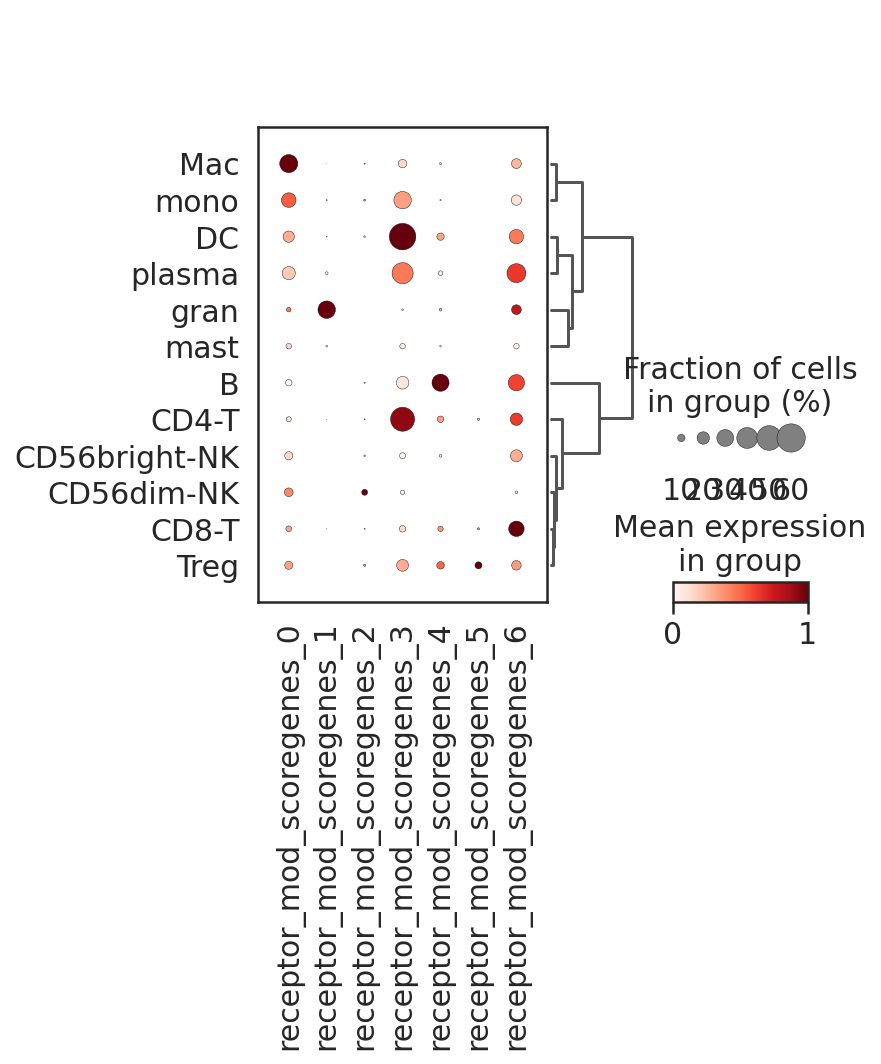

In [158]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')
adata_subset_plot = adata_subset[adata_subset.obs['annotation_merged']!='NK']
sc.tl.dendrogram(adata_subset_plot, groupby='annotation_merged')
sc.pl.dotplot(adata_subset_plot, receptor_name_ls_scoregenes, groupby='annotation_merged', dendrogram=True, standard_scale='var',
             save='Hwang_PDAC_chemokine-receptor_modules_dotplot.svg')

In [189]:
pheno_heat = 'annotation_merged'

plot_df = adata_subset.obs[receptor_name_ls+[pheno_heat]].groupby('annotation_merged').mean()
plot_df

receptor_mod_0  receptor_mod_1  receptor_mod_2  \
annotation_merged                                                   
B                       -0.179166       -0.017888        0.095969   
CD4-T                   -0.204410        0.021226        0.116889   
CD56bright-NK           -0.170395       -0.017888        0.117430   
CD56dim-NK              -0.162610       -0.017888        1.418563   
CD8-T                   -0.178831        0.009935        0.134508   
DC                      -0.127296        0.102757        0.137617   
Mac                      0.102107       -0.002640        0.125623   
NK                       0.007923       -0.017888       -0.024530   
Treg                    -0.180468       -0.017888        0.364272   
gran                    -0.155447       10.438626       -0.024530   
mast                    -0.070803        0.225537       -0.024530   
mono                     0.204763        0.210777        0.338138   
plasma                  -0.129233        0.286660       -0.024530   

                   receptor_mod_3  receptor_mod_4  receptor_mod_5  \
annotation_merged                                                   
B                        0.162903        1.450151       -0.019756   
CD4-T                    0.595814        0.332633        0.368040   
CD56bright-NK            0.097233       -0.003409       -0.019756   
CD56dim-NK              -0.014767       -0.071227       -0.019756   
CD8-T                    0.048598        0.289988        0.391579   
DC                       0.888651        0.344051       -0.019756   
Mac                      0.046612        0.005297       -0.019756   
NK                       0.770892       -0.071227       -0.019756   
Treg                     0.115835        0.475433        2.183181   
gran                    -0.029584        0.071684       -0.019756   
mast                    -0.002153       -0.027091       -0.019756   
mono                     0.252098       -0.026649       -0.019756   
plasma                   0.380226        0.128233       -0.019756   

                   receptor_mod_6  
annotation_merged                  
B                        0.385183  
CD4-T                    0.357173  
CD56bright-NK            0.282646  
CD56dim-NK              -0.011133  
CD8-T                    0.898308  
DC                       0.366866  
Mac                      0.210907  
NK                       1.778689  
Treg                     0.506710  
gran                     0.297624  
mast                     0.029598  
mono                     0.205033  
plasma                   0.438888

In [190]:
plot_df = plot_df.drop(index=['NK'])
plot_df

receptor_mod_0  receptor_mod_1  receptor_mod_2  \
annotation_merged                                                   
B                       -0.179166       -0.017888        0.095969   
CD4-T                   -0.204410        0.021226        0.116889   
CD56bright-NK           -0.170395       -0.017888        0.117430   
CD56dim-NK              -0.162610       -0.017888        1.418563   
CD8-T                   -0.178831        0.009935        0.134508   
DC                      -0.127296        0.102757        0.137617   
Mac                      0.102107       -0.002640        0.125623   
Treg                    -0.180468       -0.017888        0.364272   
gran                    -0.155447       10.438626       -0.024530   
mast                    -0.070803        0.225537       -0.024530   
mono                     0.204763        0.210777        0.338138   
plasma                  -0.129233        0.286660       -0.024530   

                   receptor_mod_3  receptor_mod_4  receptor_mod_5  \
annotation_merged                                                   
B                        0.162903        1.450151       -0.019756   
CD4-T                    0.595814        0.332633        0.368040   
CD56bright-NK            0.097233       -0.003409       -0.019756   
CD56dim-NK              -0.014767       -0.071227       -0.019756   
CD8-T                    0.048598        0.289988        0.391579   
DC                       0.888651        0.344051       -0.019756   
Mac                      0.046612        0.005297       -0.019756   
Treg                     0.115835        0.475433        2.183181   
gran                    -0.029584        0.071684       -0.019756   
mast                    -0.002153       -0.027091       -0.019756   
mono                     0.252098       -0.026649       -0.019756   
plasma                   0.380226        0.128233       -0.019756   

                   receptor_mod_6  
annotation_merged                  
B                        0.385183  
CD4-T                    0.357173  
CD56bright-NK            0.282646  
CD56dim-NK              -0.011133  
CD8-T                    0.898308  
DC                       0.366866  
Mac                      0.210907  
Treg                     0.506710  
gran                     0.297624  
mast                     0.029598  
mono                     0.205033  
plasma                   0.438888

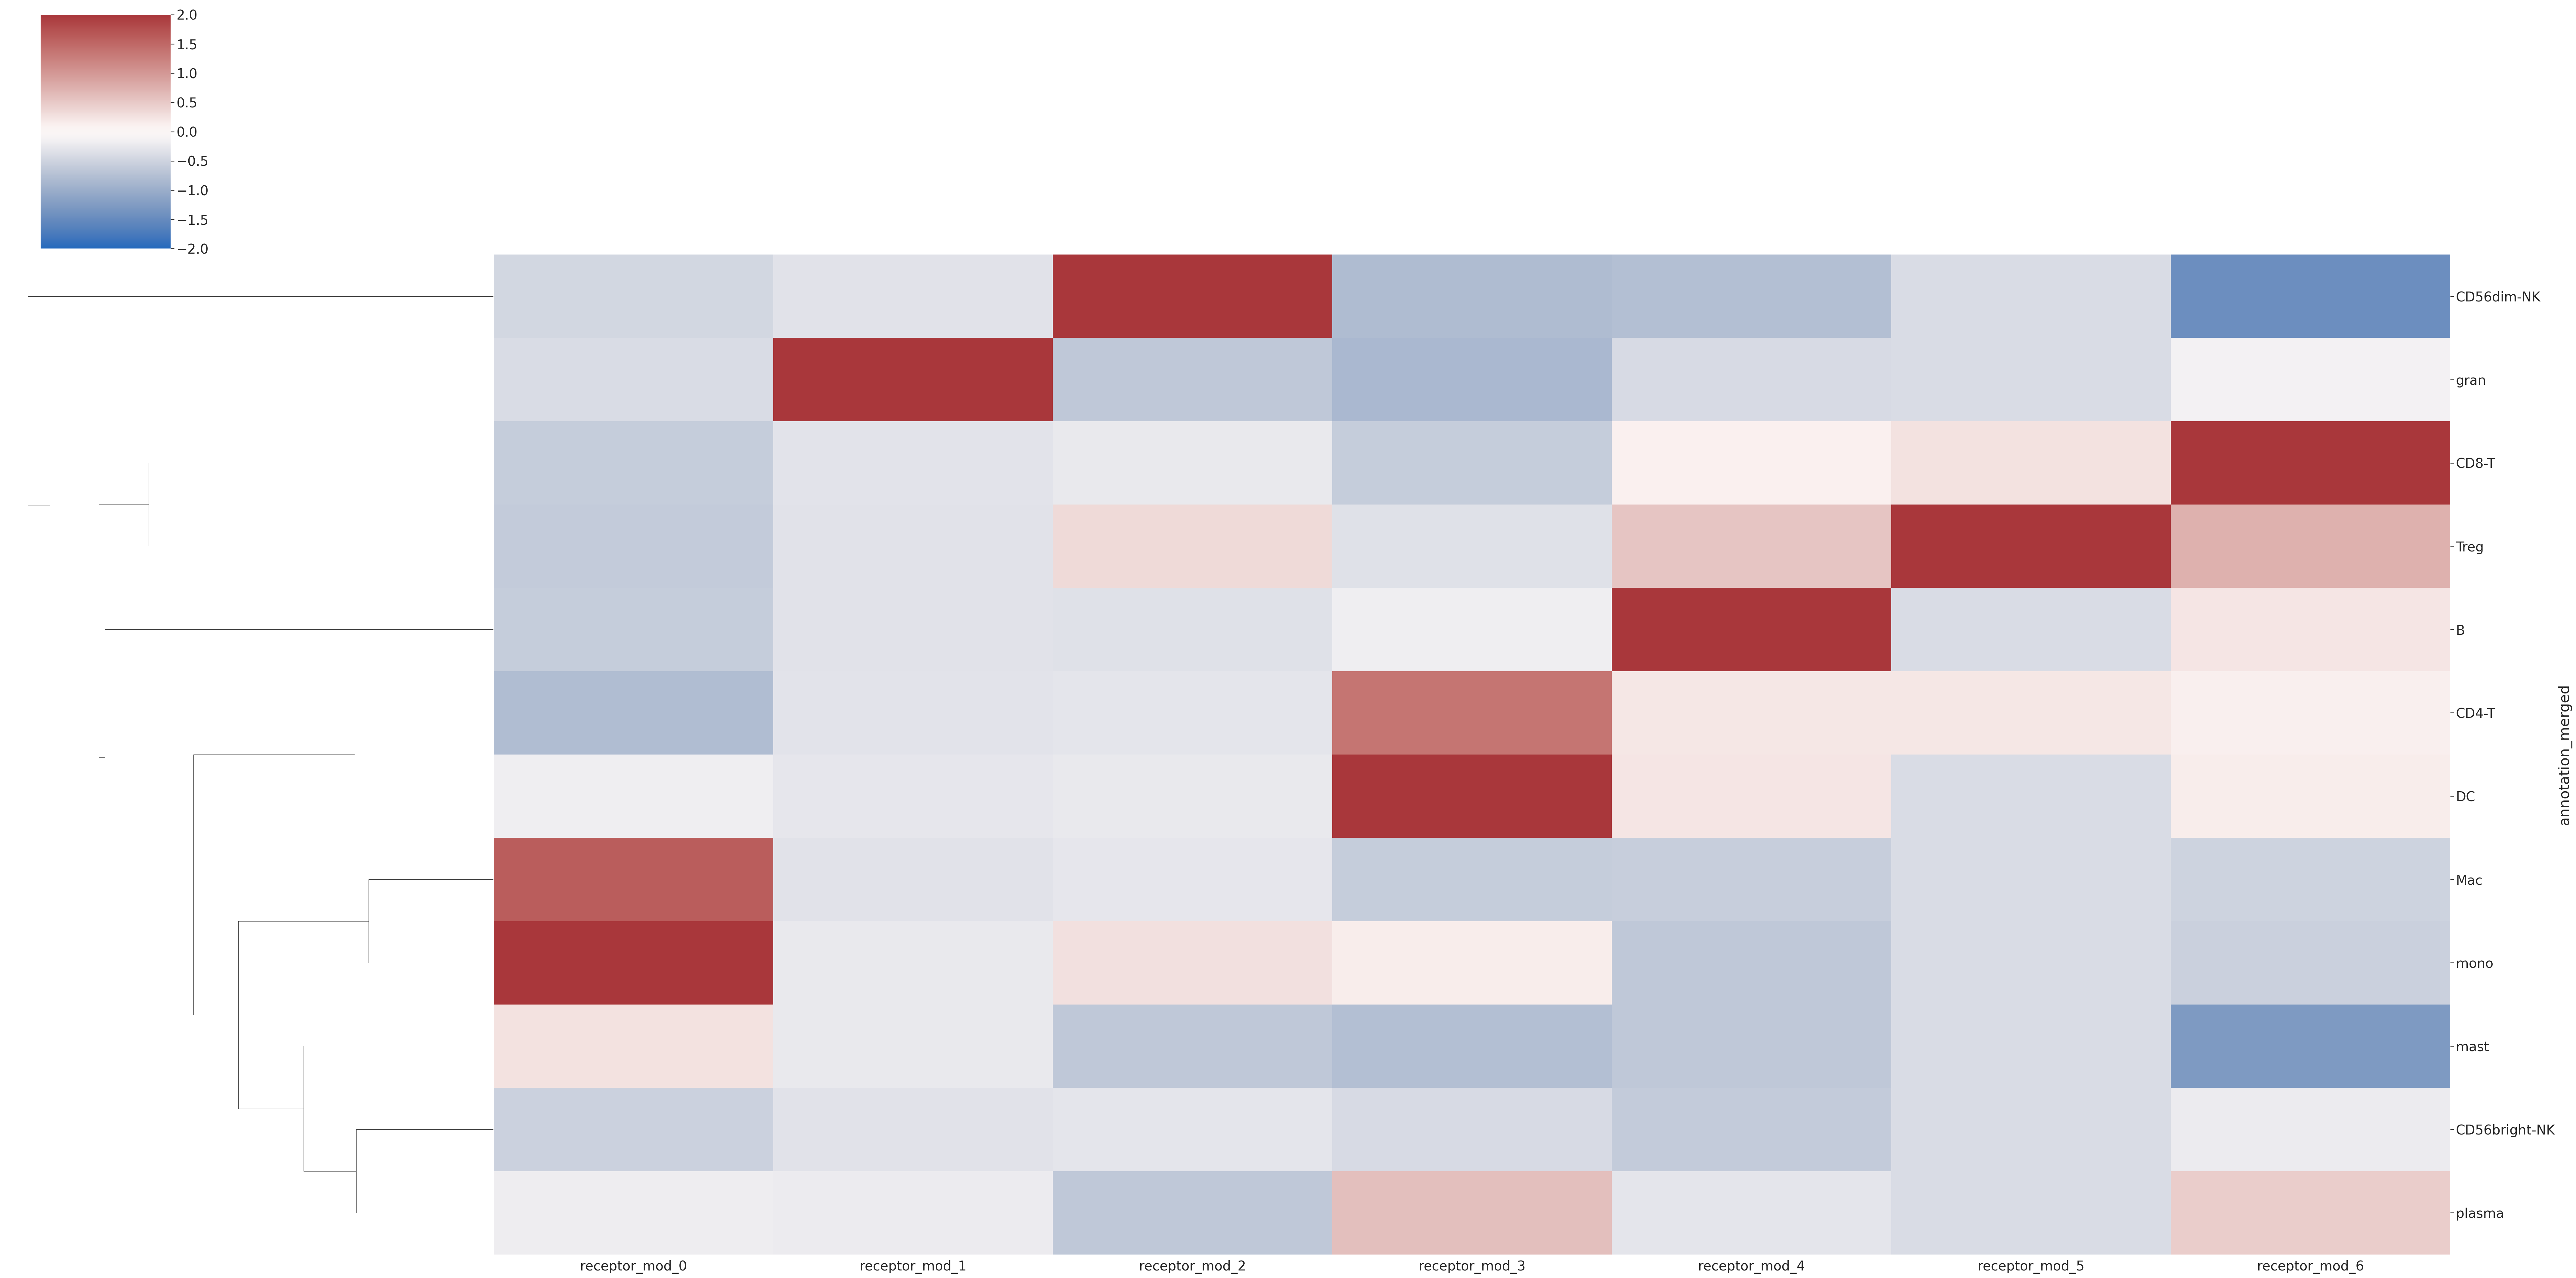

In [196]:
#SEACElls  imputed
import scipy
%matplotlib inline
save_name = 'Hwang_PDAC_pretreated_immune_receptor_module_expression_heatmap_zscored.svg'
sns.set(font_scale=2)
clustergrid = sns.clustermap(plot_df, cmap='vlag', col_cluster=False,row_cluster=True, figsize=(60,30), 
                             #row_linkage=plot_df_corr[1],col_linkage=plot_df_corr[2],
                             vmin=-2,vmax=2,center=0,

                             z_score=1) 

In [195]:
receptor_modules

[['SDC2', 'SDC4', 'ITGB1', 'ACKR3', 'CCRL2', 'CCR1'],
 ['CXCR1', 'CXCR2'],
 ['CCR2', 'CX3CR1'],
 ['HRH4', 'CXCR3', 'CD4', 'CCR3', 'CCR7', 'ACKR2', 'CCR10', 'ACKR1', 'SDC1'],
 ['ACKR4', 'CXCR5', 'CCR6'],
 ['CCR4', 'CCR8'],
 ['CXCR4', 'CCR9', 'CCR5', 'CXCR6']]